# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

#### **Introducción**

En este trabajo práctico se propone que cada grupo de alumnos se enfrente a un problema real
de ciencia de datos, que trabaje en cada una de las etapas del proceso y que pueda resolverlo
aplicando los contenidos que vemos en la materia.

Vamos a utilizar el conjunto de datos provisto por la empresa [Properati](https://www.properati.com.ar/) correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021 .
La información fue extraída desde BigQuery (producto de Google Cloud para consultar grandes
volúmenes de datos) donde la empresa disponibiliza sus datasets con avisos de propiedades y
desarrollos inmobiliarios que están y estuvieron publicados en Properati en todo Latinoamérica
desde 2015 hasta dos meses atrás. Los datos se actualizan diariamente para mayor información
pueden consultar el siguiente [link](https://www.properati.com.ar/data/).

El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión. En la sección enunciado se detallan los
objetivos particulares.

#### **Descargamos en DataSet**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = None

In [2]:
url='https://drive.google.com/file/d/1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dp_properati = pd.read_csv(url)

In [3]:
df = dp_properati.copy()

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [5]:
df.shape

(460154, 20)

Vemos si hay datos raros en el dataset properati

In [6]:
con_caracter_raro = df.astype('str').eq('-').any(0)
con_caracter_raro

id                          False
start_date                  False
end_date                    False
created_on                  False
latitud                     False
longitud                    False
place_l2                    False
place_l3                    False
place_l4                    False
place_l5                    False
place_l6                    False
operation                   False
property_type               False
property_rooms              False
property_bedrooms           False
property_surface_total      False
property_surface_covered    False
property_price              False
property_currency           False
property_title               True
dtype: bool

Veo si hay filas duplicadas

In [7]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title]
Index: []

In [8]:
size_antes = len(df)
df = df.drop_duplicates()
size_despues = len(df)
print(f'Se eliminaron: {size_antes-size_despues} filas duplicadas')

Se eliminaron: 0 filas duplicadas


Suma de datos nulos por columna

In [9]:
print(df.isna().sum())

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64


#### **Enunciado**
El conjunto de datos a utilizar properati_argentina_2021 se encuentra disponible en el
siguiente [enlace](https://drive.google.com/drive/folders/1BPCdW_Jab91WhMqfXcf0jYMHzjxW_XkD?usp=sharing), la descripción de las variables se encuentra disponible [aquí](https://www.properati.com.ar/data/). Para este trabajo
se plantean los siguientes objetivos generales:

* _Agrupamiento_: el objetivo será analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.

* _Clasificación_: el objetivo será clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).

* _Regresión_: el objetivo será predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

A continuación se detallan las etapas que deben ser desarrolladas en el trabajo:

### **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

<h4 align="center"><b> Filtro por el enunciado </b></h4>

#### Santiago:

In [10]:
# Vamos a eliminar las filas que tengan precio en pesos o NaN
idx_prices = df[df.property_currency.apply(lambda curr: curr != 'USD')].index
df.drop(idx_prices, inplace=True)
# Tambien eliminamos las propiedades que no se encuentren en Capital Federal
idx_location = df[df.place_l2.apply(lambda loc: loc != 'Capital Federal')].index
df.drop(idx_location, inplace=True)
# Eliminamos las que no sean operaciones de tipo venta
idx_op = df[df.operation.apply(lambda op: op != 'Venta')].index
df.drop(idx_op, inplace=True)
# Y por ultimo eliminamos las que no sean de tipo vivienda
type_vivienda = ['Departamento', 'PH', 'Casa']
idx_type = df[df.property_type.apply(lambda t: t not in type_vivienda)].index
df.drop(idx_type, inplace=True)

df.shape

(94249, 20)

In [11]:
# Ademas vamos a eliminar filas duplicadas
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.shape

(94249, 20)

#### Brayan:

Solo me quedo con las longitudes y latitudes que pertenezcan a capital federal

In [12]:
df = df[(-58.5314375 < df['longitud']) & (df['longitud'] < -58.3415625)]
df = df[(-34.7045625 < df['latitud']) & (df['latitud'] < -34.5270625)]

#### Analia:

Veo los NaNs que hay por place_l3, Barrios

In [13]:
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       0.000000
longitud                      0.000000
place_l2                      0.000000
place_l3                      0.057571
place_l4                     96.442806
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                0.962092
property_bedrooms            11.600461
property_surface_total        5.036314
property_surface_covered      3.533944
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


In [14]:
#Como el porcentaje de NaNs de place_l3 en relacion a las filas totales es del 0.44 ,eliminamos dichos registros
df = df[df['place_l3'].notna()]

In [15]:
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       0.000000
longitud                      0.000000
place_l2                      0.000000
place_l3                      0.000000
place_l4                     96.440757
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                0.962646
property_bedrooms            11.550647
property_surface_total        5.039215
property_surface_covered      3.529334
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


In [16]:
df.shape

(90272, 20)

#### Lucia:

**a) Exploración Inicial:** analizar cada variable, considerando los siguientes aspectos
* Tipo de variable
* Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda.
* Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

A partir de este análisis generar conclusiones sobre los datos.



<h4 align="center"><b> Tipo de variable </b></h4>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90272 entries, 1 to 94248
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        90272 non-null  object 
 1   start_date                90272 non-null  object 
 2   end_date                  90272 non-null  object 
 3   created_on                90272 non-null  object 
 4   latitud                   90272 non-null  float64
 5   longitud                  90272 non-null  float64
 6   place_l2                  90272 non-null  object 
 7   place_l3                  90272 non-null  object 
 8   place_l4                  3213 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 90272 non-null  object 
 12  property_type             90272 non-null  object 
 13  property_rooms            89403 non-null  float64
 14  proper

In [19]:
dic = {'object':0,  'float': 0}
f_float = []
f_object = []

for f in dp_properati.columns:
    if df[f].dtype == 'O': 
        f_object.append(f)
        dic['object'] = dic.get('object', 0) + 1 
    if df[f].dtype == 'float': 
        f_float.append(f)
        dic['float'] = dic.get('float', 0) + 1
    
df_type = pd.DataFrame()
df_type['Type'] = None
for key in dic:
    df_type.loc[key] = [dic[key]]

In [20]:
df_type

Type
object    12
float      8

Se observa que hay 12 variables string y 8 float

<h4 align="center"><b> Feature fechas (NOTA: No se bien donde poner esto)</b></h4>

#### Brayan:

In [21]:
'''
Precondicion: 
        - f debe ser un feature de df.
        - Los datos de f son del formato yy-mm-dd
        - yy/mm/dd son int en formato string
'''

def procesar_fechas(df, f):
    day = []
    month = []
    year = []
    for date in df[f]:
        _year, _month, _day = date.split('-')
        day.append(int(_day))
        month.append(int(_month))
        year.append(int(_year))
    return day, month, year

In [22]:
start_date_day, start_date_month, start_date_year = procesar_fechas(df, 'start_date')
df['start_date_day'] = start_date_day
df['start_date_month'] = start_date_month
df['start_date_year'] = start_date_year

In [23]:
end_date_day, end_date_month, end_date_year = procesar_fechas(df, 'end_date')
df['end_date_day'] = end_date_day
df['end_date_month'] = end_date_month
df['end_date_year'] = end_date_year

In [24]:
created_on_day, created_on_month, created_on_year = procesar_fechas(df, 'created_on')
df['created_on_day'] = created_on_day
df['created_on_month'] = created_on_month
df['created_on_year'] = created_on_year

<h4 align="center"><b> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda. </b></h4>

In [25]:
df.describe()

latitud      longitud  place_l6  property_rooms  \
count  90272.000000  90272.000000       0.0    89403.000000   
mean     -34.596282    -58.438734       NaN        2.818172   
std        0.026410      0.038171       NaN        1.416317   
min      -34.698989    -58.530391       NaN        1.000000   
25%      -34.616002    -58.466343       NaN        2.000000   
50%      -34.595870    -58.438933       NaN        3.000000   
75%      -34.577507    -58.408862       NaN        4.000000   
max      -34.535964    -58.343239       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       79845.000000            85723.000000              87086.000000   
mean            2.008592              107.884313                 87.676435   
std             1.122122              979.212312               1012.082565   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 57.000000   
75%             3.000000              104.000000                 88.000000   
max            70.000000           137000.000000             217000.000000   

       property_price  start_date_day  start_date_month  start_date_year  \
count    9.027200e+04    90272.000000      90272.000000          90272.0   
mean     2.231859e+05       15.496898          6.524814           2021.0   
std      3.132701e+05        8.416983          3.397157              0.0   
min      5.000000e+03        1.000000          1.000000           2021.0   
25%      9.500000e+04        8.000000          4.000000           2021.0   
50%      1.420000e+05       16.000000          6.000000           2021.0   
75%      2.350000e+05       23.000000          9.000000           2021.0   
max      2.140000e+07       31.000000         12.000000           2021.0   

       end_date_day  end_date_month  end_date_year  created_on_day  \
count  90272.000000    90272.000000   90272.000000    90272.000000   
mean      15.147886        5.655098    2438.788351       15.496898   
std        9.819475        3.421361    1776.586621        8.416983   
min        1.000000        1.000000    2021.000000        1.000000   
25%        5.000000        3.000000    2021.000000        8.000000   
50%       14.000000        6.000000    2021.000000       16.000000   
75%       26.000000        8.000000    2022.000000       23.000000   
max       31.000000       12.000000    9999.000000       31.000000   

       created_on_month  created_on_year  
count      90272.000000          90272.0  
mean           6.524814           2021.0  
std            3.397157              0.0  
min            1.000000           2021.0  
25%            4.000000           2021.0  
50%            6.000000           2021.0  
75%            9.000000           2021.0  
max           12.000000           2021.0

In [26]:
df[f_float].mode()

latitud   longitud  place_l6  property_rooms  property_bedrooms  \
0 -34.54125 -58.472966       NaN             3.0                1.0   

   property_surface_total  property_surface_covered  property_price  
0                    50.0                      40.0        110000.0

#### Analia:

Calculamos Media, Mediana,Modo, Q1 y Q3 para el feature Precio

In [27]:
df['property_price'].mean() 

223185.89579271534

In [28]:
df['property_price'].median() 

142000.0

In [29]:
df['property_price'].mode() 

0    110000.0
Name: property_price, dtype: float64

In [30]:
#Cuartiles
Q1_precio=np.quantile(df.property_price,0.25)
Q3_precio=np.quantile(df.property_price,0.75)

#Rango intercuartil
IQR_precio=Q3_precio-Q1_precio

#Limite inferior Outliers
out_inf=Q1_precio-1.5*IQR_precio
out_sup=Q3_precio+1.5*IQR_precio
print(out_inf)
print(out_sup)

-115000.0
445000.0


#### Lucia:

### Precio publicado en el anuncio

In [31]:
df['property_price']

1         82900.0
2         99000.0
3        146000.0
4        250000.0
5        100000.0
           ...   
94244    220000.0
94245    161000.0
94246     75500.0
94247     74500.0
94248    135000.0
Name: property_price, Length: 90272, dtype: float64

In [32]:
print('Cantidad de elementos = ', df['property_price'].size)
print('Cantidad de elementos nulos = ', df['property_price'].isnull().sum())
print("Media = ", round(df['property_price'].mean(),4))

Cantidad de elementos =  90272
Cantidad de elementos nulos =  0
Media =  223185.8958


#### Santiago:

#### Feature: property_rooms

In [33]:
# Medidas de resumen para la variable property_rooms
df.property_rooms.describe()

count    89403.000000
mean         2.818172
std          1.416317
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         40.000000
Name: property_rooms, dtype: float64

In [34]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_rooms.unique())

27

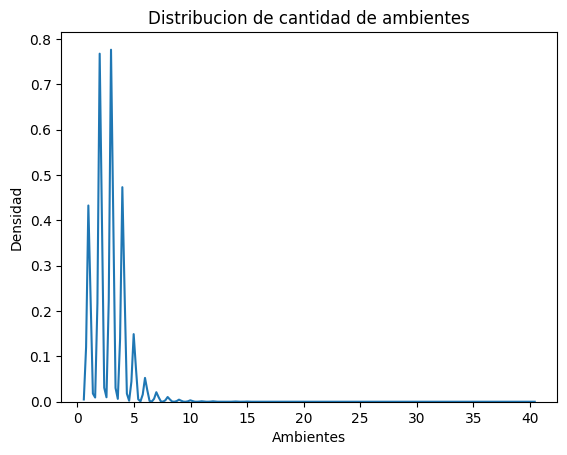

In [35]:
# Distribucion de la variable property_rooms
sns_hist=sns.kdeplot(data=df.property_rooms).set(title="Distribucion de cantidad de ambientes",xlabel="Ambientes",ylabel="Densidad")

#### Feature: property_bedrooms

In [36]:
# Medidas de resumen para la variable property_bedrooms
df.property_bedrooms.describe()

count    79845.000000
mean         2.008592
std          1.122122
min         -1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         70.000000
Name: property_bedrooms, dtype: float64

In [37]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_bedrooms.unique())

25

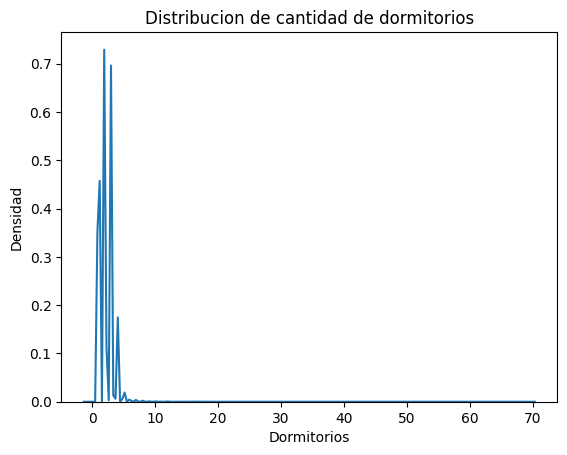

In [38]:
# Distribucion de la variable property_bedrooms
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de cantidad de dormitorios",xlabel="Dormitorios",ylabel="Densidad")

#### Feature: property_surface_total

In [39]:
# Medidas de resumen para la variable property_surface_total
df.property_surface_total.describe()

count     85723.000000
mean        107.884313
std         979.212312
min          10.000000
25%          45.000000
50%          65.000000
75%         104.000000
max      137000.000000
Name: property_surface_total, dtype: float64

In [40]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_total.unique())

691

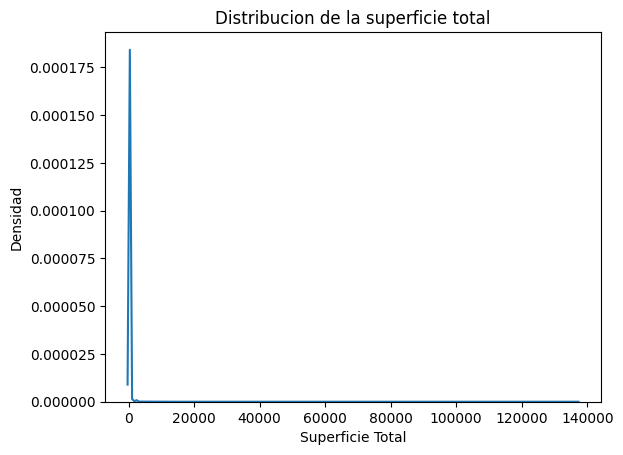

In [41]:
# Distribucion de la variable property_surface_total
sns_hist=sns.kdeplot(data=df.property_surface_total).set(title="Distribucion de la superficie total",xlabel="Superficie Total",ylabel="Densidad")

#### Feature: property_surface_covered

In [42]:
# Medidas de resumen para la variable property_surface_covered
df.property_surface_covered.describe()

count     87086.000000
mean         87.676435
std        1012.082565
min           1.000000
25%          40.000000
50%          57.000000
75%          88.000000
max      217000.000000
Name: property_surface_covered, dtype: float64

In [43]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_covered.unique())

582

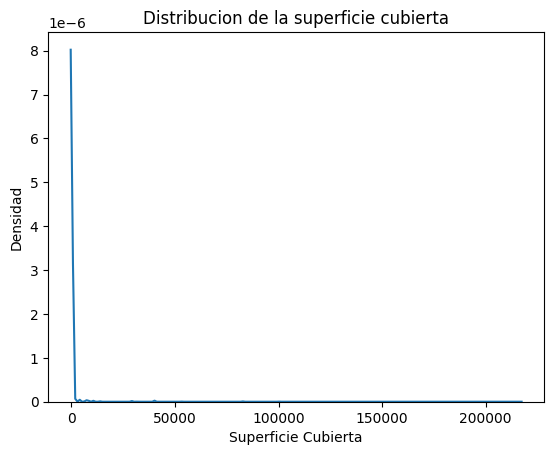

In [44]:
# Distribucion de la variable property_surface_covered
sns_hist=sns.kdeplot(data=df.property_surface_covered).set(title="Distribucion de la superficie cubierta",xlabel="Superficie Cubierta",ylabel="Densidad")

<h4 align="center"><b> Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno </b></h4>

#### Analia:

Distribucion tipos de vivienda

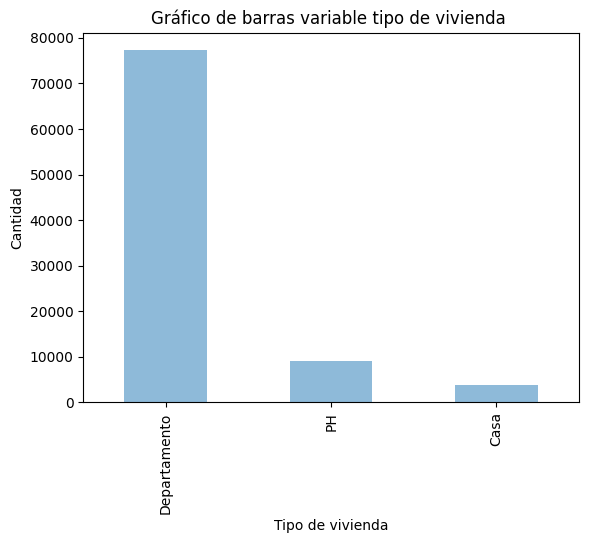

In [45]:
#Gráfico de barras

grf_ds=df['property_type'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable tipo de vivienda " , xlabel="Tipo de vivienda" , ylabel="Cantidad")

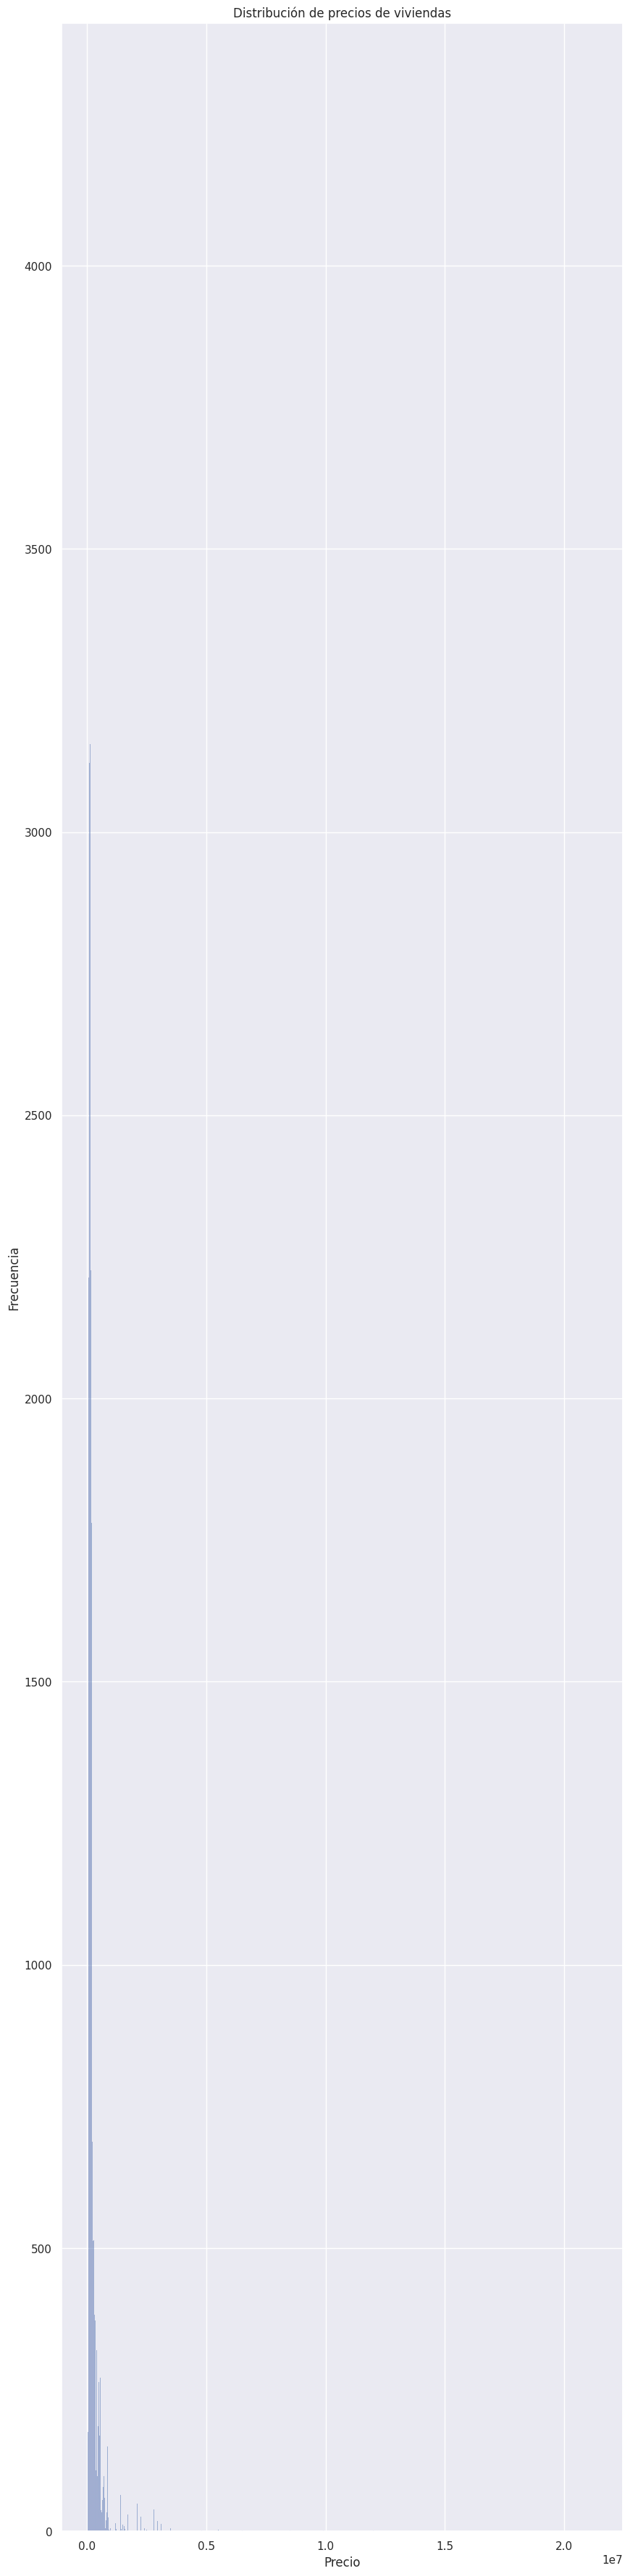

In [46]:
#Histograma de los precios
sns.set(rc={"figure.figsize":(10, 45)})
sns_hist=sns.histplot(data=df['property_price'], alpha = 0.5).set(title="Distribución de precios de viviendas",xlabel="Precio",ylabel="Frecuencia")

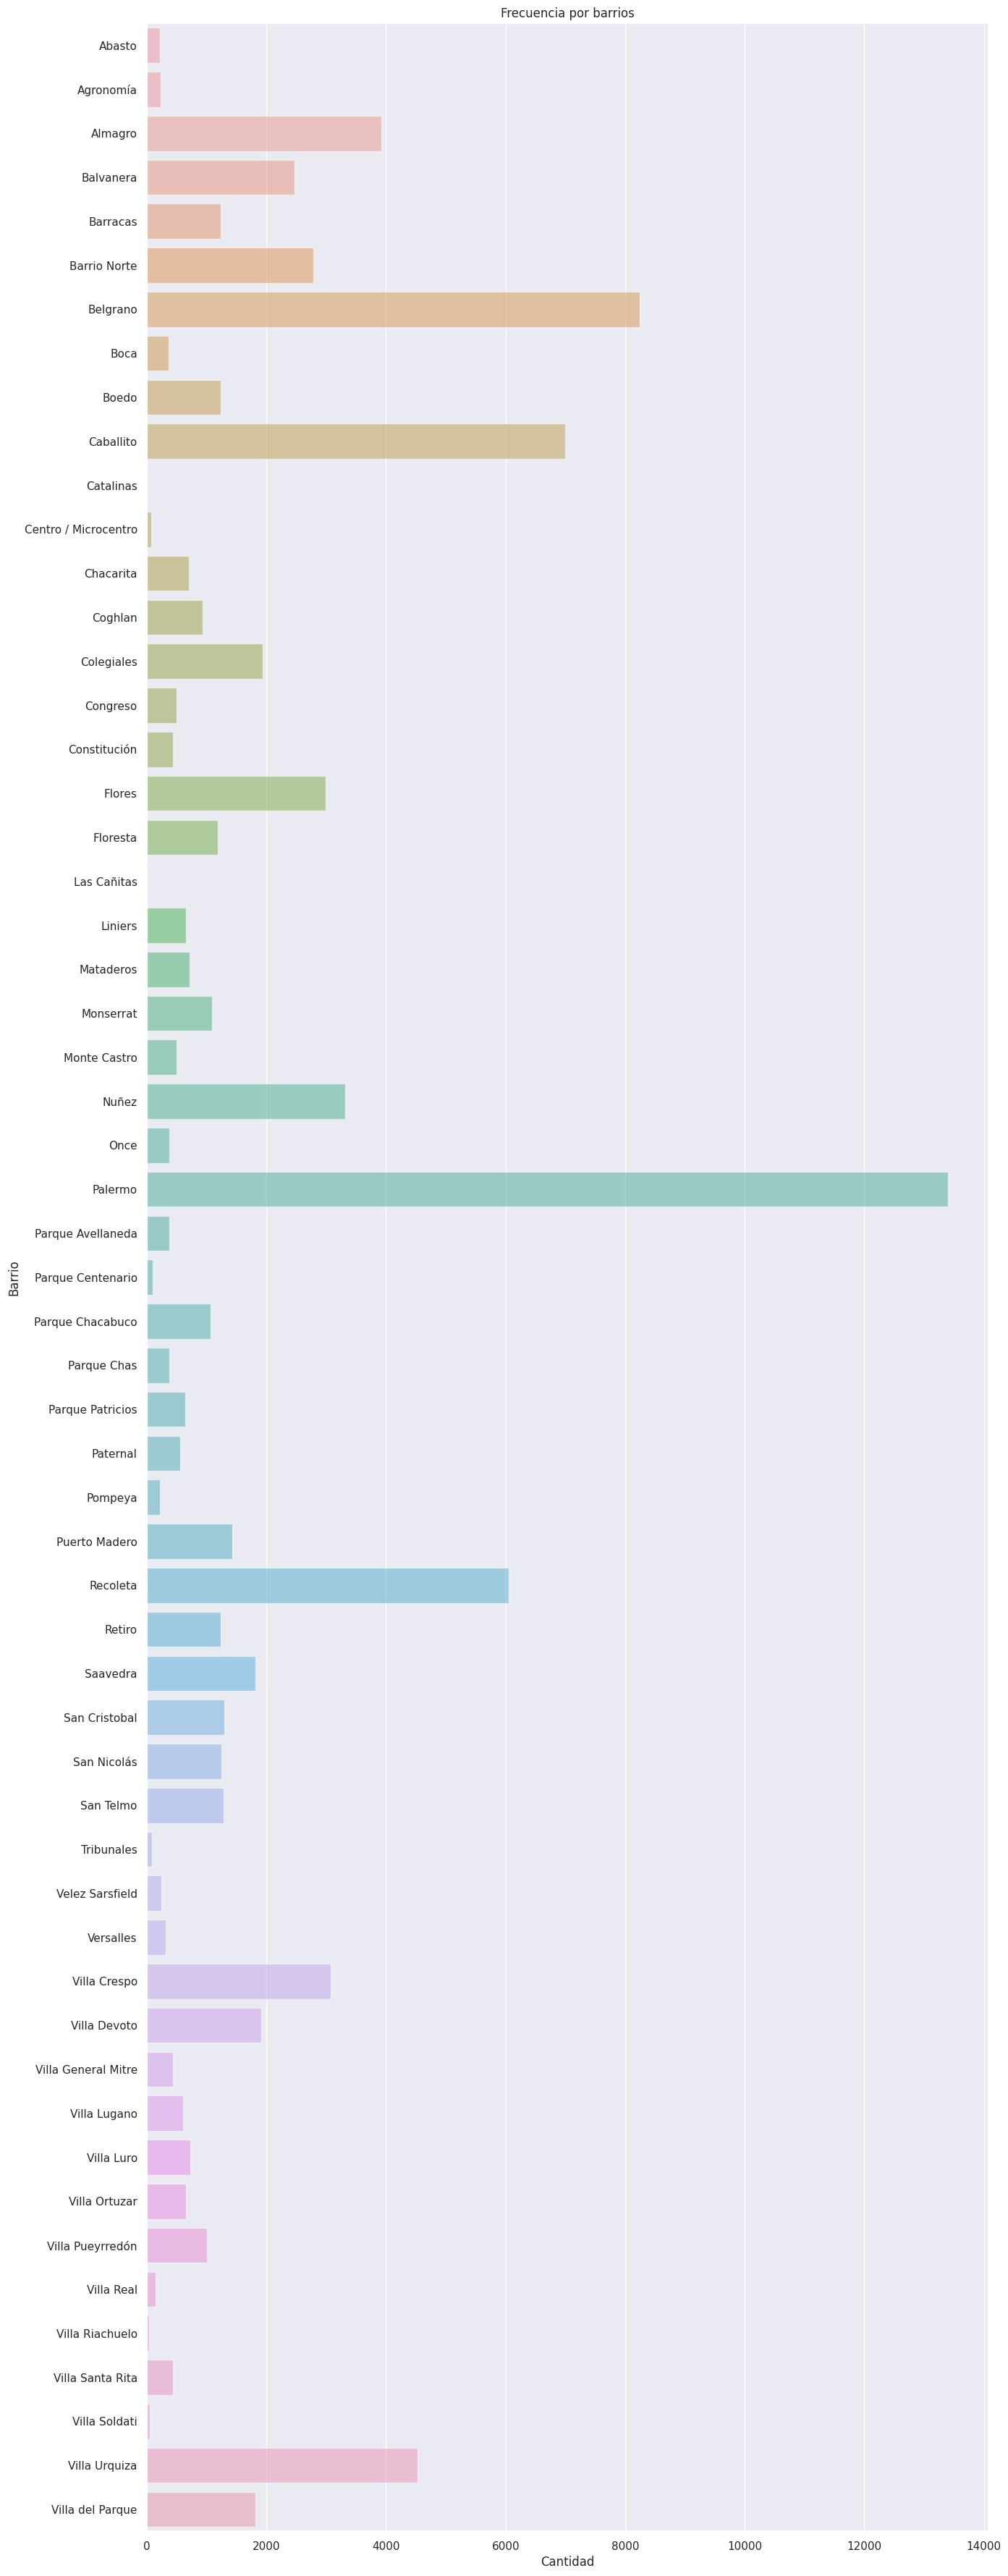

In [47]:
#Seaborn
ds_agrupado_Pclass=df.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_Pclass.index.tolist()  
eje_x = ds_agrupado_Pclass['property_price'].tolist() 
sns.set(rc={"figure.figsize":(15, 45)})
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia por barrios",xlabel='Cantidad',ylabel='Barrio')


#### Lucia:

### Tipo de propiedad (Casa, Departamento, PH)

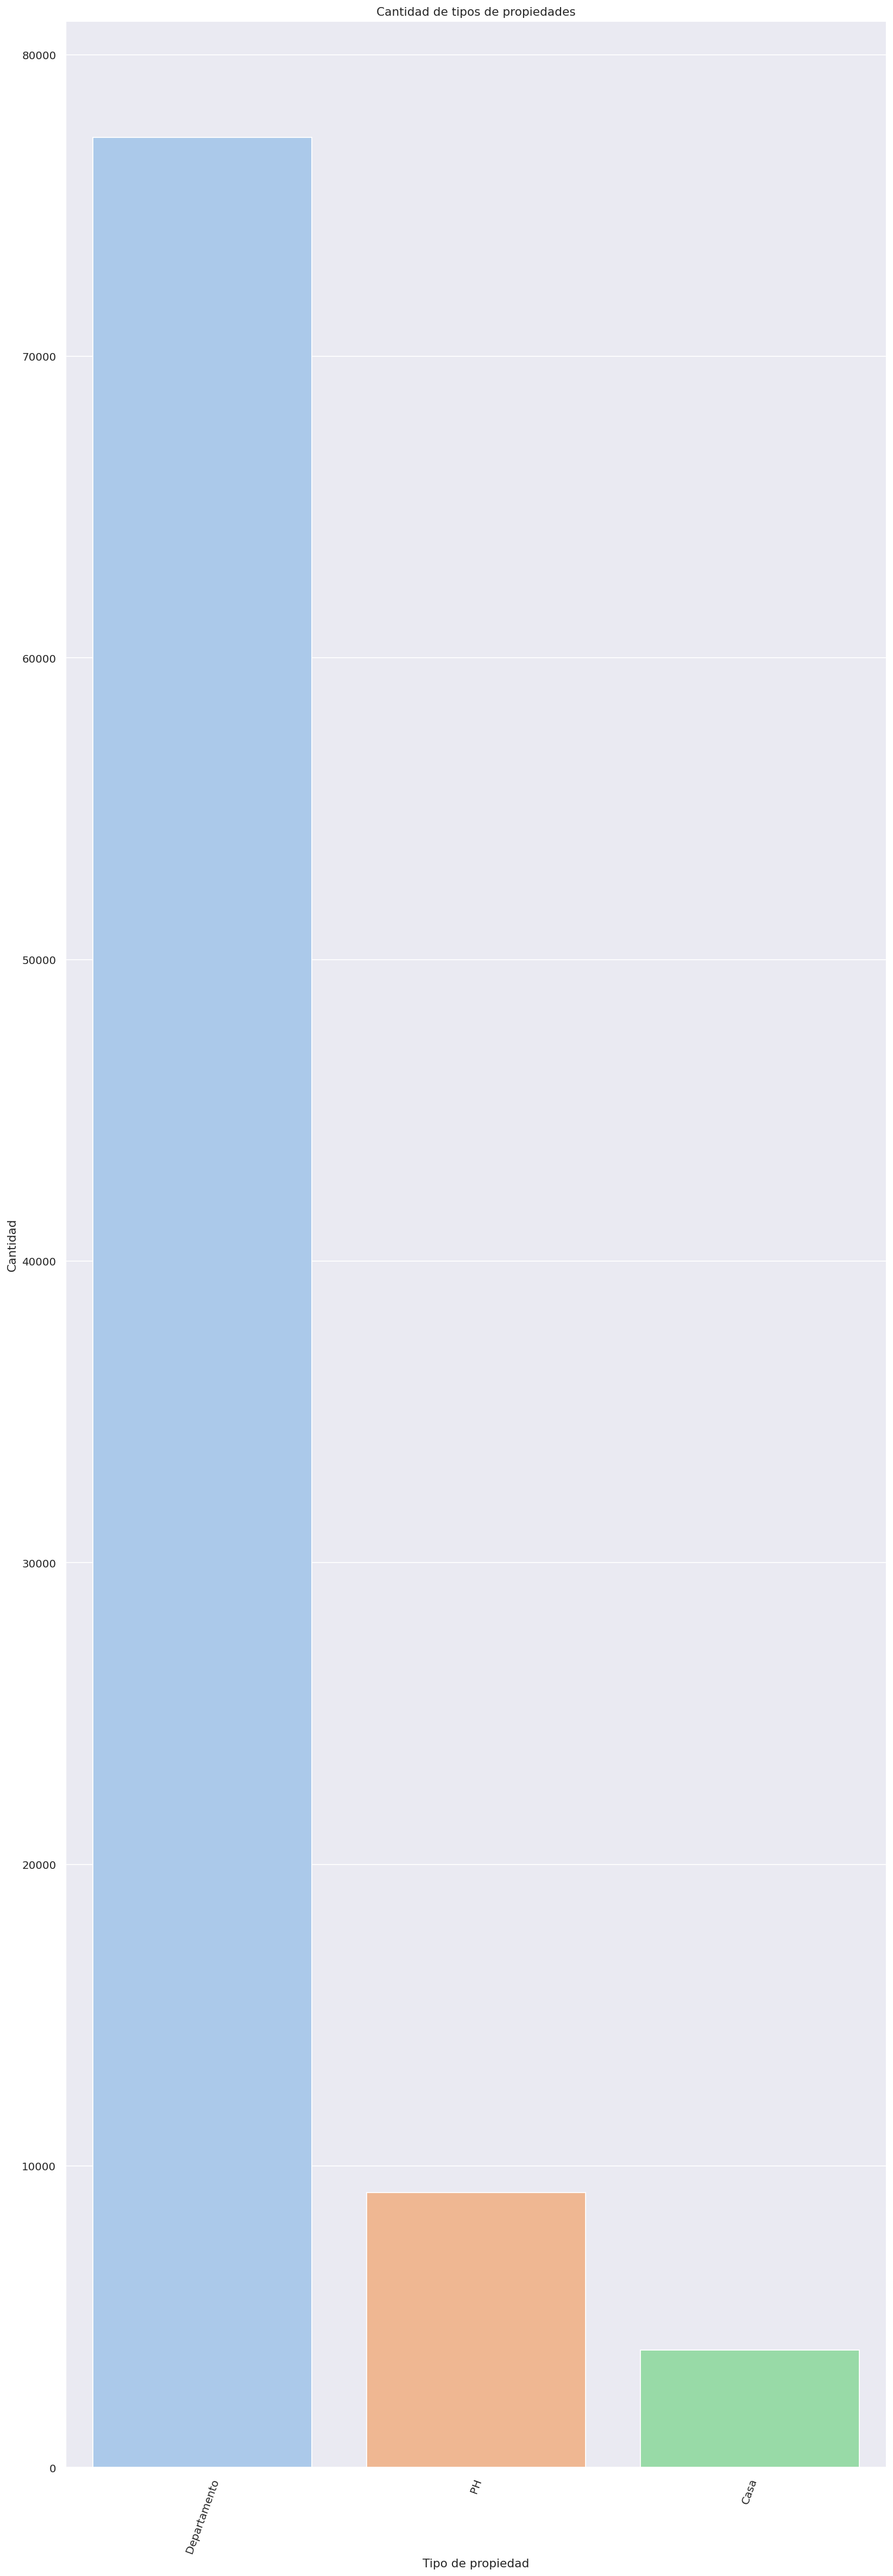

In [48]:
plt.figure(dpi=130)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_type', data=df, palette=colors, order=df.property_type.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=70)
plt.title("Cantidad de tipos de propiedades")
plt.show()

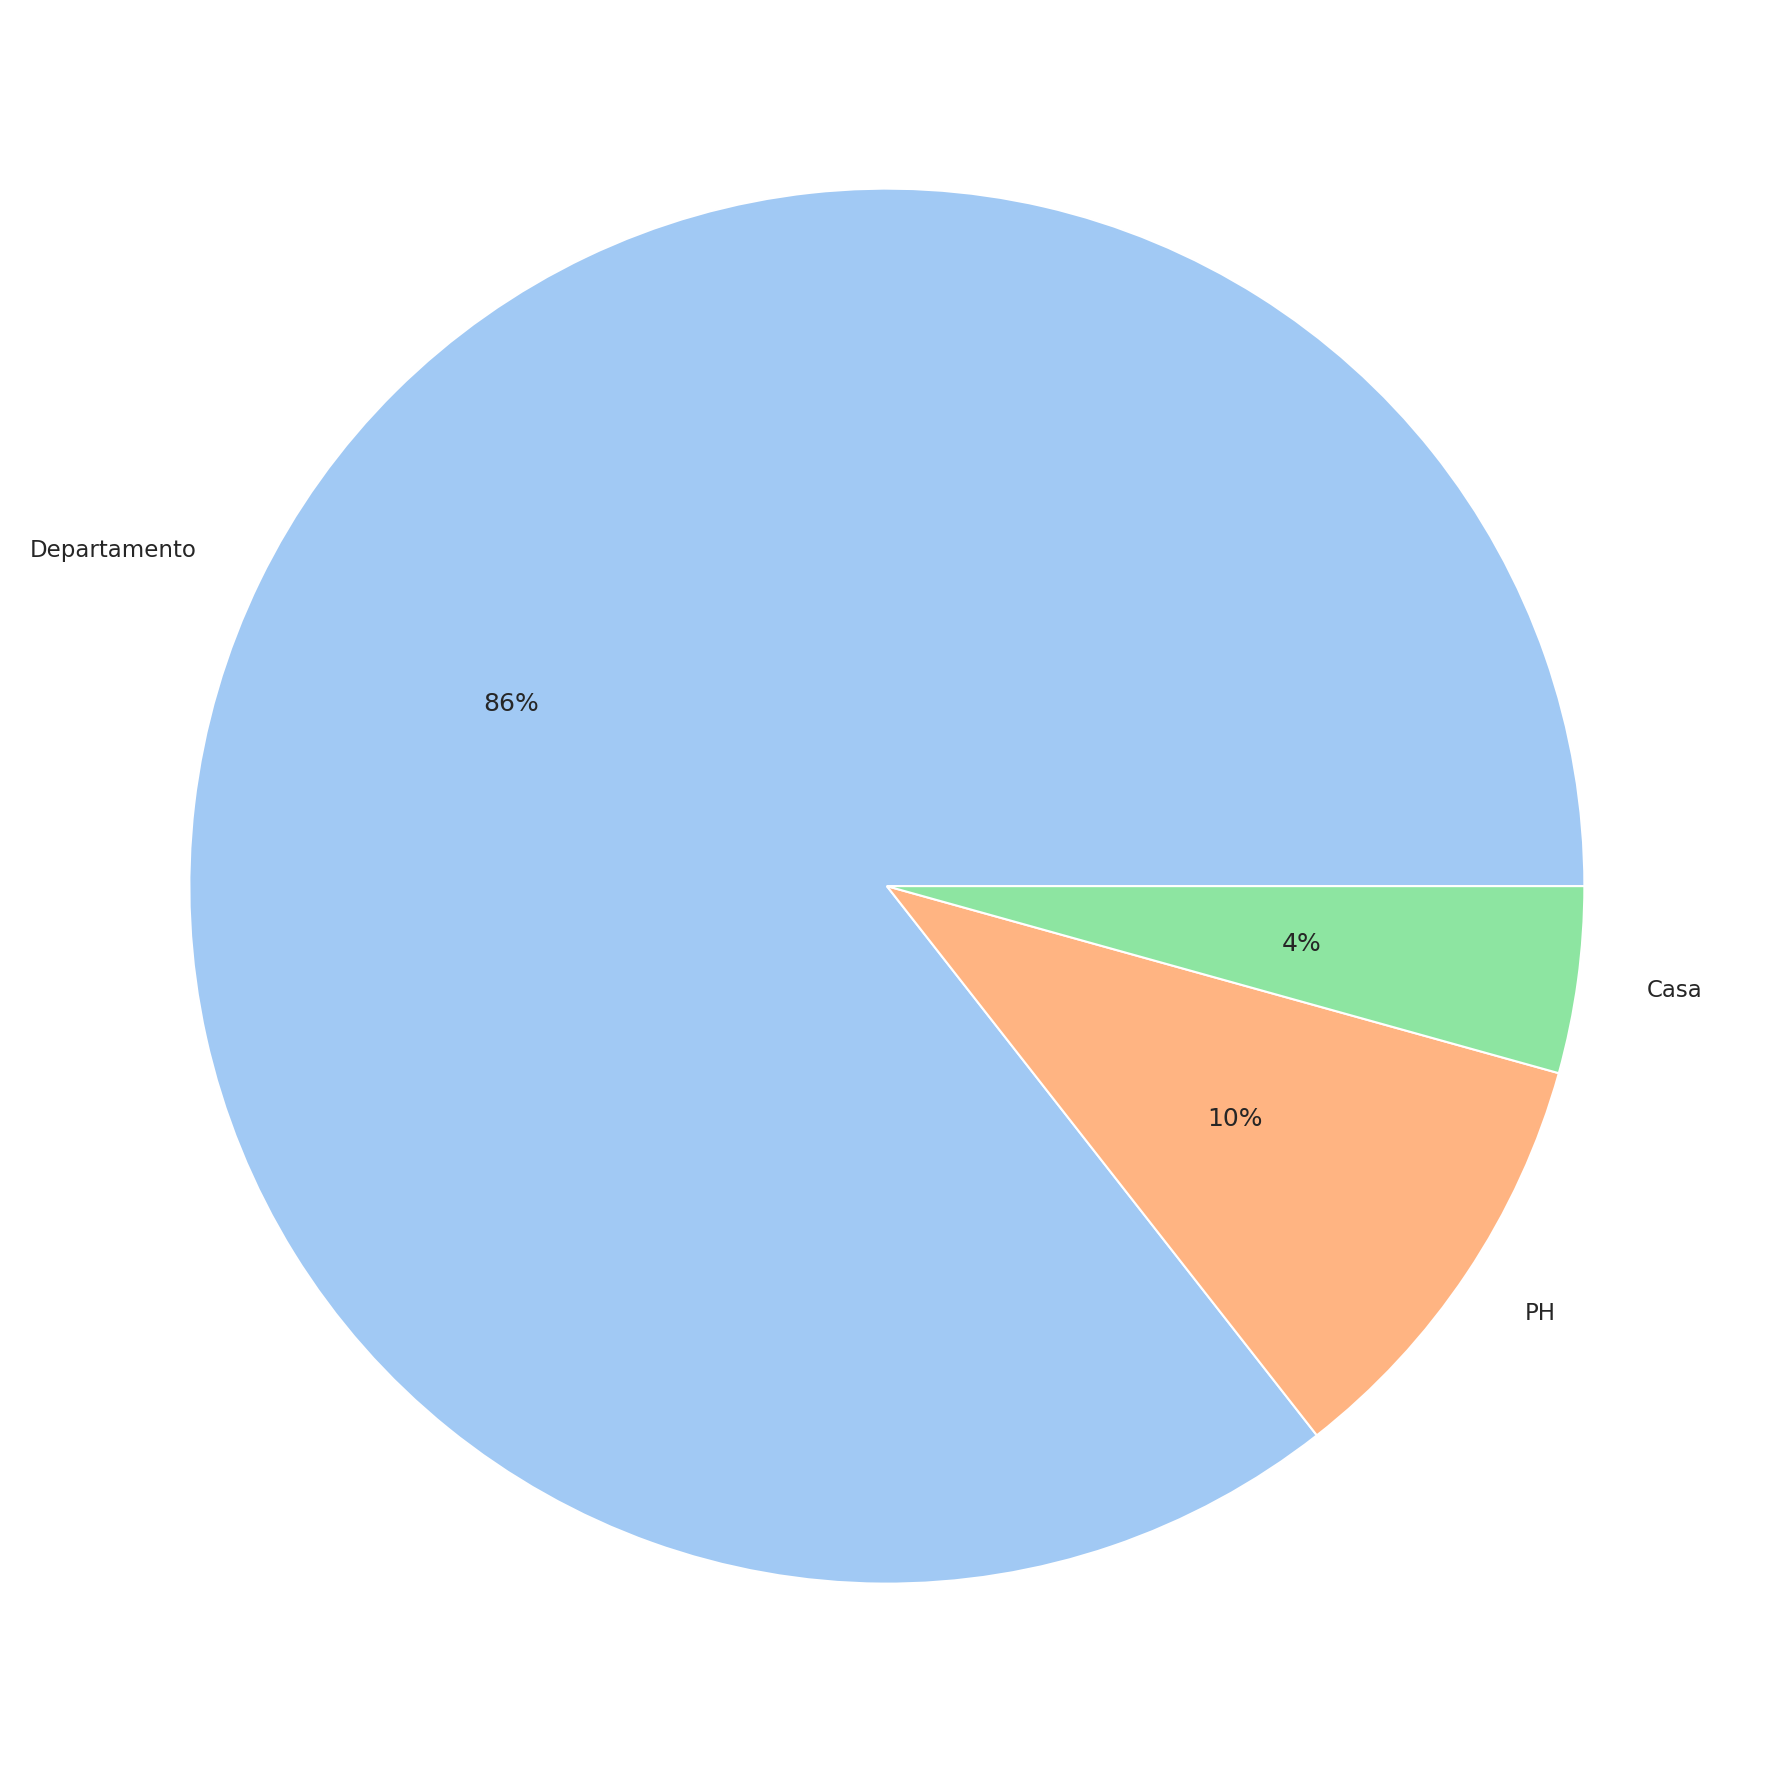

In [49]:
plt.figure(dpi=150)
data = df['property_type'].value_counts()
labels = df['property_type'].value_counts().index
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

+ El 86% de los datos corresponde a una publicacion de departamento.

### Título del anuncio

In [50]:
print('Cantidad de elementos nulos = ', df['property_title'].isnull().sum())

Cantidad de elementos nulos =  0


In [51]:
df['property_title'].value_counts().head(60)

Departamento - Palermo                             1351
Departamento - Recoleta                            1275
Departamento - Belgrano                            1004
Departamento - Caballito                            902
Departamento - Almagro                              631
Departamento - Villa Urquiza                        600
Departamento - Barrio Norte                         587
Departamento - Villa Crespo                         446
Departamento - Flores                               417
Departamento - Nuñez                                362
Departamento - Balvanera                            353
Departamento venta                                  317
Departamento - Puerto Madero                        316
Departamento - Las Cañitas                          277
Departamento - Colegiales                           274
Departamento - San Telmo                            262
Departamento - Almagro Norte                        248
Departamento - Saavedra                         

In [52]:
df['property_title'].value_counts().tail(10)

VENTA DEPTO RECICLADO PALERMO PISO18 TORRE DUCALE                                                       1
VENTA DE DPTO MONOAMBIENTE CON BALCON AL FRENTE                                                         1
OPORTUNIDAD!! VENTA IMPECABLE MONOAMBIENTE                                                              1
VENTA DE DEPTO. 2 AMBIENTES TRES ARROYOS CABA.                                                          1
VENTA MONOAMBIENTE CON BALCÓN ALMAGRO BOEDO                                                             1
Gavilán 800 P 4º  2 amb. a Estrenar c/bcón. fte. 2 bños. Amenities. Oportunidad!!                       1
Gavilán 800 P 8º  2 amb. a Estrenar c/bcón. Cfte. 2 bños. Amenities. Oportunidad!!                      1
Venta departamento 3 amb Pileta Parrilla                                                                1
Gavilán 800 P 3º  2 amb. a Estrenar c/bcón. fte. 2 bños. Amenities. Oportunidad!!                       1
VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF 

In [53]:
df_title = df.groupby('property_title').filter(lambda x : len(x)>200)

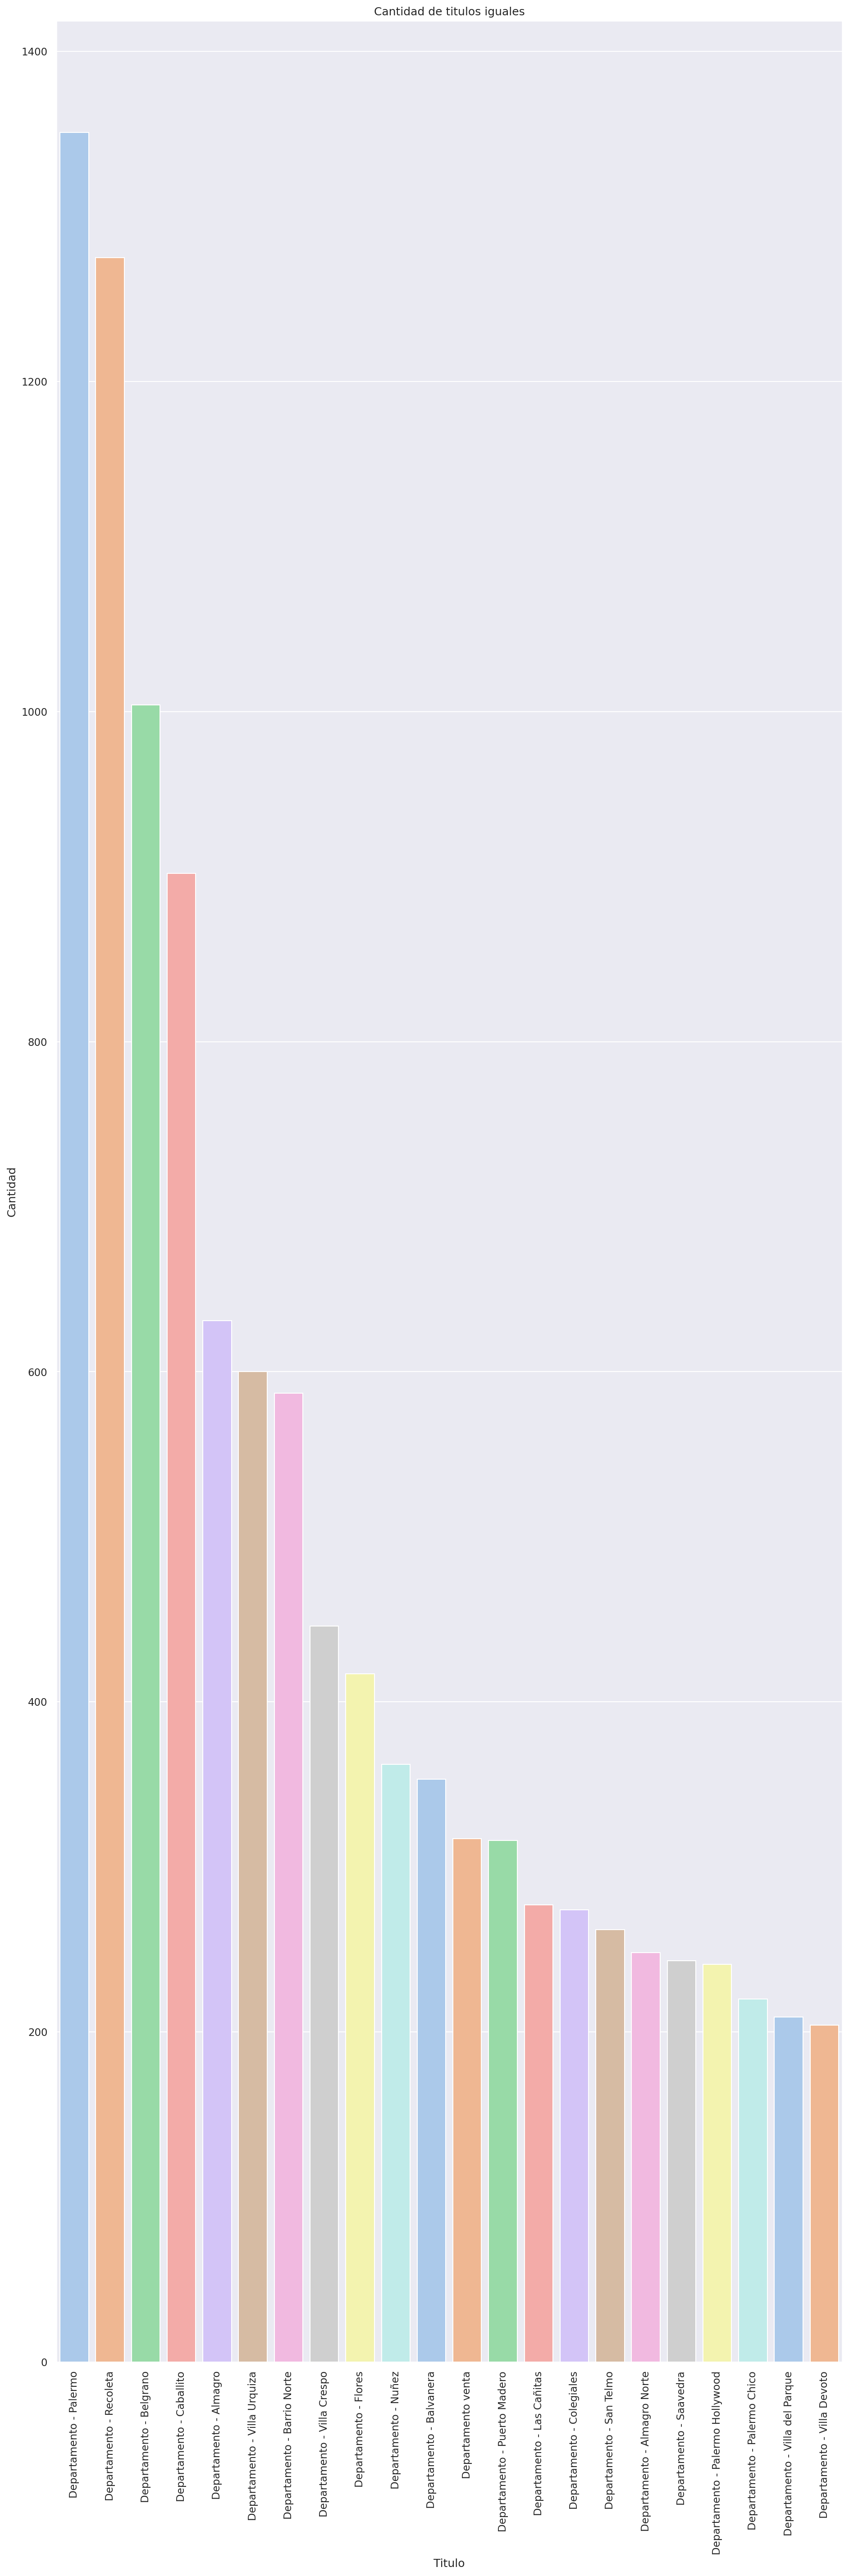

In [54]:
plt.figure(dpi=150)
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_title', data=df_title, palette=colors, order=df_title.property_title.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Titulo")
plt.xticks(rotation=90)
plt.title("Cantidad de titulos iguales")
plt.show()

In [55]:
df_t = df["property_title"].str.split('-', expand=True)
df_t.head()

0              1               2   \
1  VENTA TRES AMBIENTES LA BOCA PISO ALTO           None            None   
2                           Departamento    4 Ambientes    Catalinas Sur   
3     Venta departamento 4 ambientes Once           None            None   
4                                     PH           Boedo            None   
5    PH 2 Ambientes c/Patio HECHO A NUEVO           None            None   

     3     4     5     6     7     8     9     10    11    12    13    14  \
1  None  None  None  None  None  None  None  None  None  None  None  None   
2  None  None  None  None  None  None  None  None  None  None  None  None   
3  None  None  None  None  None  None  None  None  None  None  None  None   
4  None  None  None  None  None  None  None  None  None  None  None  None   
5  None  None  None  None  None  None  None  None  None  None  None  None   

     15  
1  None  
2  None  
3  None  
4  None  
5  None

In [56]:
df_t = df_t[[0,1]]
df_t.columns = ['Tipo', 'Barrio']
df_t

Tipo         Barrio
1                 VENTA TRES AMBIENTES LA BOCA PISO ALTO           None
2                                          Departamento    4 Ambientes 
3                    Venta departamento 4 ambientes Once           None
4                                                    PH           Boedo
5                   PH 2 Ambientes c/Patio HECHO A NUEVO           None
...                                                  ...            ...
94244      Espectacular 4 amb130m2 con Balcon Terraza!!!           None
94245        3 ambientes con cochera listo para habitar!           None
94246  VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...           None
94247  VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...           None
94248                       VENTA DEPTO 2 1/2 AMBIENTES          CENTRO

[90272 rows x 2 columns]

In [57]:
df_t = df_t.loc[(df_t['Tipo']=='Casa') | (df_t['Tipo']=='PH') | (df_t['Tipo']=='Departamento')]
df_t.head(10)

Tipo                                             Barrio
1696             PH           Triplex tipo casa con cochera y jardin! 
3855           Casa                                           Saavedra
3874           Casa                                             venta 
5308             PH     Entorno Parque Saavedra, Av Cramer y Av Balbin
7068             PH                                              Venta
7122             PH                                               MONO
9490   Departamento  Belgrano 2Ambientes P.B. a mts Subte Apto prof...
10452            PH                                        4 AMBIENTES
11263  Departamento                                               None
13230            PH                                              CASA

#### Santiago:

<h4 align="center"><b> Determinar variables irrelevantes en el análisis </b></h4>

Se eliminara el feature Id y place_l6.
Las razones:
* Id: Por ser irrelevante
*  Place_l6: Por solo tener valores nan

In [58]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(f"Porcentaje de nan de place_l6: { na_ratio.place_l6}")

Porcentaje de nan de place_l6: 100.0


In [59]:
df.drop(columns = ['place_l6', 'id'], inplace=True) 

<h4 align="center"><b> Realizar un análisis gráfico de las distribuciones de las variables </b></h4>

#### Brayan:

In [60]:
f_br = ['start_date_day', 'start_date_month', 'start_date_year', 'end_date_day', 'end_date_month', 'end_date_year', 'created_on_day', 'created_on_month', 'created_on_year', 'latitud', 'longitud']

In [61]:
display(df['longitud'].unique())
display(df['latitud'].unique())


array([-58.361124 , -58.3618713, -58.4019341, ..., -58.4003213,
       -58.4898103, -58.4828137])

array([-34.6373187, -34.6286465, -34.6100272, ..., -34.6032451,
       -34.6140627, -34.614175 ])

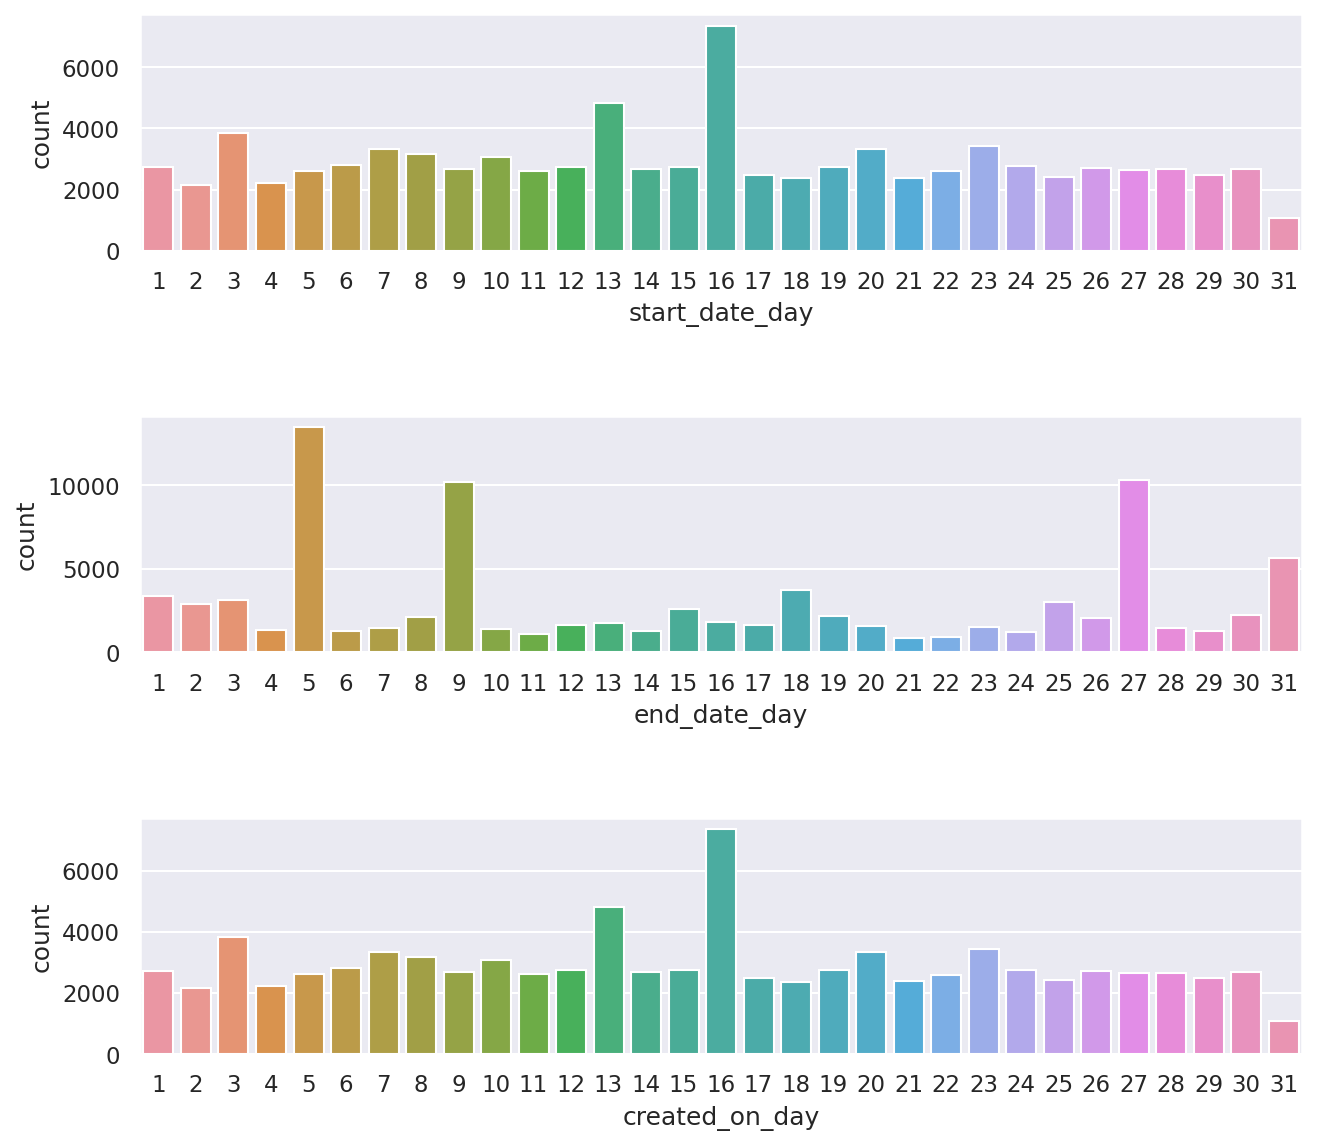

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_day", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_day", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_day", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

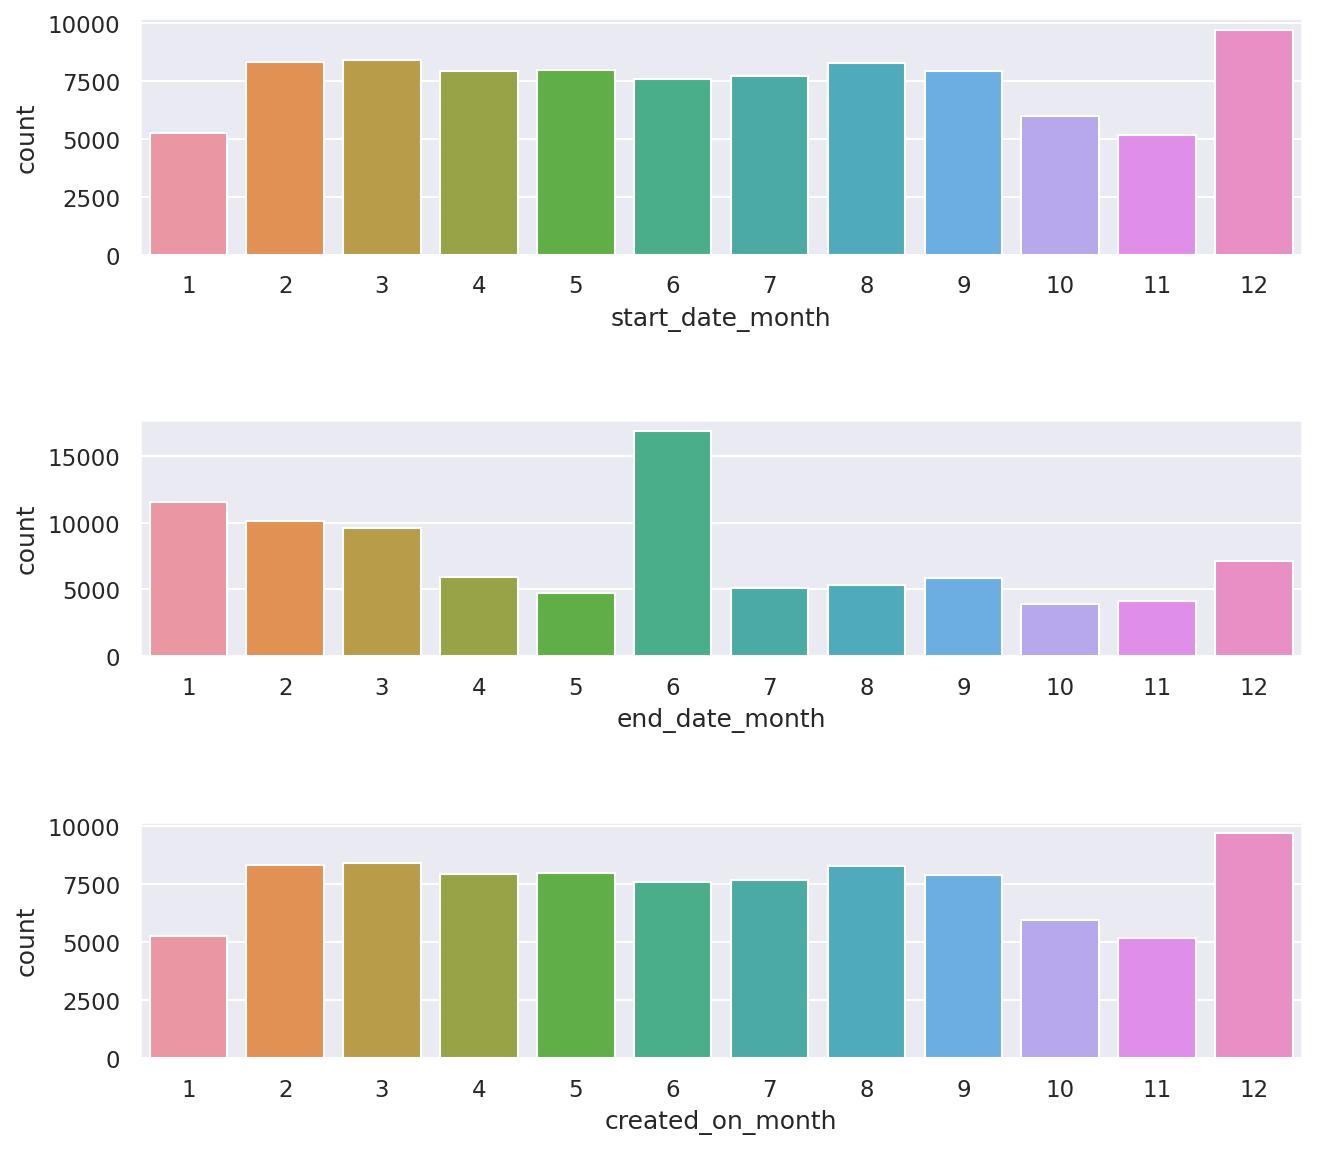

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_month", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_month", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_month", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

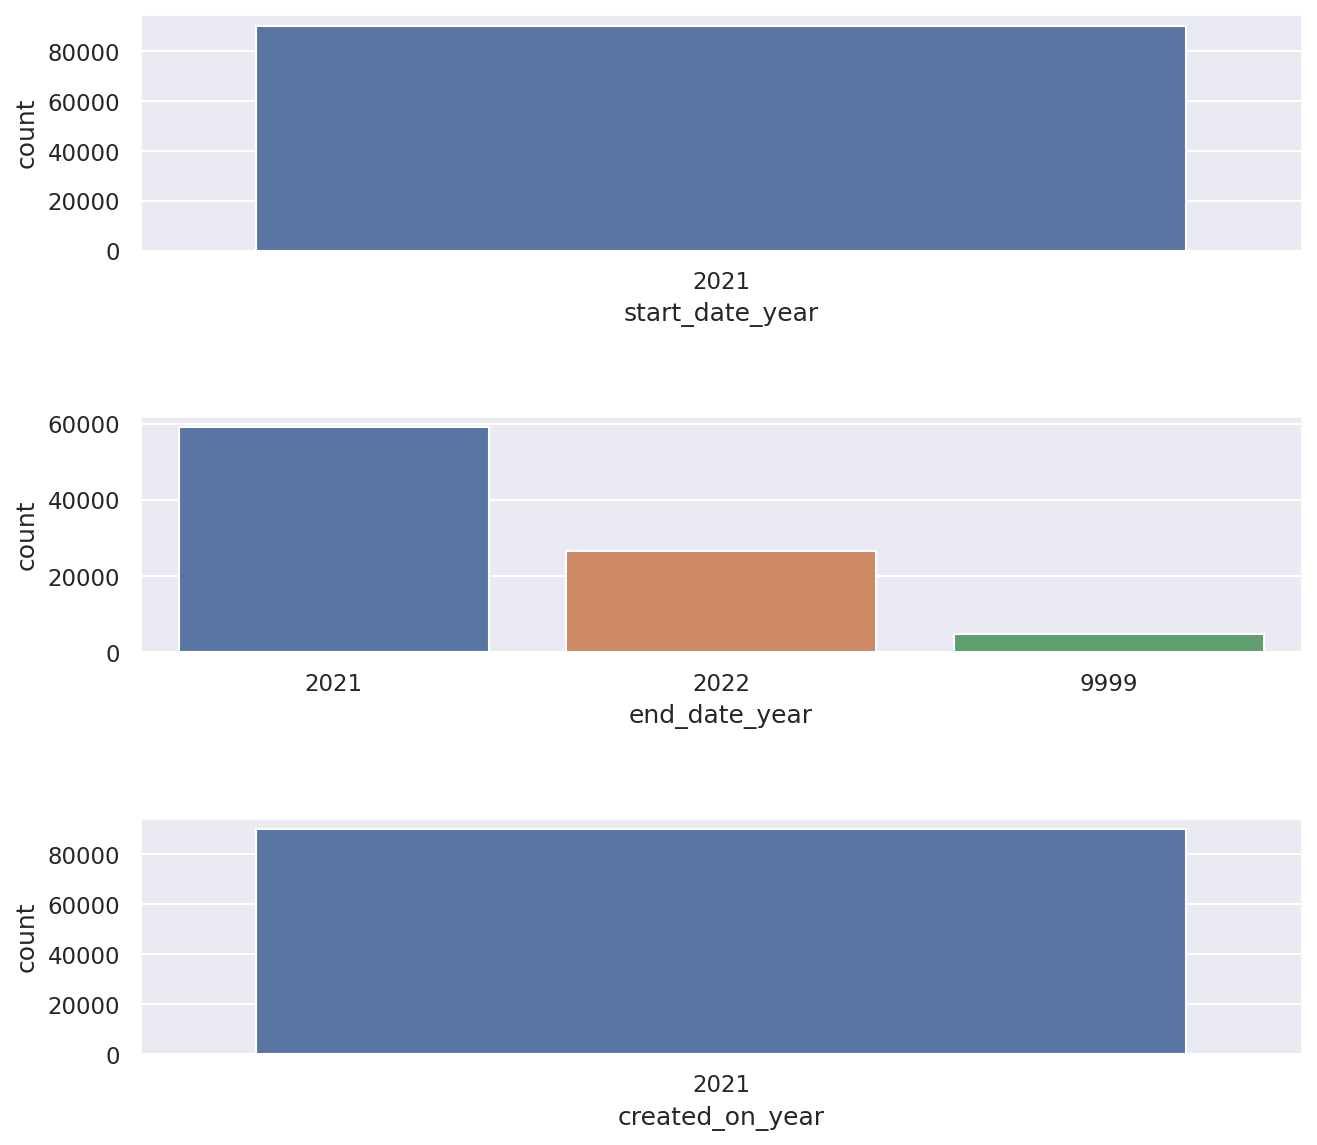

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_year", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_year", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_year", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

Text(0.5, 1.0, 'Latitud')

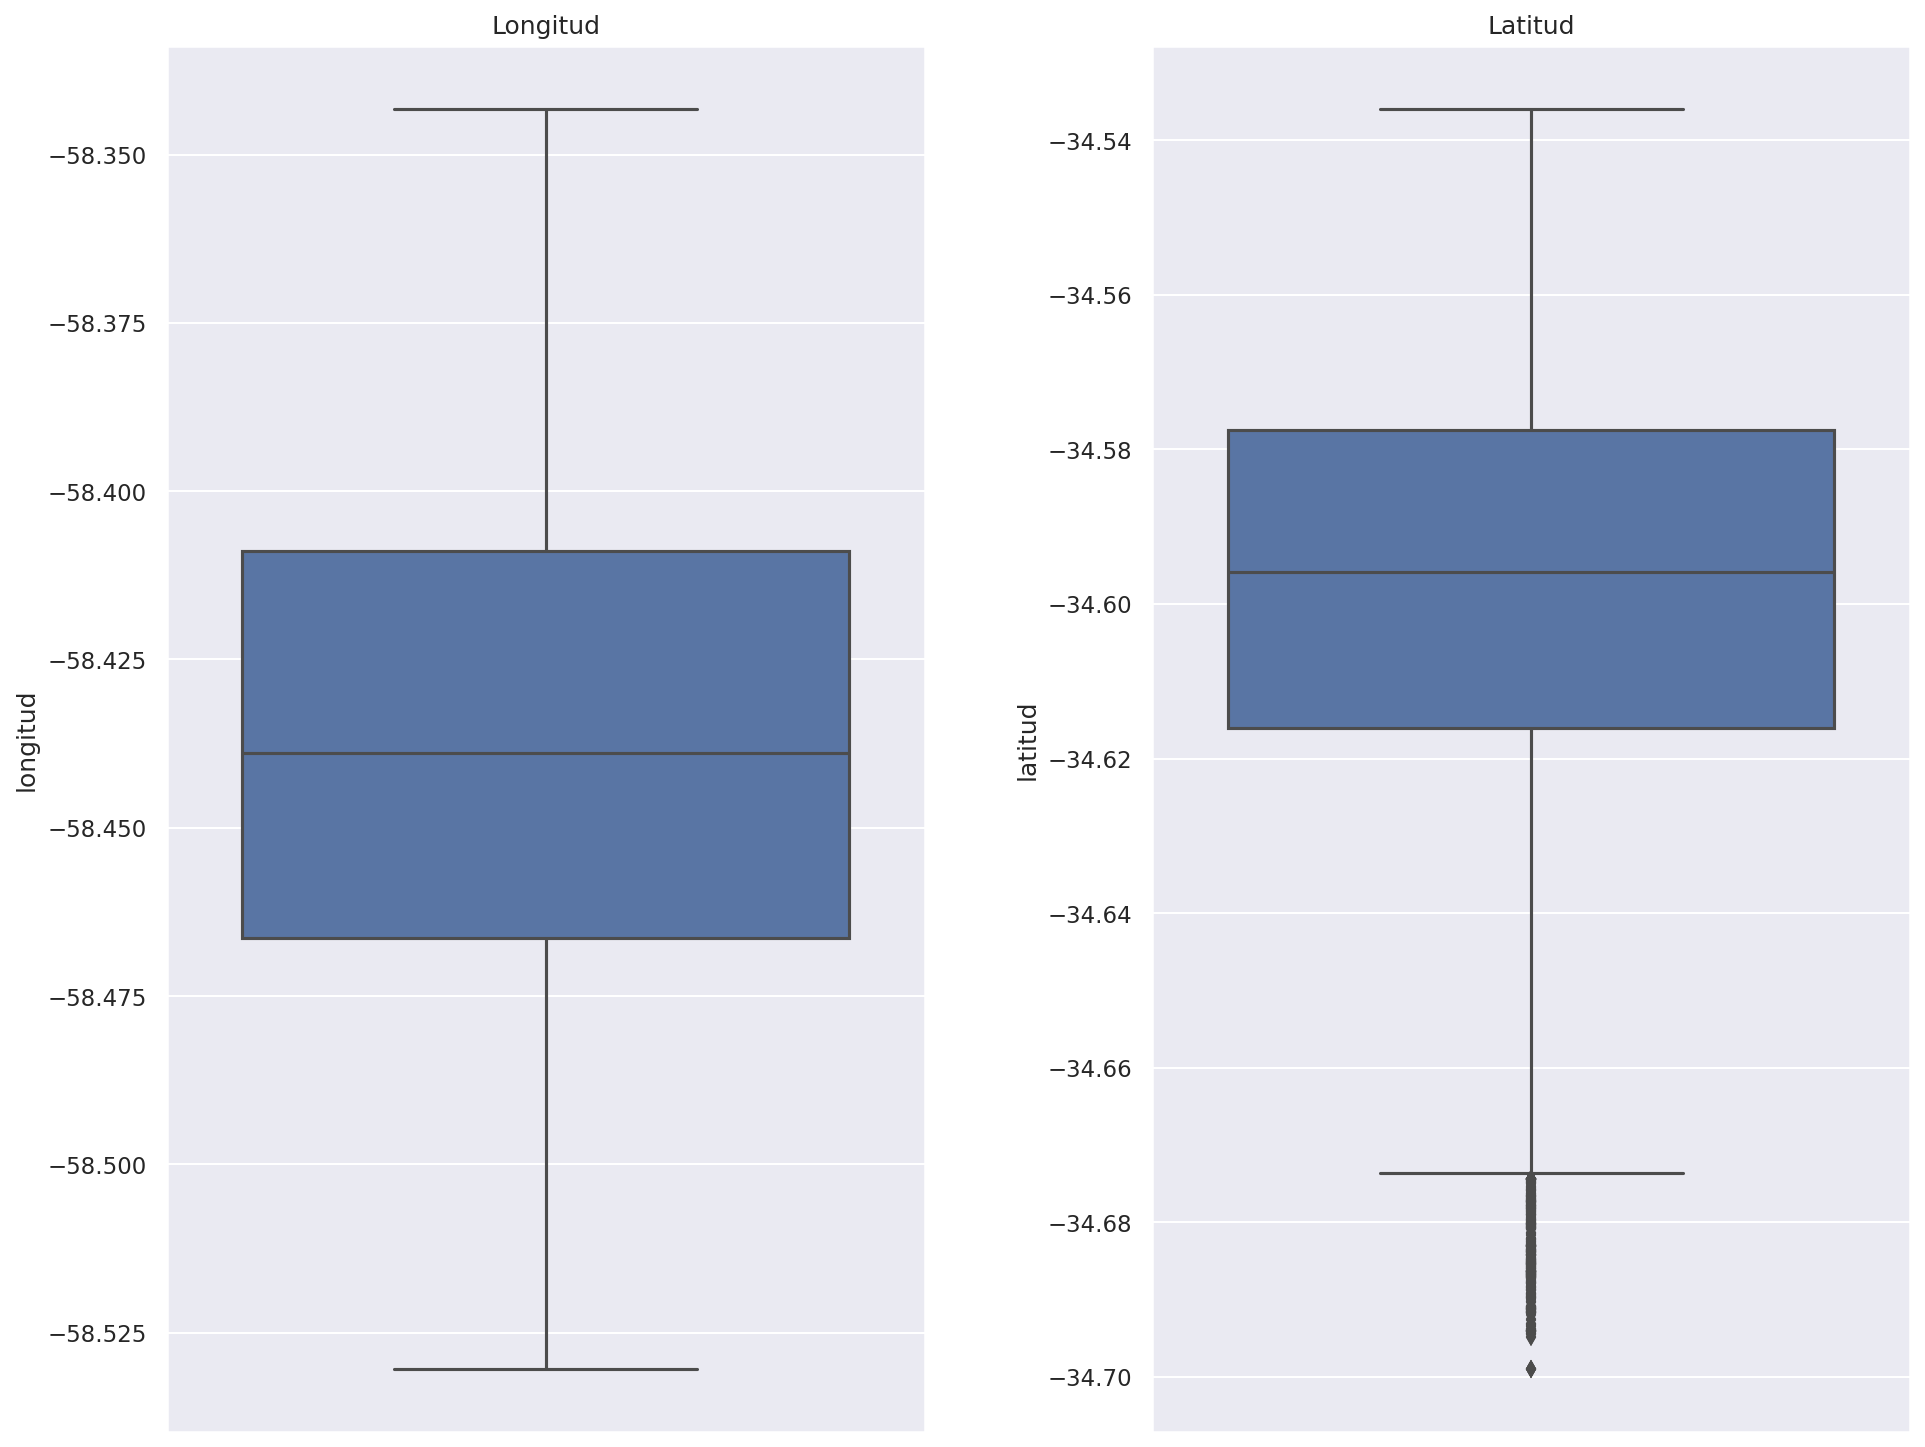

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(15, 12))
sns.boxplot(y=df['longitud'], ax=axes[0])
sns.boxplot(y=df['latitud'], ax=axes[1])
plt.subplots_adjust(wspace=0.3)
axes[0].set_title("Longitud")
axes[1].set_title("Latitud")

<h4 align="center"><b> Analizar las correlaciones existentes entre las variables </b></h4>

#### Brayan:

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

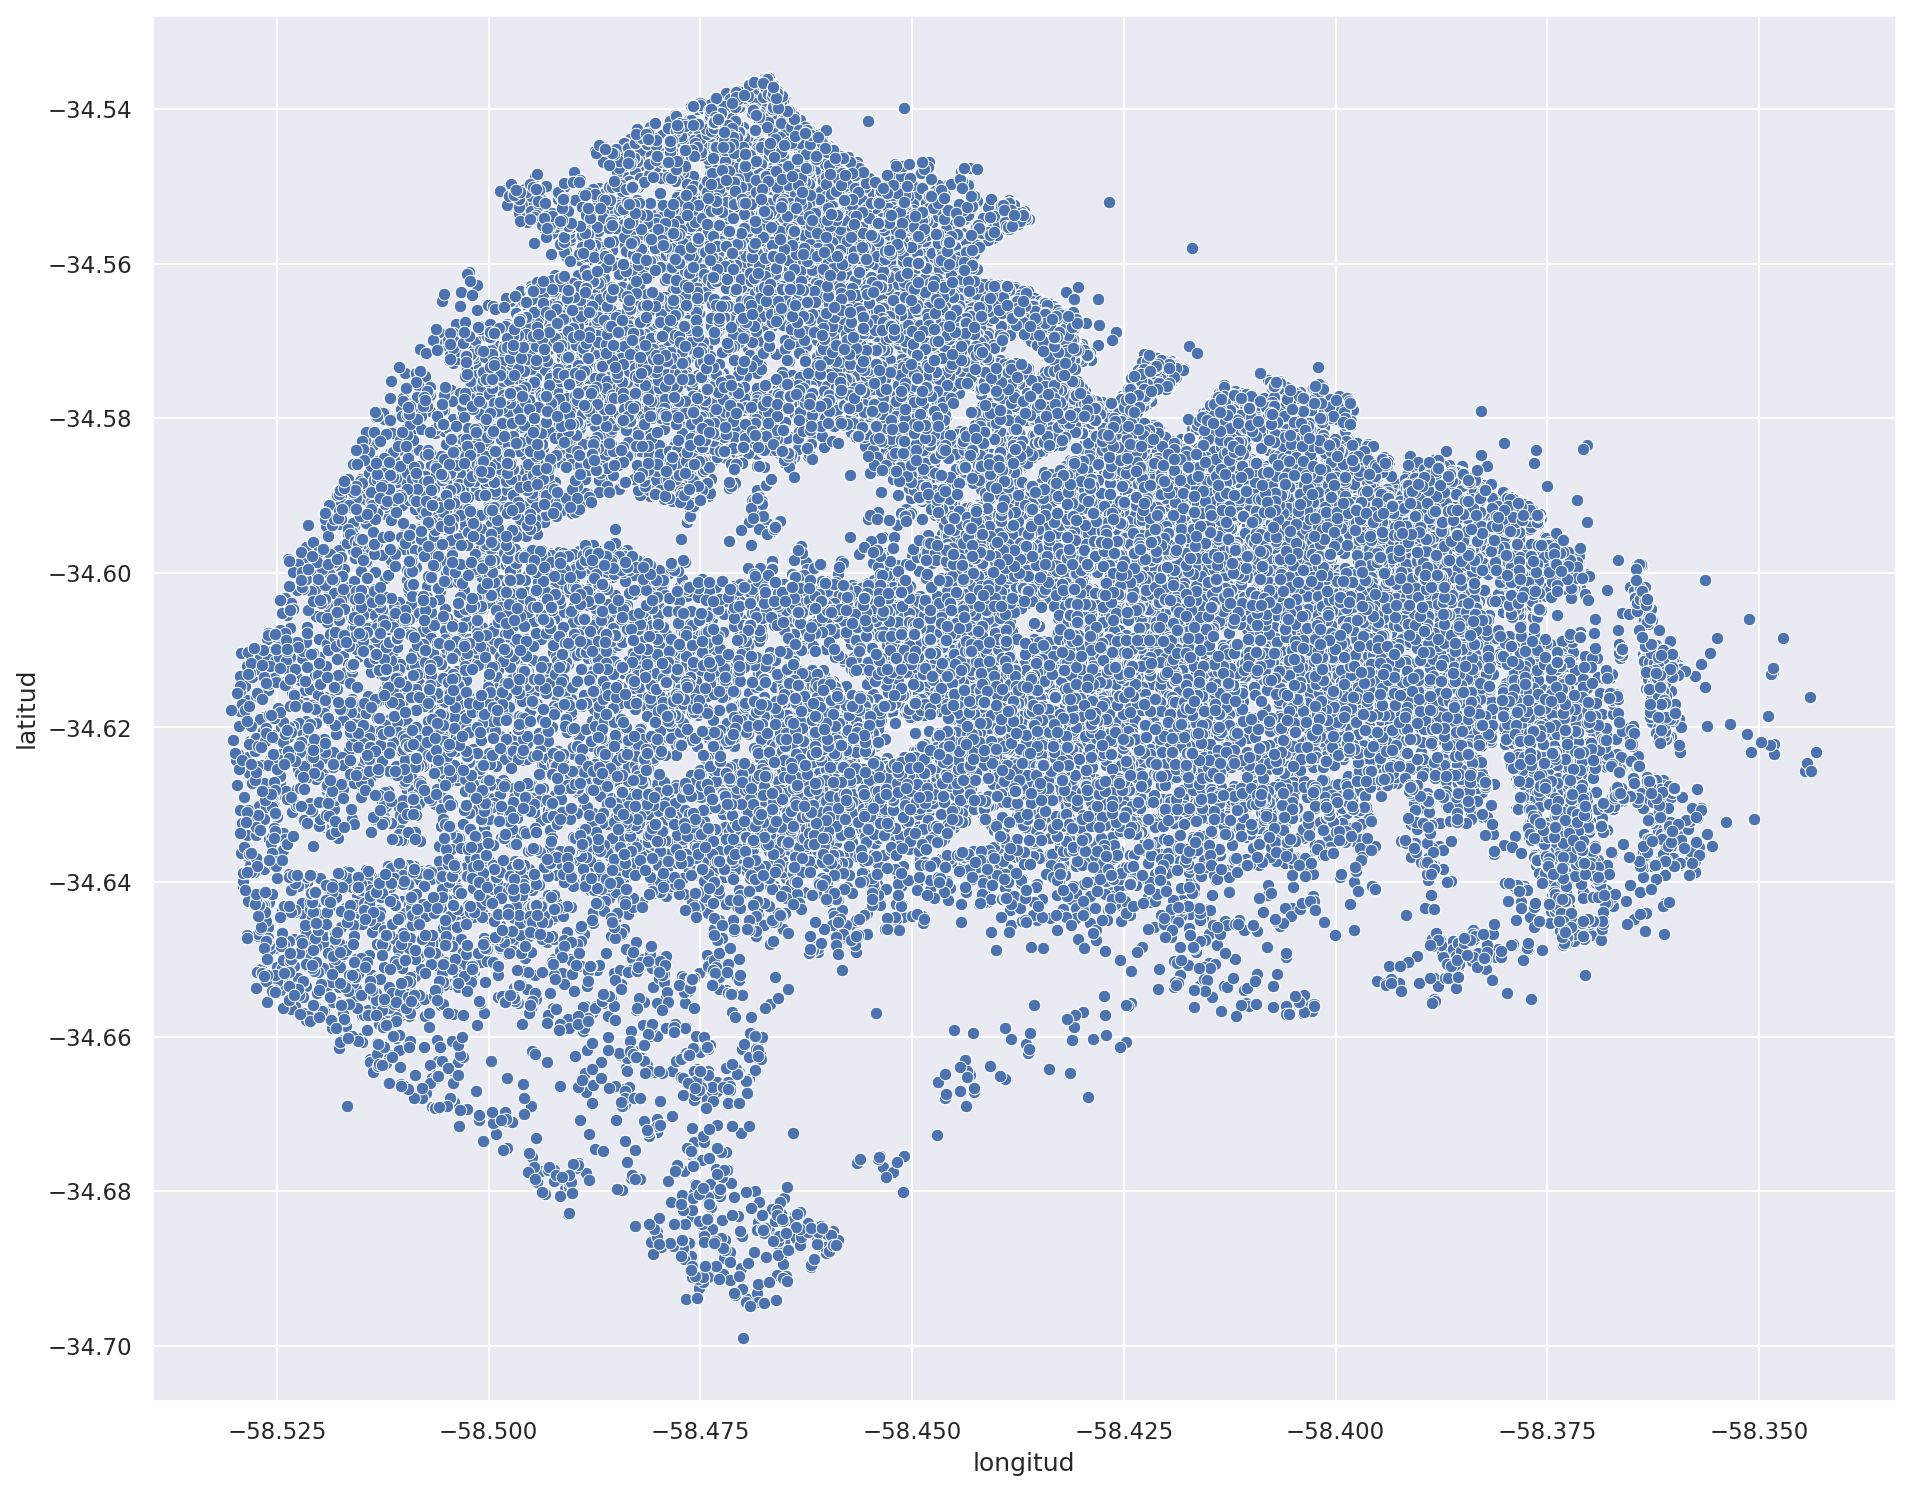

In [66]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 12))
sns.scatterplot(data=df, x="longitud", y="latitud")

#### Analia:

Vemos la relacion entre algunos features

In [68]:
pd.crosstab(df['place_l3'],df['property_type'])

property_type         Casa  Departamento   PH
place_l3                                     
Abasto                   5           209    5
Agronomía               28           116   90
Almagro                 32          3544  343
Balvanera               23          2269  181
Barracas                87           952  193
Barrio Norte            22          2729   39
Belgrano               228          7789  230
Boca                    26           287   52
Boedo                   82           867  285
Caballito              161          6288  549
Catalinas                1             6    0
Centro / Microcentro     0            73    2
Chacarita               32           572   92
Coghlan                 66           754  117
Colegiales              75          1621  245
Congreso                 1           475   20
Constitución            21           348   70
Flores                 233          2411  351
Floresta               124           732  331
Las Cañitas              0            12    0
Liniers                 85           402  171
Mataderos              129           274  309
Monserrat                9           991   88
Monte Castro            71           276  150
Nuñez                  136          3010  171
Once                     1           364    6
Palermo                176         12731  494
Parque Avellaneda       95           131  154
Parque Centenario        0            83    9
Parque Chacabuco       118           694  254
Parque Chas             33           237  100
Parque Patricios        67           432  137
Paternal                41           391  124
Pompeya                 46           104   63
Puerto Madero            4          1420    0
Recoleta                18          5969   68
Retiro                  18          1207    7
Saavedra               200          1338  282
San Cristobal           42          1079  172
San Nicolás              9          1225   15
San Telmo               30          1119  135
Tribunales               0            83    1
Velez Sarsfield         36           105  101
Versalles               94           113  106
Villa Crespo            65          2740  273
Villa Devoto           266          1131  517
Villa General Mitre     48           281  104
Villa Lugano           145           353  110
Villa Luro              65           484  176
Villa Ortuzar           50           491  118
Villa Pueyrredón        95           582  329
Villa Real              33            35   72
Villa Riachuelo         14            17    4
Villa Santa Rita        43           284  111
Villa Soldati           14            25    6
Villa Urquiza          186          3713  623
Villa del Parque       172          1279  369

Veo la matriz de correlacion entre los features

In [70]:
#Calculo la correlación
matriz_corr=df.corr()
matriz_corr

latitud  longitud  property_rooms  \
latitud                   1.000000 -0.140067       -0.031599   
longitud                 -0.140067  1.000000        0.012021   
property_rooms           -0.031599  0.012021        1.000000   
property_bedrooms        -0.033539  0.018148        0.874688   
property_surface_total    0.008633  0.002094        0.065111   
property_surface_covered  0.002433  0.003562        0.074021   
property_price            0.149062  0.123224        0.484132   
start_date_day            0.000743 -0.007902       -0.013831   
start_date_month          0.002495 -0.008976       -0.003324   
start_date_year                NaN       NaN             NaN   
end_date_day              0.005825  0.000884       -0.009321   
end_date_month            0.019299  0.008068       -0.009891   
end_date_year            -0.008391  0.008418        0.001006   
created_on_day            0.000743 -0.007902       -0.013831   
created_on_month          0.002495 -0.008976       -0.003324   
created_on_year                NaN       NaN             NaN   

                          property_bedrooms  property_surface_total  \
latitud                           -0.033539                0.008633   
longitud                           0.018148                0.002094   
property_rooms                     0.874688                0.065111   
property_bedrooms                  1.000000                0.066979   
property_surface_total             0.066979                1.000000   
property_surface_covered           0.072864                0.617288   
property_price                     0.419511                0.085613   
start_date_day                    -0.007805               -0.001035   
start_date_month                  -0.007771               -0.011155   
start_date_year                         NaN                     NaN   
end_date_day                      -0.007071               -0.007802   
end_date_month                    -0.005724                0.002786   
end_date_year                      0.010338                0.004383   
created_on_day                    -0.007805               -0.001035   
created_on_month                  -0.007771               -0.011155   
created_on_year                         NaN                     NaN   

                          property_surface_covered  property_price  \
latitud                                   0.002433        0.149062   
longitud                                  0.003562        0.123224   
property_rooms                            0.074021        0.484132   
property_bedrooms                         0.072864        0.419511   
property_surface_total                    0.617288        0.085613   
property_surface_covered                  1.000000        0.054334   
property_price                            0.054334        1.000000   
start_date_day                            0.002045       -0.006146   
start_date_month                         -0.000701       -0.036520   
start_date_year                                NaN             NaN   
end_date_day                              0.001567       -0.001380   
end_date_month                            0.006519        0.009328   
end_date_year                             0.014088        0.013809   
created_on_day                            0.002045       -0.006146   
created_on_month                         -0.000701       -0.036520   
created_on_year                                NaN             NaN   

                          start_date_day  start_date_month  start_date_year  \
latitud                         0.000743          0.002495              NaN   
longitud                       -0.007902         -0.008976              NaN   
property_rooms                 -0.013831         -0.003324              NaN   
property_bedrooms              -0.007805         -0.007771              NaN   
property_surface_total         -0.001035         -0.011155              NaN   
property_surface_covered        0.002045         -0.000701       

<AxesSubplot:>

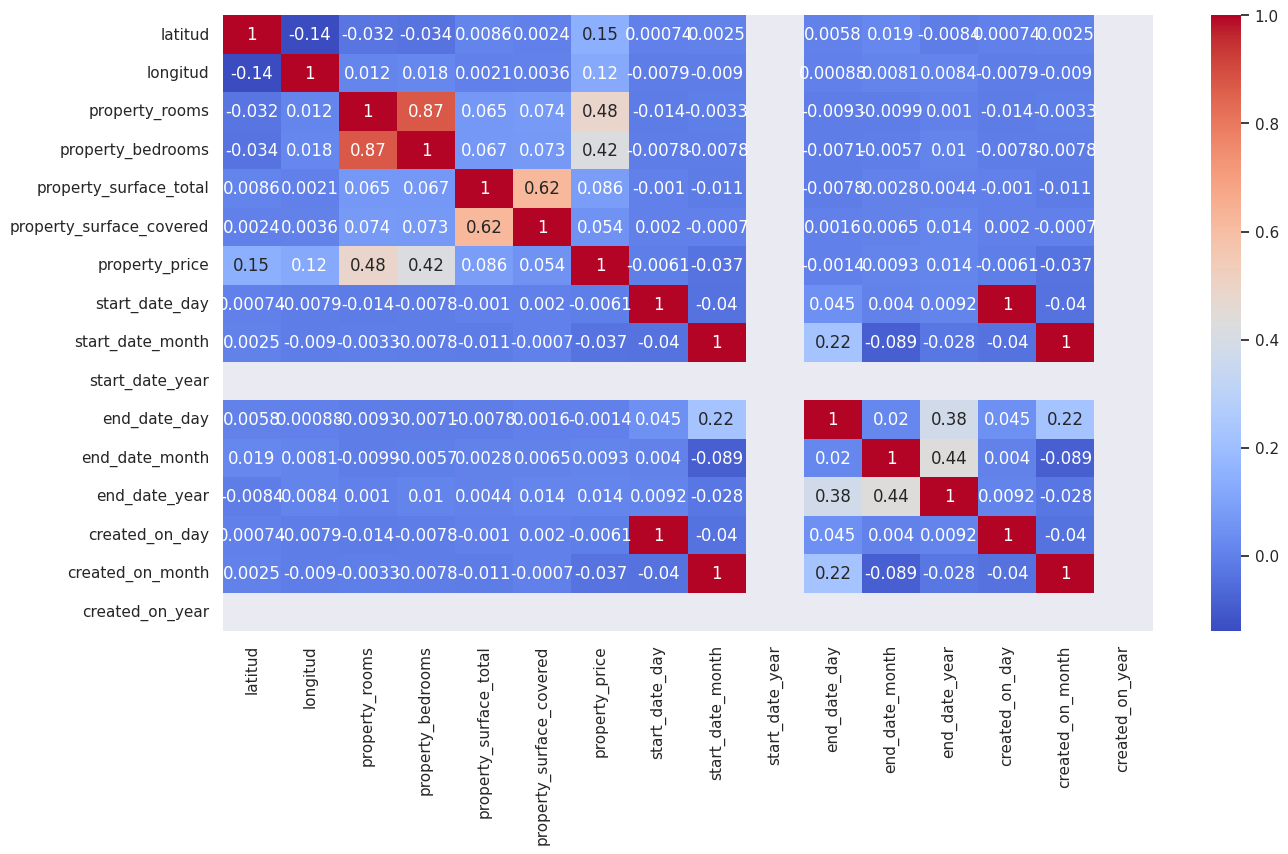

In [71]:
#Grafico la matriz de correlación en un Heatmap

plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Se puede observar que el Precio de las Viviendas tiene una correlacion positiva media con el numero de ambientes 

#### Lucia:

### Correlaciones en dataset completo

In [72]:
df_corr = df[['operation','property_type']].copy()
df_corr.head(5)

operation property_type
1     Venta  Departamento
2     Venta  Departamento
3     Venta  Departamento
4     Venta            PH
5     Venta            PH

+ Como son variables categoricas, aplico One Hot Encoding

In [73]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_type'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

operation_Venta  property_type_Casa  property_type_Departamento  \
94244                1                   0                           1   
94245                1                   0                           1   
94246                1                   0                           1   
94247                1                   0                           1   
94248                1                   0                           1   

       property_type_PH  
94244                 0  
94245                 0  
94246                 0  
94247                 0  
94248                 0

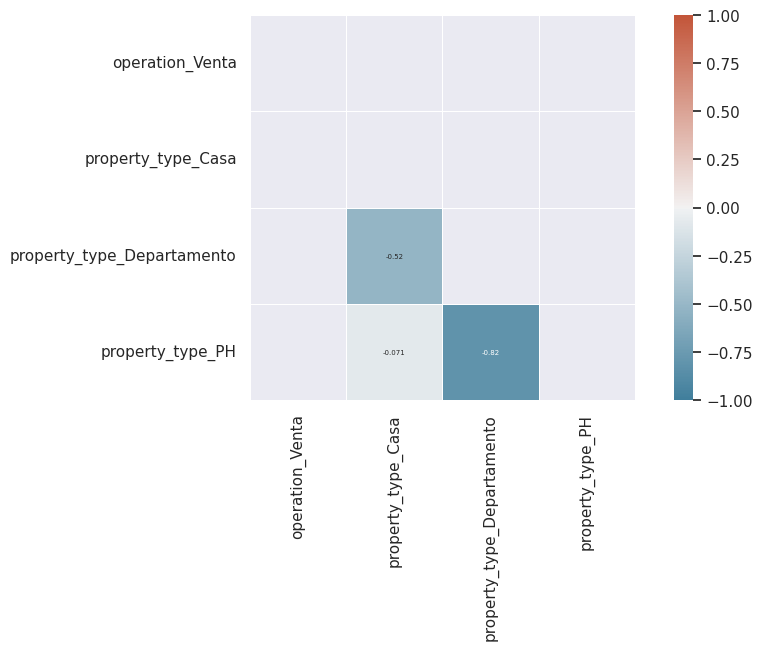

In [74]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

In [75]:
df_corr = df[['operation','property_currency']].copy()
df_corr.head(5)

operation property_currency
1     Venta               USD
2     Venta               USD
3     Venta               USD
4     Venta               USD
5     Venta               USD

In [76]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

operation_Venta  property_currency_USD
94244                1                      1
94245                1                      1
94246                1                      1
94247                1                      1
94248                1                      1

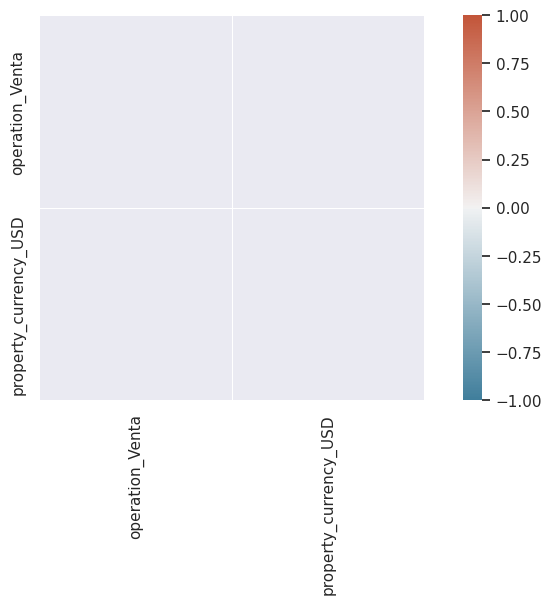

In [77]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":7.5})
plt.xticks(rotation=90)
plt.show()

Hay una alta correlacion entre:
+ operacion venta y moneda dolar
+ operacion alquiler y moneda pesos argentinos

In [78]:
df_corr = df[['property_type','property_currency']].copy()
df_corr.head(5)

property_type property_currency
1  Departamento               USD
2  Departamento               USD
3  Departamento               USD
4            PH               USD
5            PH               USD

In [79]:
df_dummies = pd.get_dummies(df_corr, columns=['property_type', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

property_type_Casa  property_type_Departamento  property_type_PH  \
94244                   0                           1                 0   
94245                   0                           1                 0   
94246                   0                           1                 0   
94247                   0                           1                 0   
94248                   0                           1                 0   

       property_currency_USD  
94244                      1  
94245                      1  
94246                      1  
94247                      1  
94248                      1

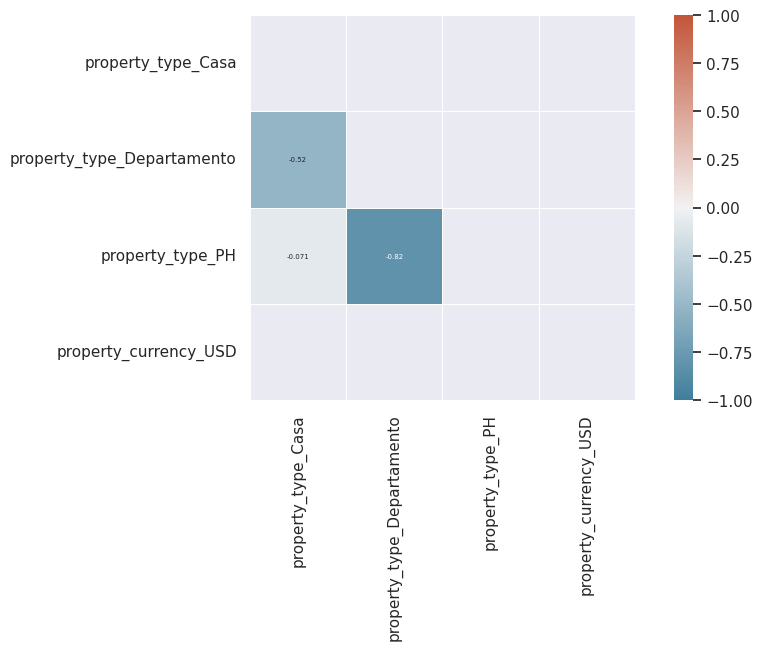

In [80]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

#### Santiago:

#### Heatmap correlaciones

<AxesSubplot:>

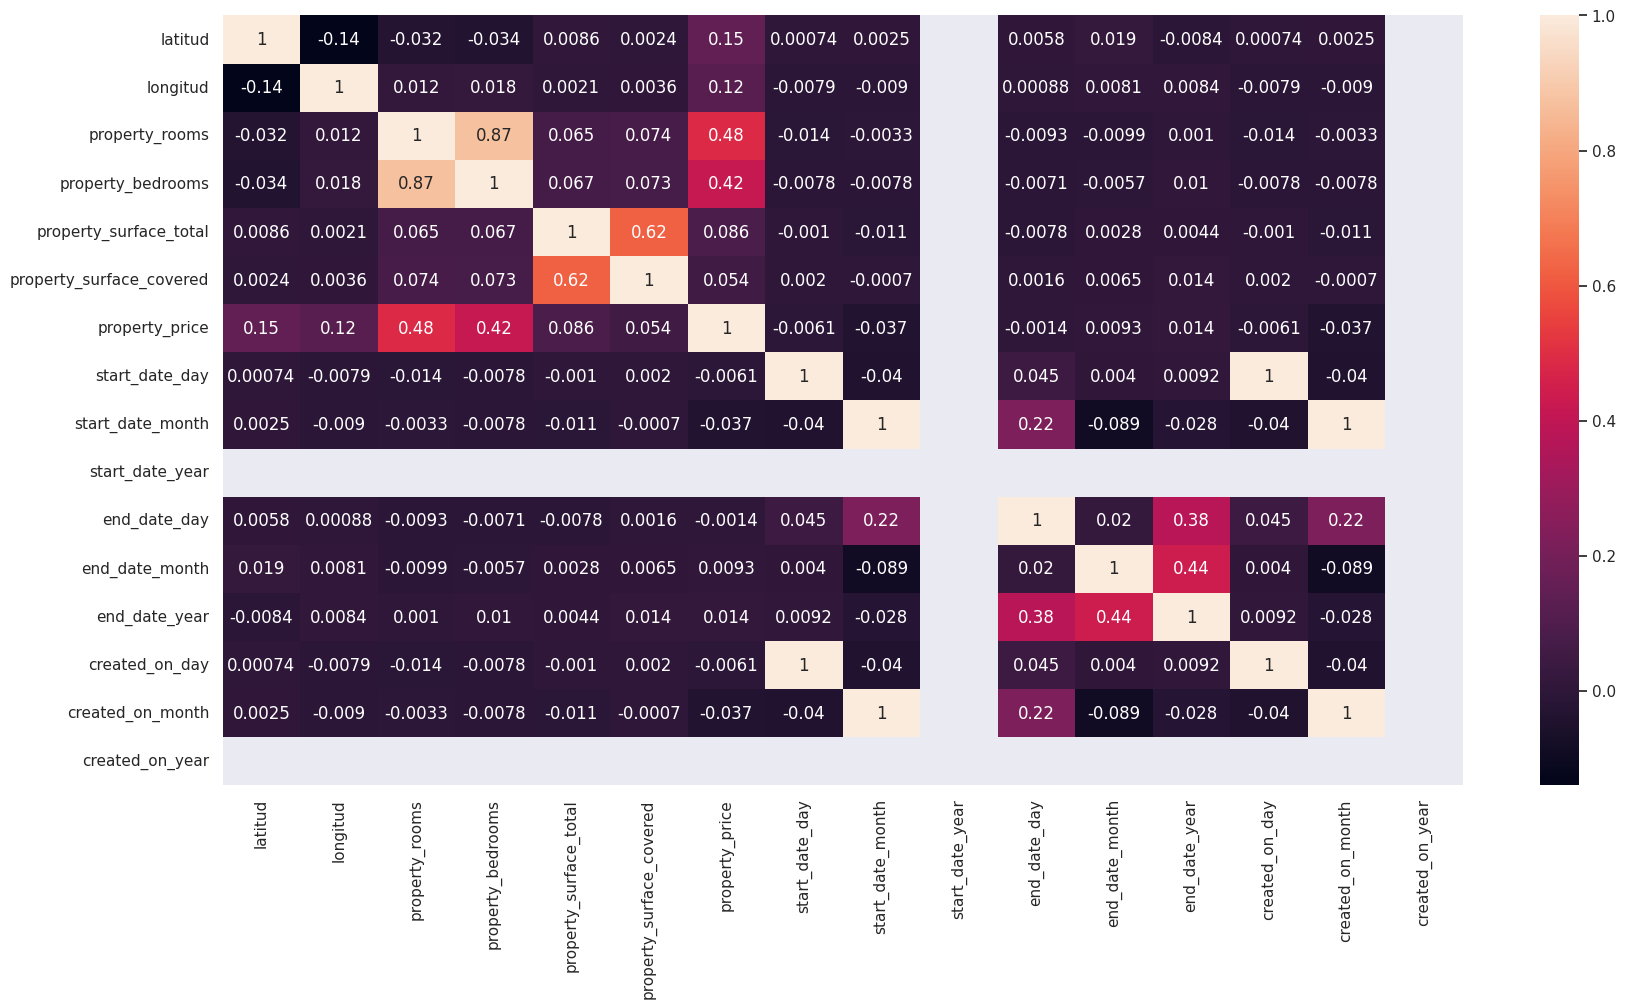

In [81]:
# Calculamos las correlaciones sin longitud y latitud
matrx_corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrx_corr, annot=True)

Se ve cierta correlacion entre precio y numero de ambientes/dormitorios. Asi como tambien entre superficie total y cubierta

#### Dispersograma property_rooms vrs property_price

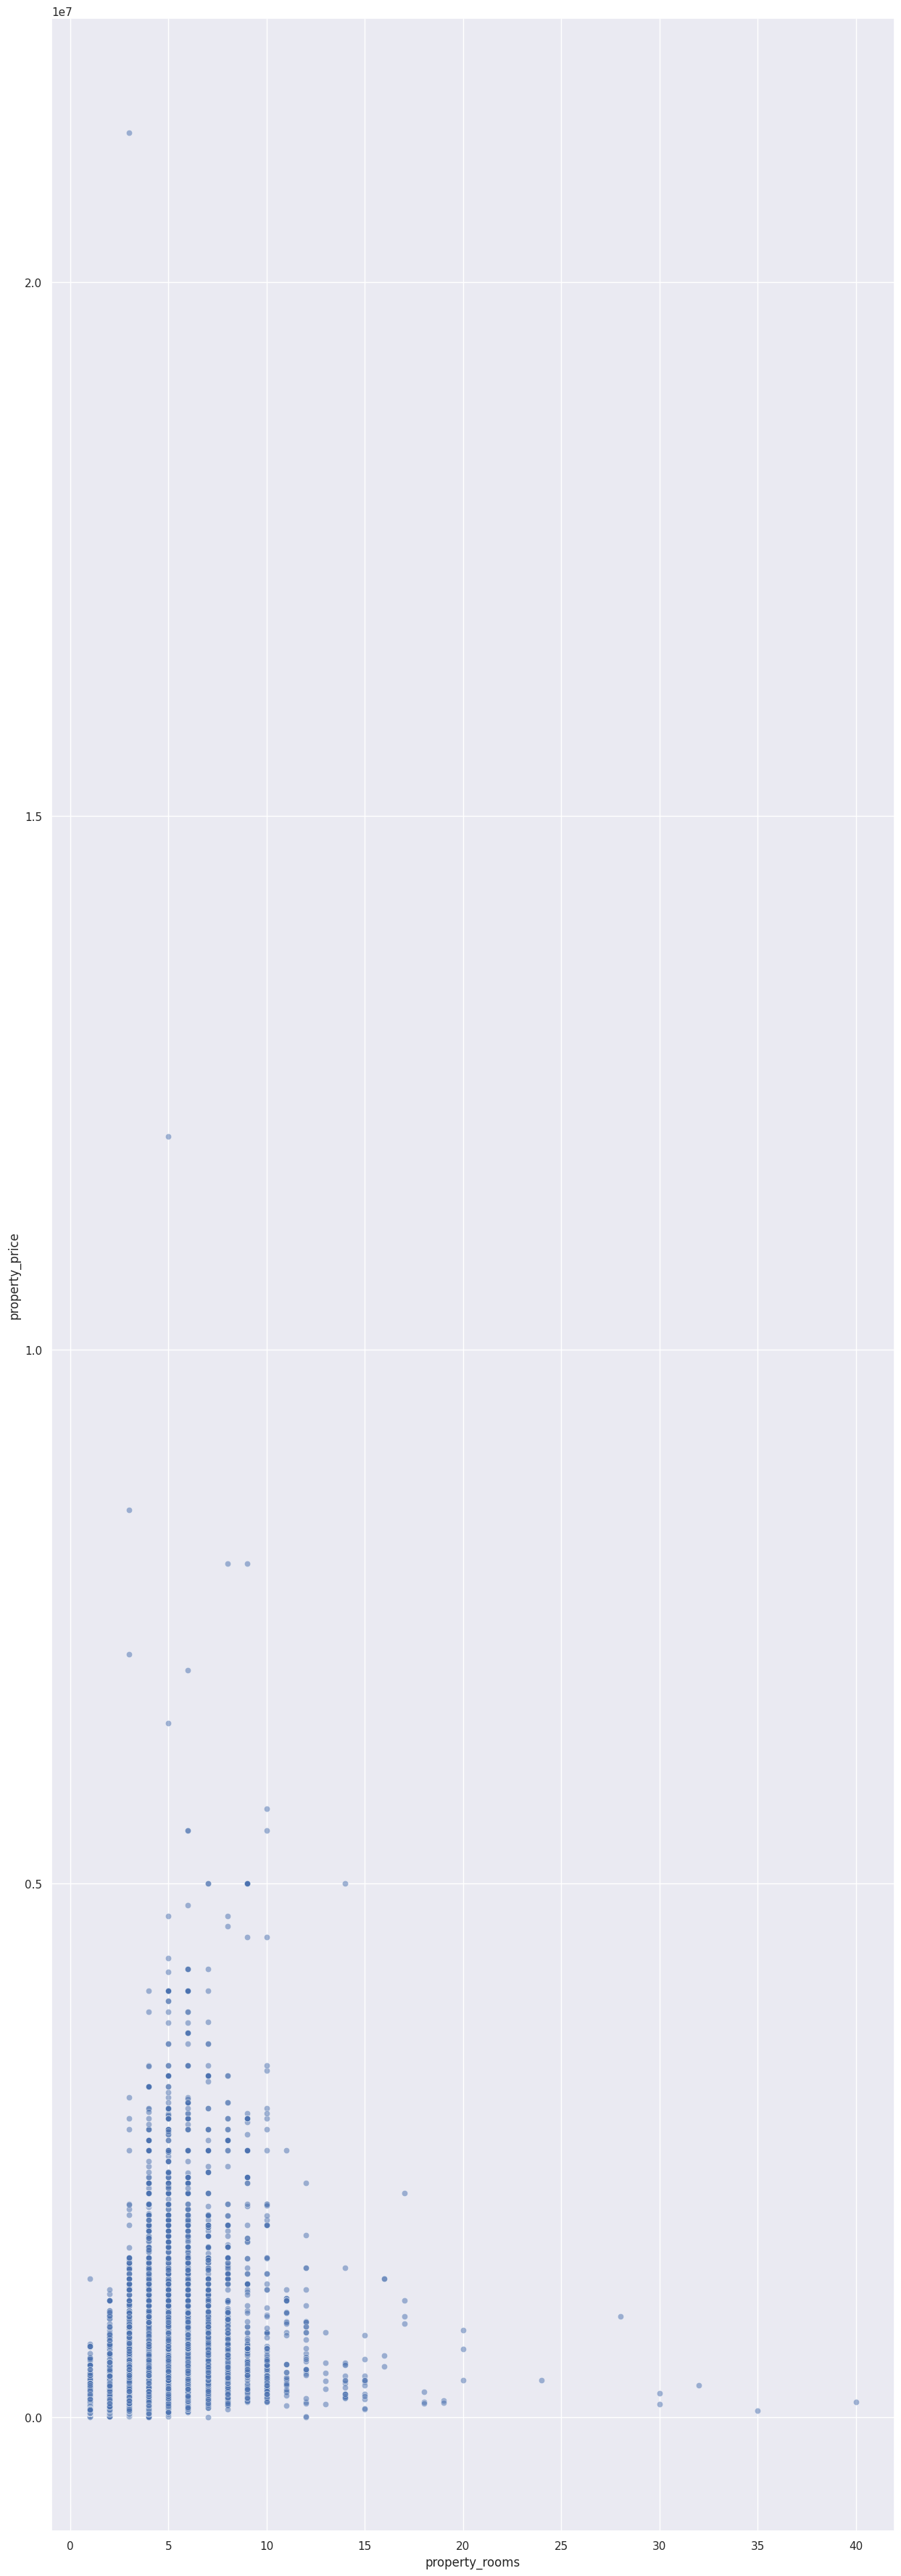

In [82]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_price", alpha=0.5)

#### Dispersograma property_bedroom vrs property_price

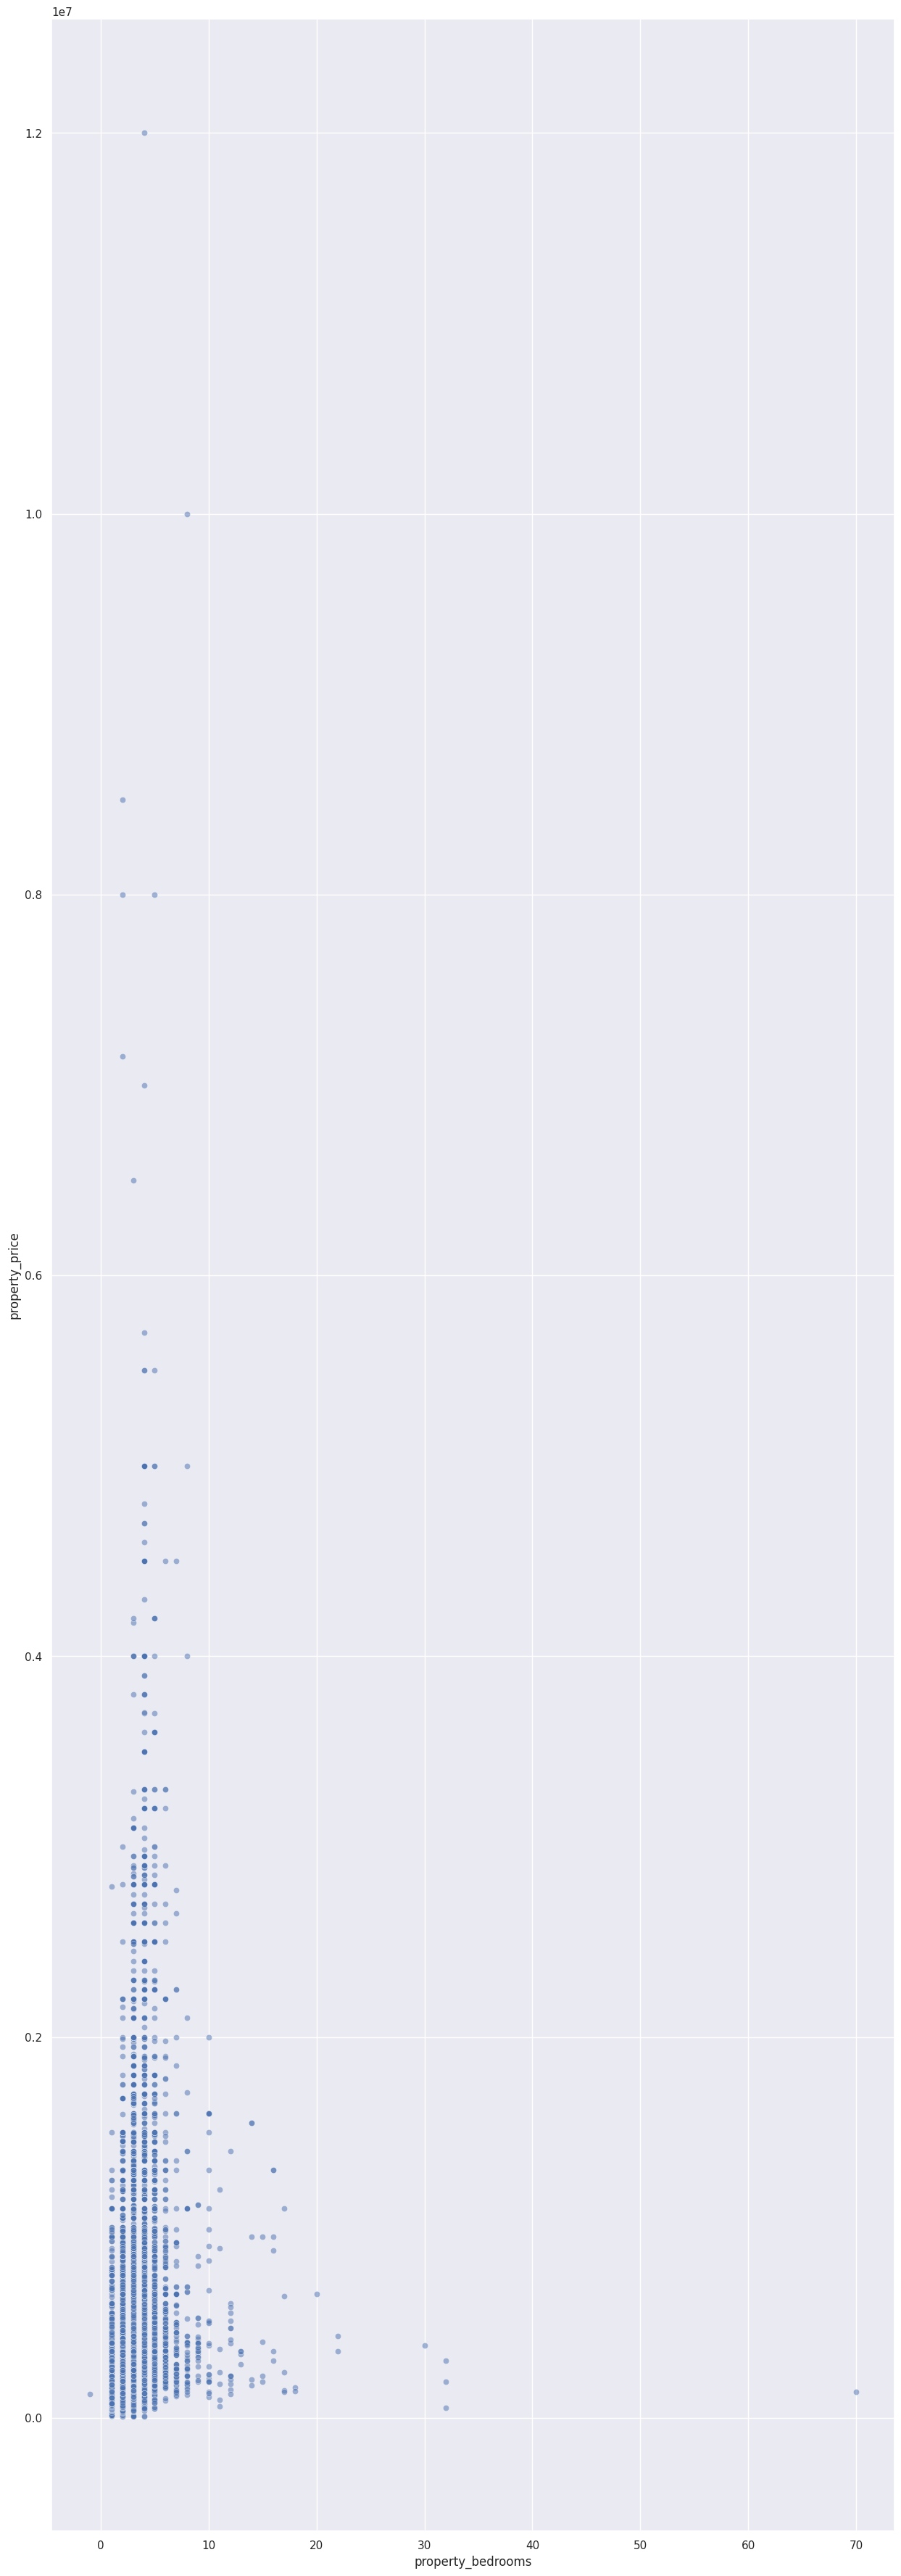

In [83]:
grf=sns.scatterplot(data=df, x="property_bedrooms", y="property_price", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_total

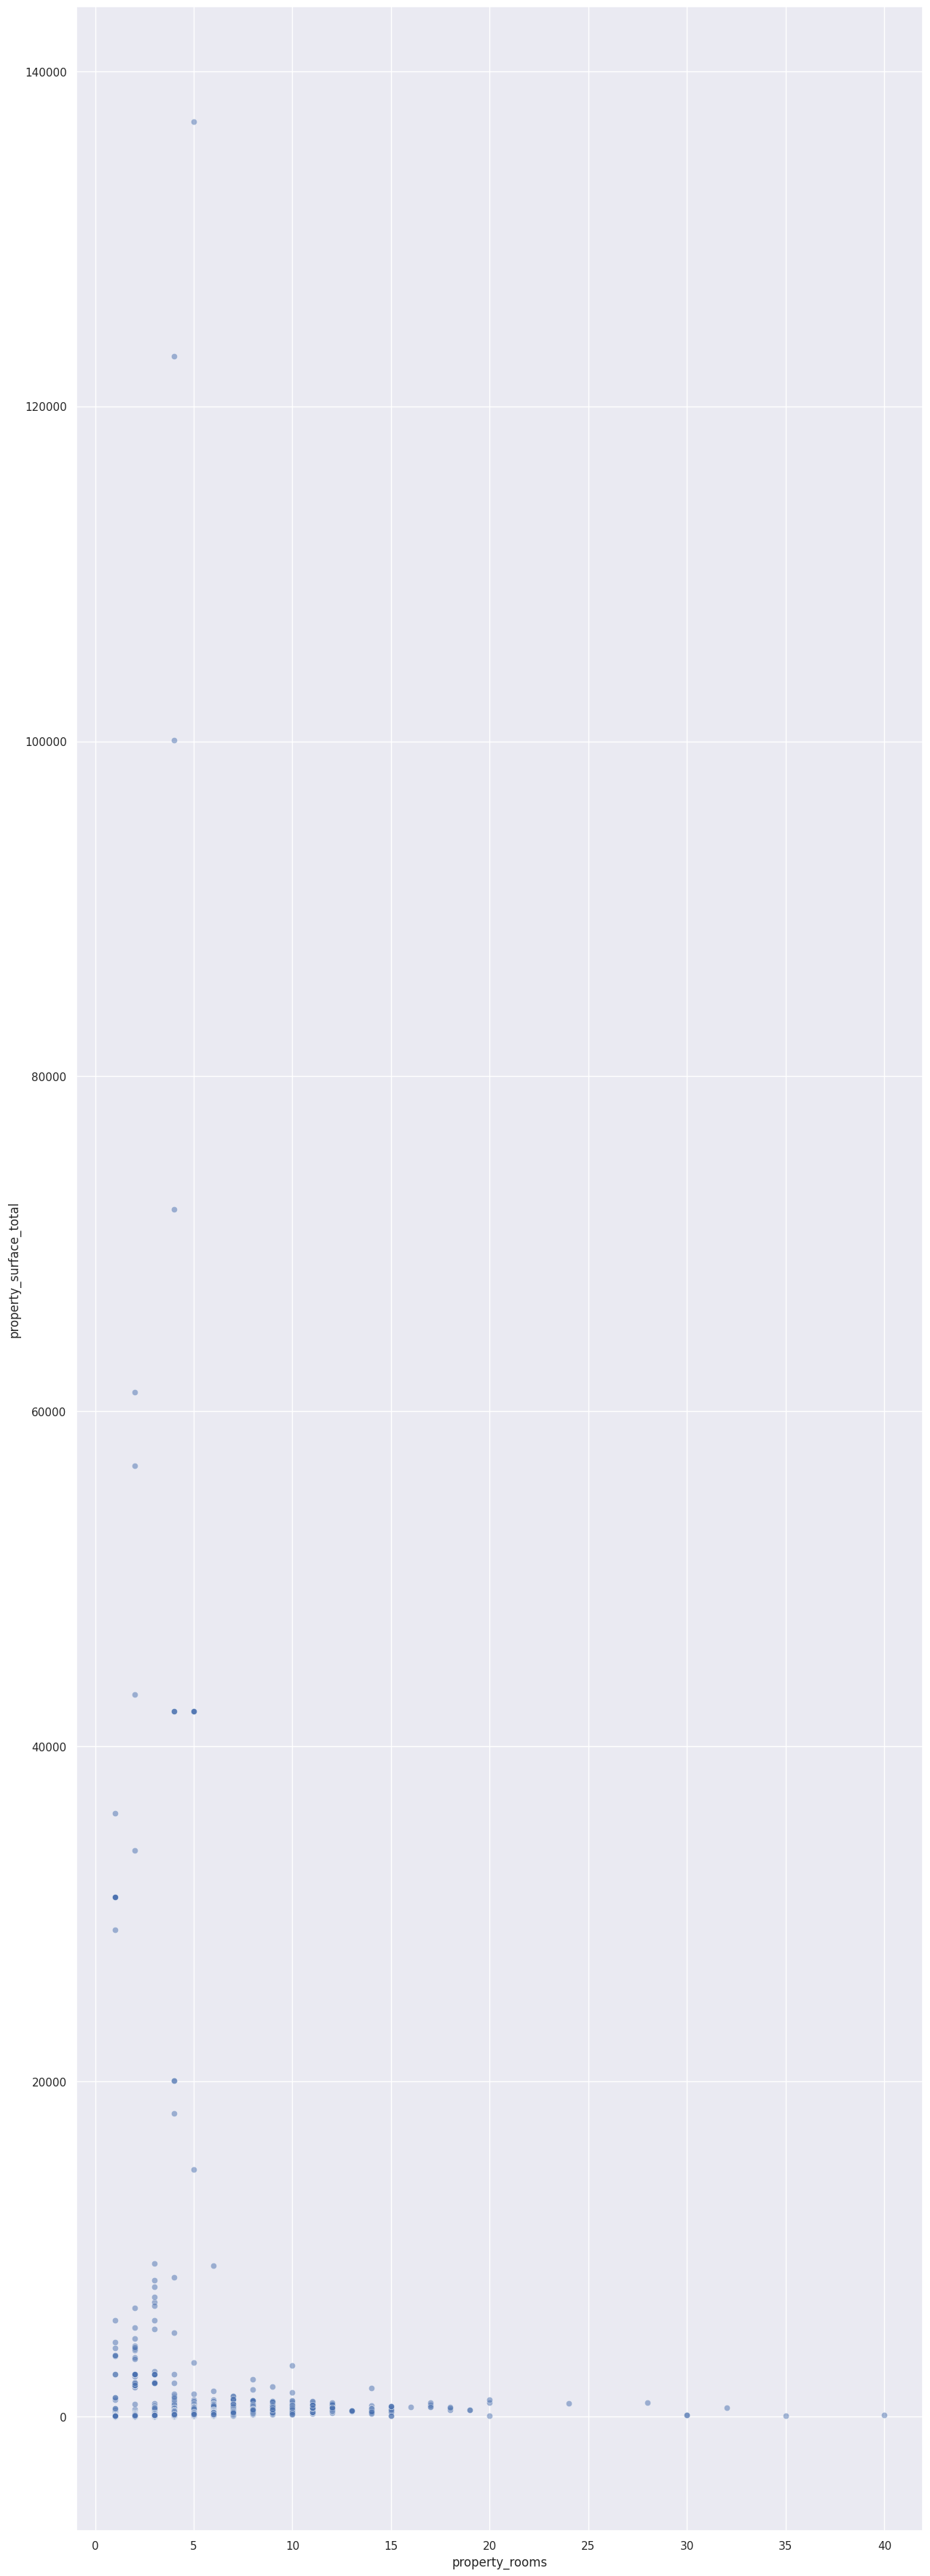

In [84]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_total", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_covered

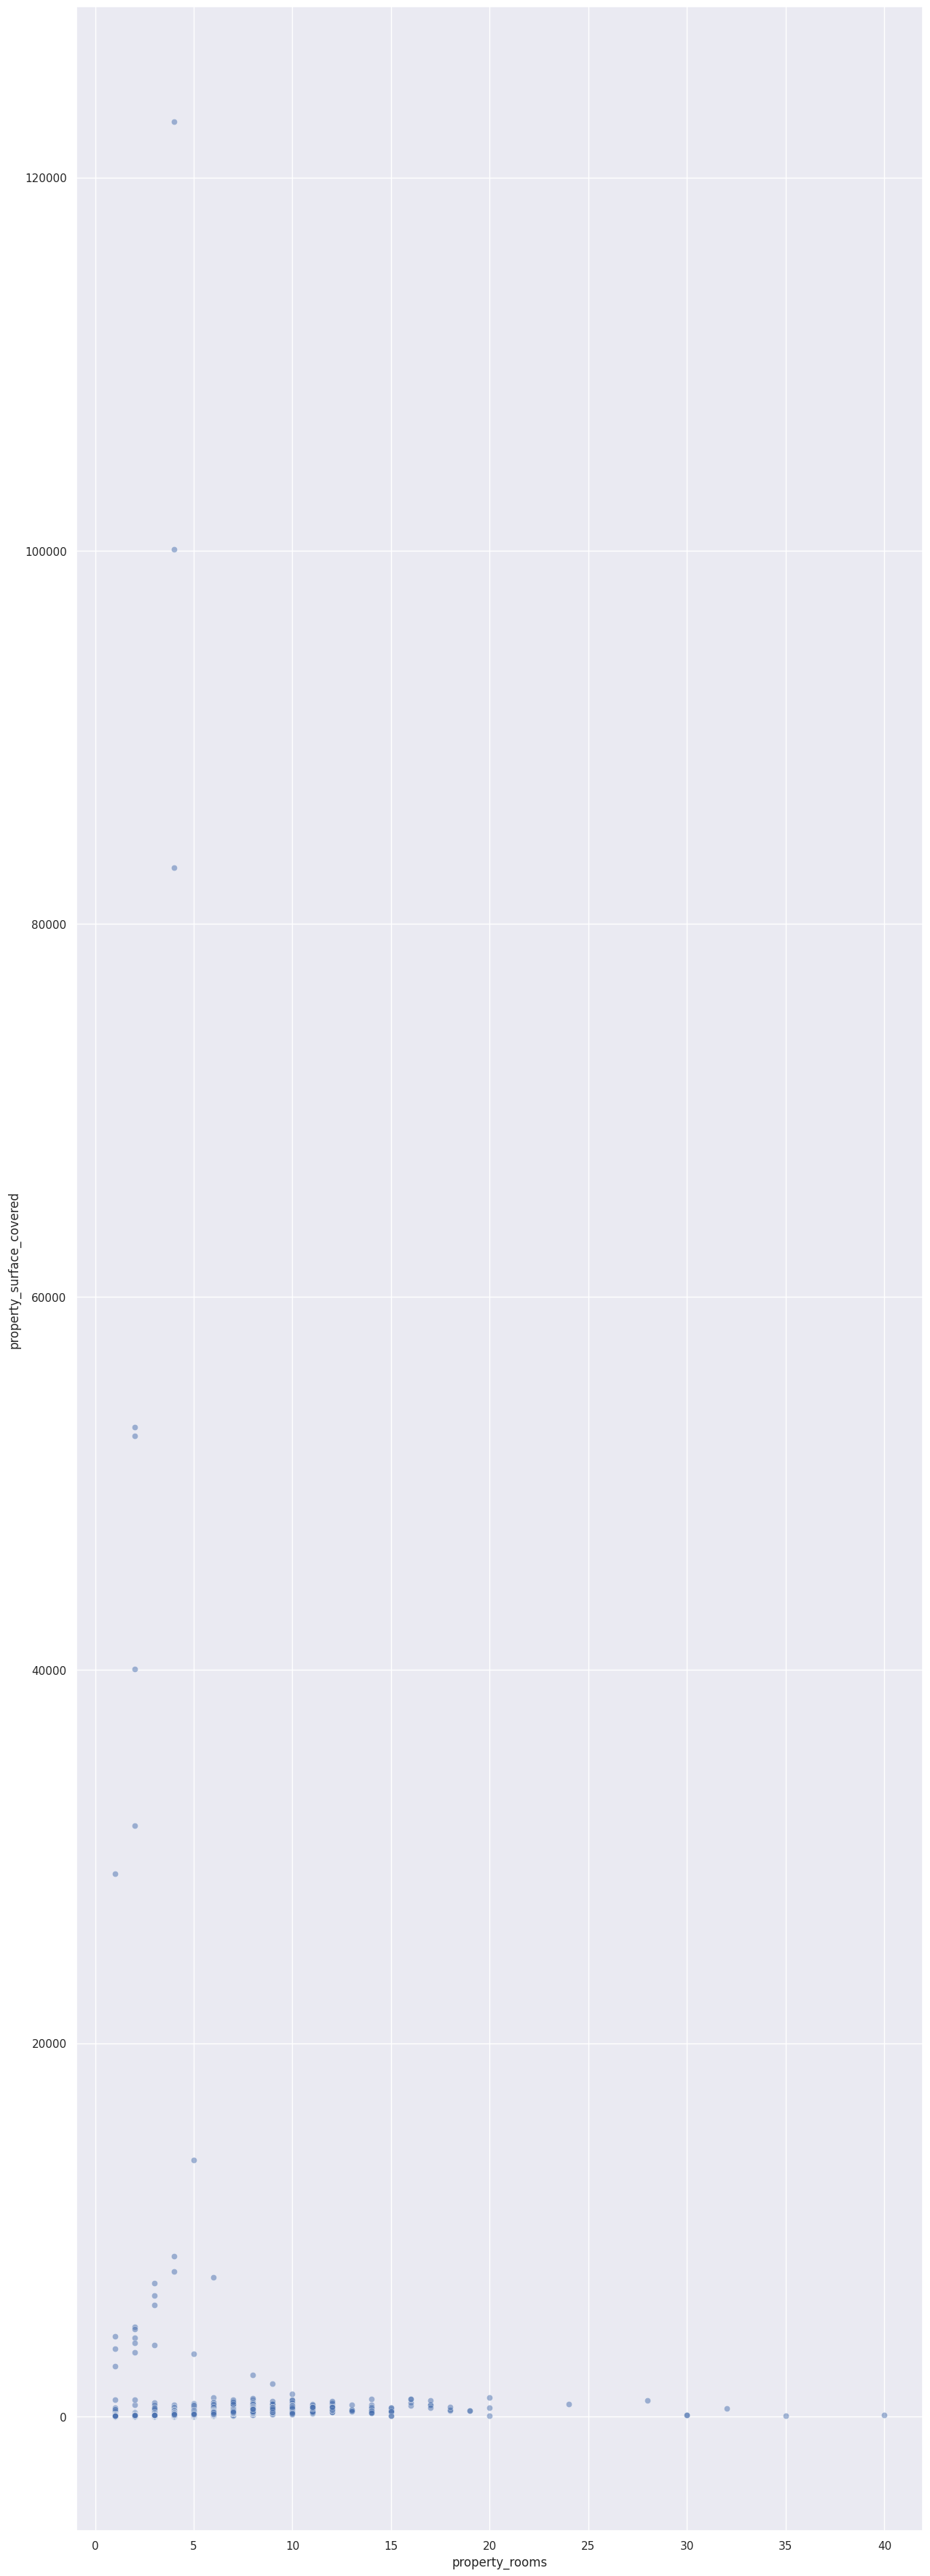

In [85]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_covered", alpha=0.5)

#### Dispersograma property_room vrs property_bedroom

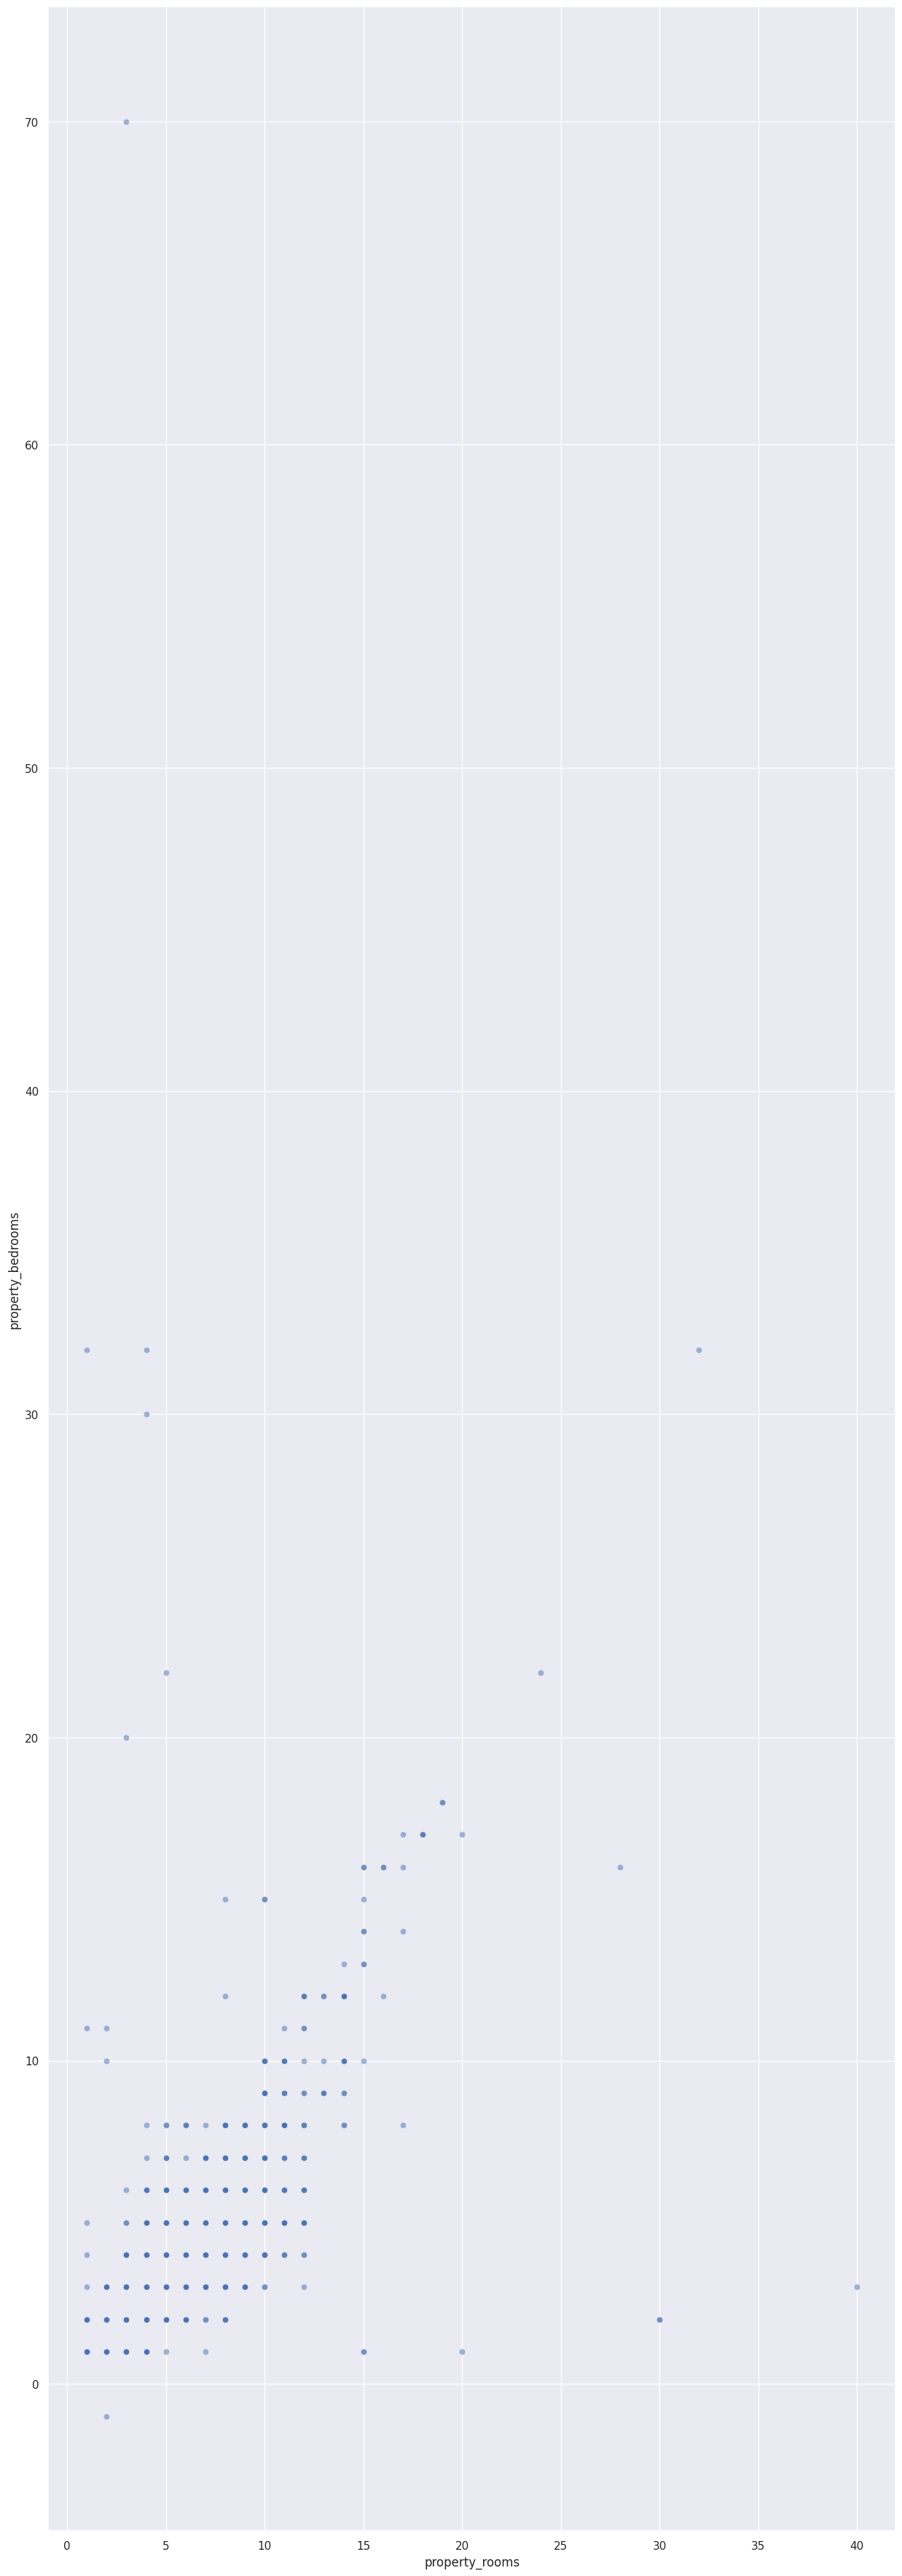

In [86]:
grf=sns.scatterplot(data=df, x="property_rooms", y="property_bedrooms", alpha=0.5)

#### Dispersograma property_surface_total vrs property_surface_covered

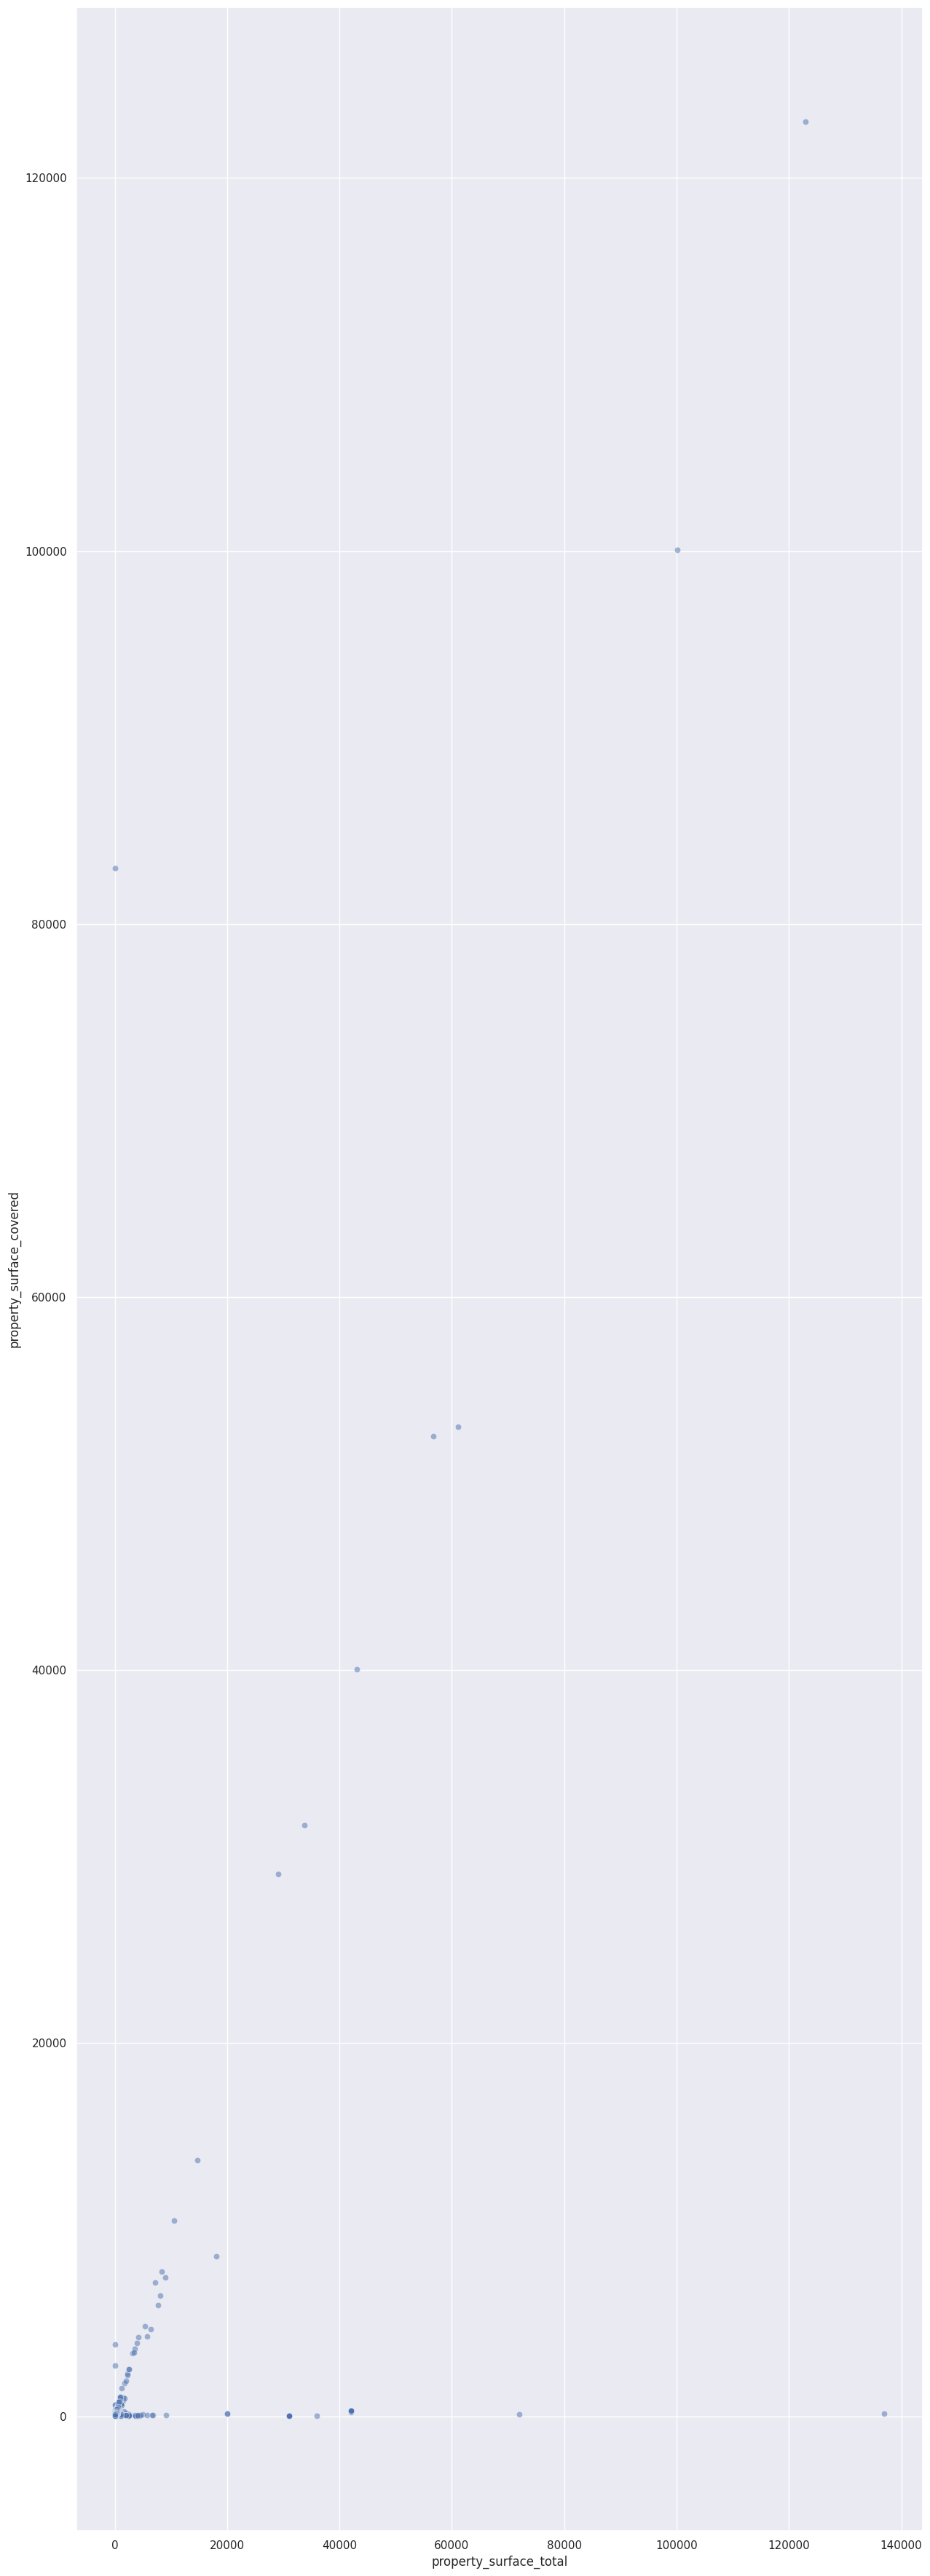

In [87]:
grf=sns.scatterplot(data=df, x="property_surface_total", y="property_surface_covered", alpha=0.5)

**c) Valores atípicos:** analizar la existencia de valores atípicos
* Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

#### Brayan:

Investigo los outliers de latitud

In [88]:
df[df['latitud'] < -34.655].place_l2.unique()

array(['Capital Federal'], dtype=object)

In [89]:
df.place_l2.unique()

array(['Capital Federal'], dtype=object)

In [90]:
df[df['place_l2']=='Salta']

Empty DataFrame
Columns: [start_date, end_date, created_on, latitud, longitud, place_l2, place_l3, place_l4, place_l5, operation, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_currency, property_title, start_date_day, start_date_month, start_date_year, end_date_day, end_date_month, end_date_year, created_on_day, created_on_month, created_on_year]
Index: []

Es muy raro que Salta, Cordoba esten

Con respecto al valor 9999 de end_date_year, me imagino que es una propiedad que no esta vendida todavia
asi que pasare su valor a 2023

In [91]:
df.end_date_year.replace({9999:2023}, inplace=True)

In [92]:
df.end_date_year.unique()

array([2021, 2022, 2023])

Mi decision final con respecto a los features latitud, longitud y fechas seria quedarme con los features: latitud, longitud, end_date_year, start_date_month, end_date_month, created_on_month, porque los demas features me parecen irrelevantes como los dias y tambien start_date_year,  created_on_que solo tienen un valor asi que no aportan mucho.

#### Analia:

Outliers de precio

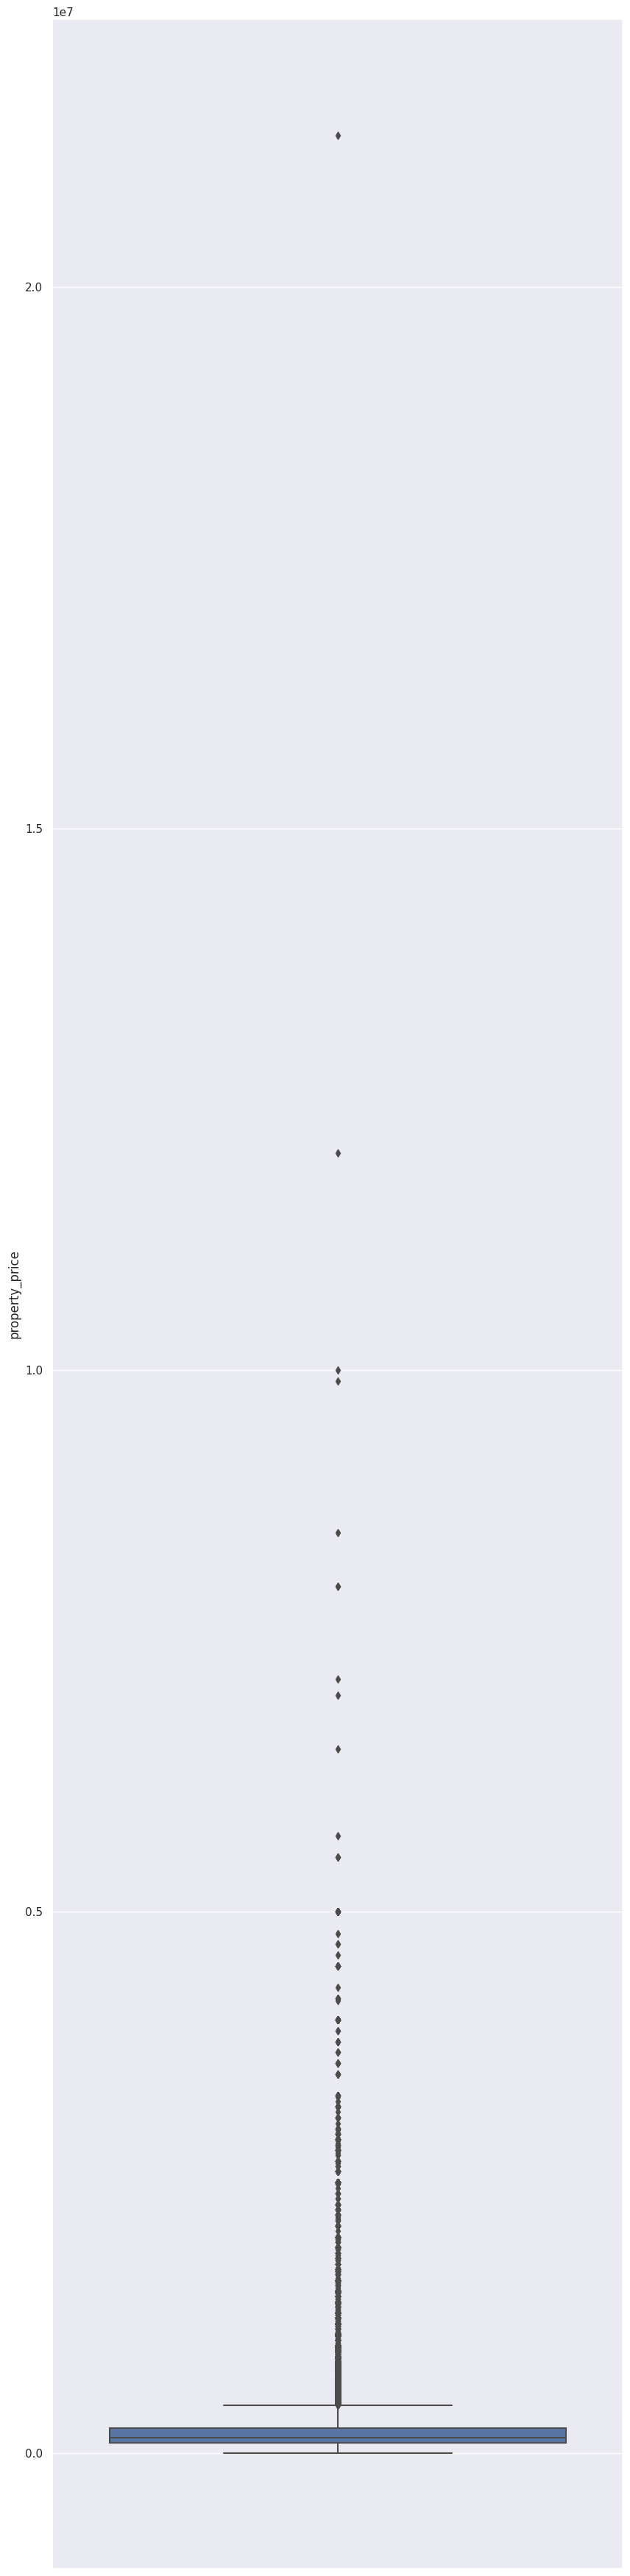

In [94]:
sns.set(rc={"figure.figsize":(10, 45)})
sns.boxplot(y=df.property_price)
plt.show()

Verificacion de valores atipicos

In [95]:
#Outliers
outlier=df[df['property_price']>2500000]
outlier

start_date    end_date  created_on    latitud   longitud  \
48     2021-09-09  2021-09-10  2021-09-09 -34.576741 -58.404830   
49     2021-09-09  2021-09-09  2021-09-09 -34.576741 -58.404830   
201    2021-09-09  2022-01-27  2021-09-09 -34.605781 -58.376705   
883    2021-09-20  2021-10-23  2021-09-20 -34.577484 -58.405751   
897    2021-09-20  2021-10-24  2021-09-20 -34.567172 -58.430634   
...           ...         ...         ...        ...        ...   
90116  2021-05-07  2021-06-05  2021-05-07 -34.590932 -58.384223   
90704  2021-05-20  2021-05-20  2021-05-20 -34.608246 -58.363794   
90926  2021-05-22  2021-06-05  2021-05-22 -34.590923 -58.384214   
93671  2021-05-08  2021-06-05  2021-05-08 -34.581524 -58.403588   
94104  2021-01-05  2022-06-12  2021-01-05 -34.590653 -58.384325   

              place_l2       place_l3       place_l4 place_l5 operation  \
48     Capital Federal        Palermo  Palermo Chico      NaN     Venta   
49     Capital Federal        Palermo  Palermo Chico      NaN     Venta   
201    Capital Federal    San Nicolás            NaN      NaN     Venta   
883    Capital Federal        Palermo  Palermo Chico      NaN     Venta   
897    Capital Federal        Palermo            NaN      NaN     Venta   
...                ...            ...            ...      ...       ...   
90116  Capital Federal       Recoleta            NaN      NaN     Venta   
90704  Capital Federal  Puerto Madero            NaN      NaN     Venta   
90926  Capital Federal       Recoleta            NaN      NaN     Venta   
93671  Capital Federal        Palermo            NaN      NaN     Venta   
94104  Capital Federal       Recoleta            NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
48     Departamento             NaN                4.0   
49     Departamento             NaN                4.0   
201    Departamento             NaN                NaN   
883    Departamento             5.0                3.0   
897    Departamento             5.0                4.0   
...             ...             ...                ...   
90116  Departamento             4.0                3.0   
90704  Departamento             7.0                4.0   
90926  Departamento             9.0                5.0   
93671  Departamento            10.0                6.0   
94104  Departamento             8.0                5.0   

       property_surface_total  property_surface_covered  property_price  \
48                      400.0                       NaN       2700000.0   
49                      400.0                       NaN       2700000.0   
201                   10500.0                   10500.0       9900000.0   
883                     535.0                     220.0       2800000.0   
897                     390.0                     390.0       2900000.0   
...                       ...                       ...             ...   
90116                   230.0                     230.0       2600000.0   
90704                   540.0                     360.0       3200000.0   
90926                   430.0                     430.0       2800000.0   
93671                   520.0                     500.0       3300000.0   
94104                   431.0                     415.0       2800000.0   

      property_currency                                     property_title  \
48                  USD                       Departamento - Palermo Chico   
49                  USD                       Departamento - Palermo Chico   
201                 USD  EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...   
883                 USD  VENTA con RENTA hasta Feb 2020  TORRES DE GELL...   
897                 USD  VENTA Torre MARIO R. ALVAREZ piso de máxima ca...   
...                 ...                                                ...   
90116               USD  Importante edificio Francés Racionalista sobre...   
90704               USD  PENTHOUSE  2 PISCINAS PRIVADAS EN PUERTO MADER...   
9

In [96]:
print(df['property_price'].describe())

count    9.027200e+04
mean     2.231859e+05
std      3.132701e+05
min      5.000000e+03
25%      9.500000e+04
50%      1.420000e+05
75%      2.350000e+05
max      2.140000e+07
Name: property_price, dtype: float64


Outliers viviendas segun precios

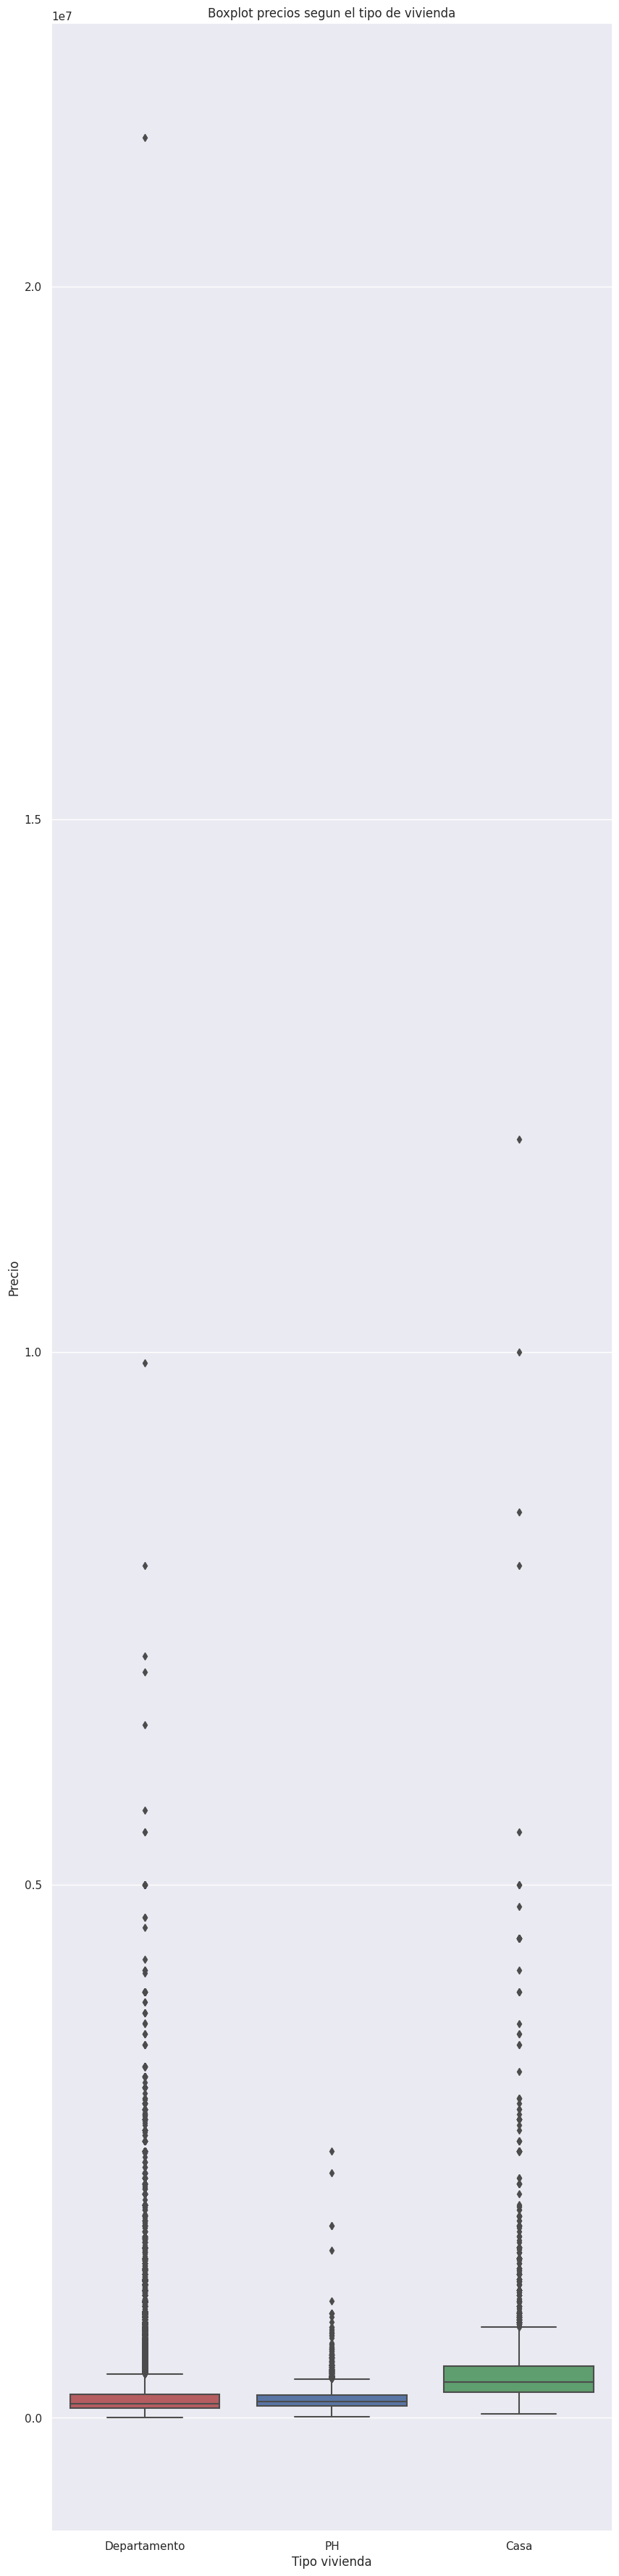

In [97]:
#Viviendas segun precios
sns.set(rc={"figure.figsize":(10, 45)})
sns_boxplot_fare_pclass=sns.boxplot(x="property_type",y="property_price", data=df, palette=["r","b", "g"]).set(title="Boxplot precios segun el tipo de vivienda",xlabel='Tipo vivienda',ylabel='Precio')

#### Lucia:

### Precio de venta

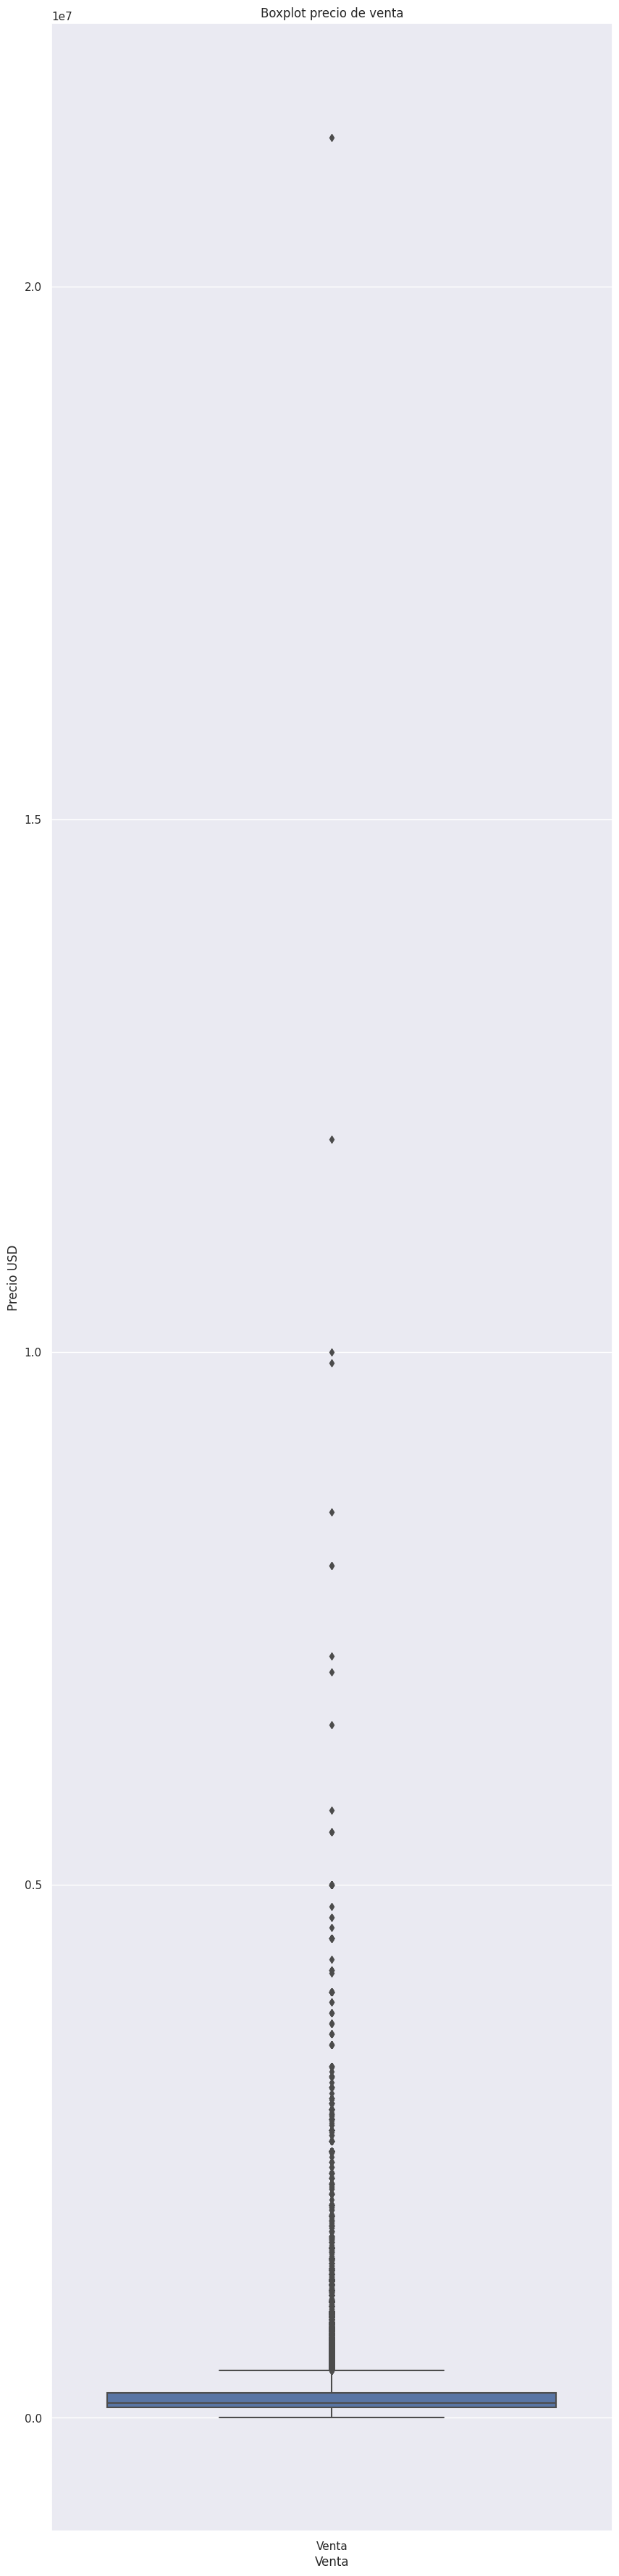

In [99]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df).set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD')

+ Outlier

In [100]:
df[df['property_price']>20000000]

start_date    end_date  created_on    latitud   longitud  \
12409  2021-01-25  2022-05-13  2021-01-25 -34.616044 -58.458621   

              place_l2   place_l3 place_l4 place_l5 operation property_type  \
12409  Capital Federal  Caballito      NaN      NaN     Venta  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
12409             3.0                NaN                    68.0   

       property_surface_covered  property_price property_currency  \
12409                      64.0      21400000.0               USD   

           property_title  start_date_day  start_date_month  start_date_year  \
12409  Departamento venta              25                 1             2021   

       end_date_day  end_date_month  end_date_year  created_on_day  \
12409            13               5           2022              25   

       created_on_month  created_on_year  
12409                 1             2021

+ Es el mismo outlier de antes, es la venta de un departamento

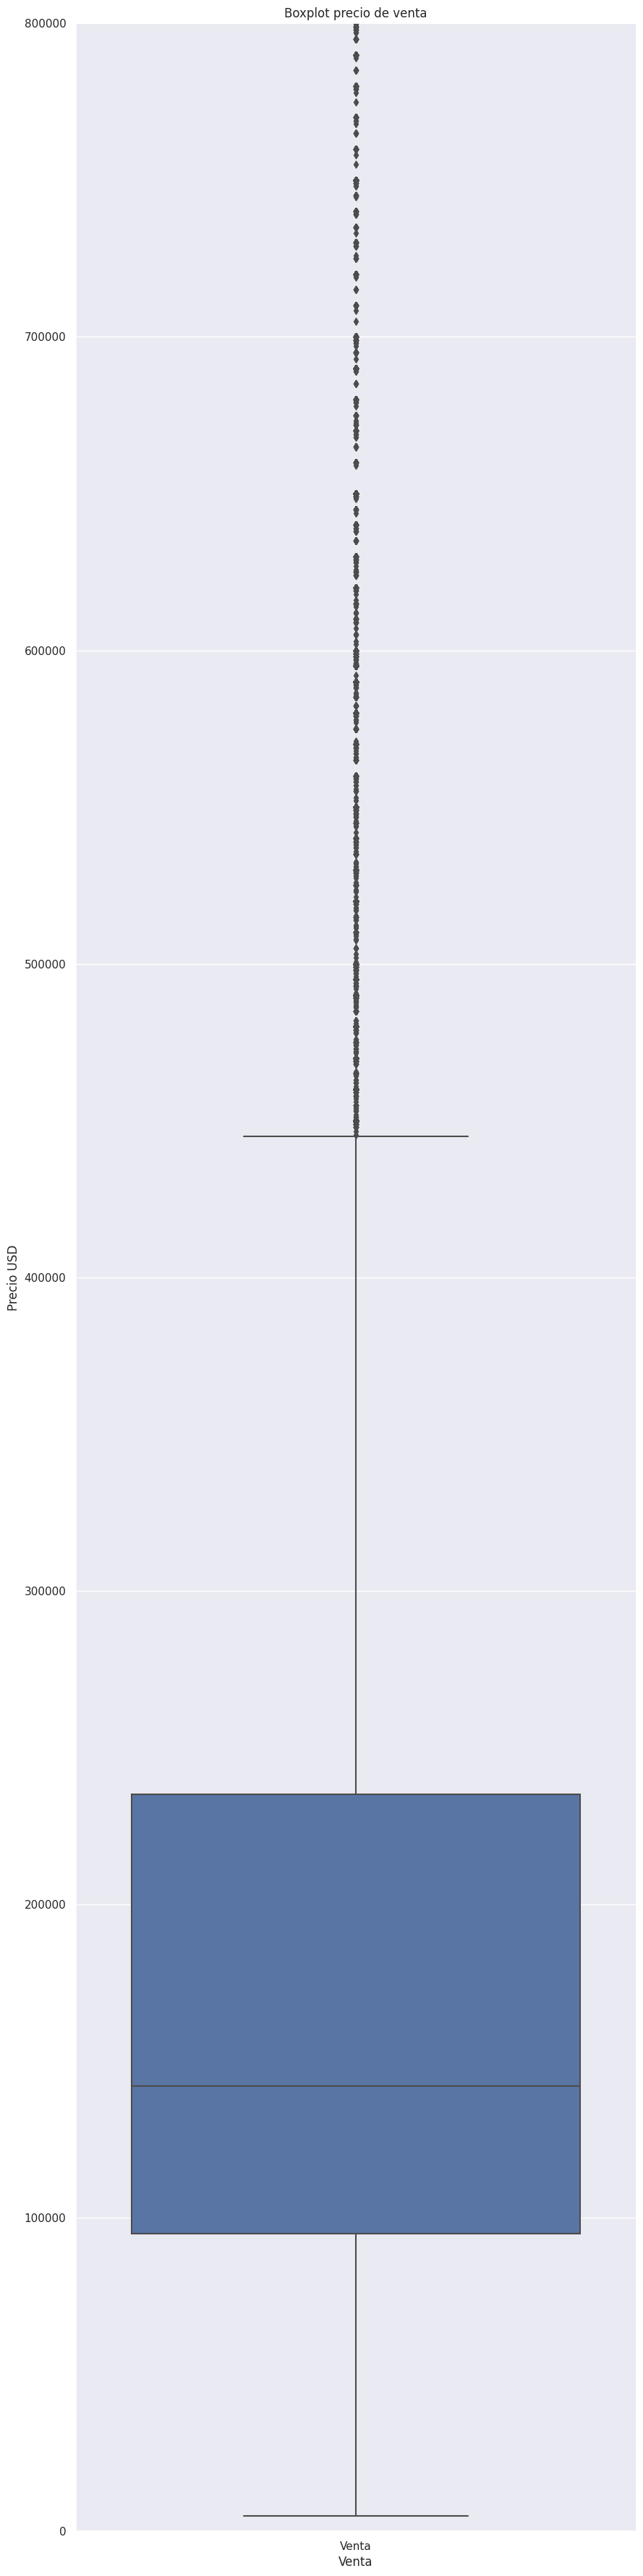

In [101]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD', ylim=(0, 800000))

### Precio segun el tipo de propiedad

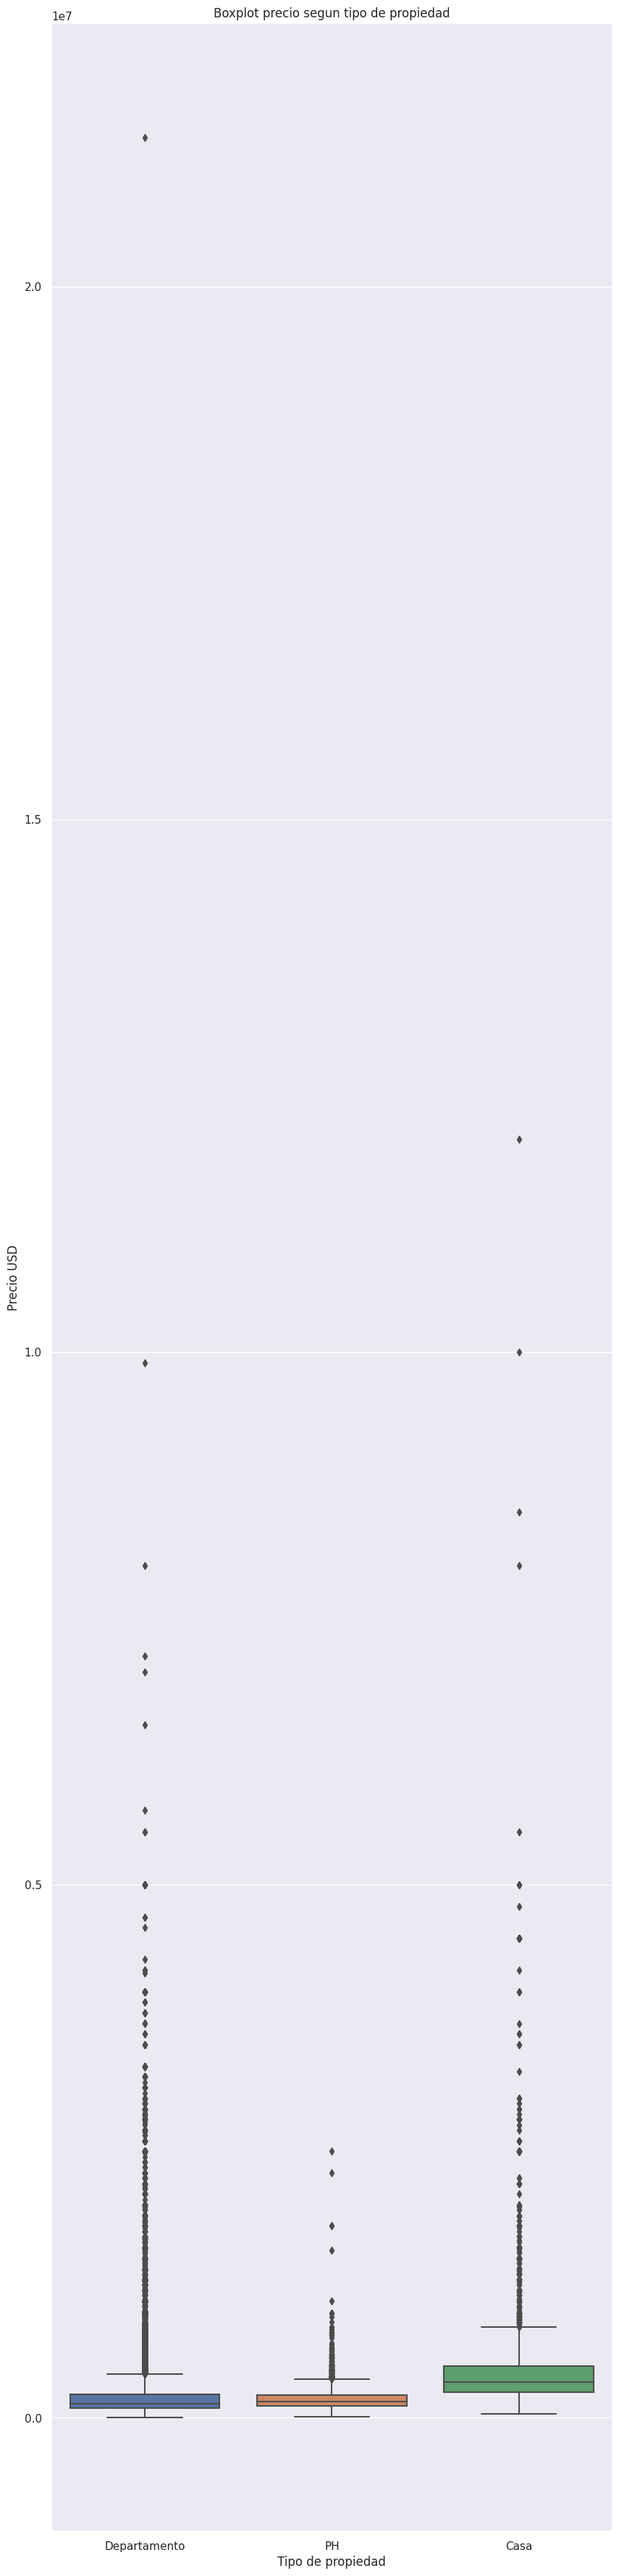

In [102]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df).set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD')

+ Hay un outlier muy lejano en departamento

In [103]:
df_depto = df[df['property_type']=='Departamento']
df_depto[df_depto['property_price']>20000000]

start_date    end_date  created_on    latitud   longitud  \
12409  2021-01-25  2022-05-13  2021-01-25 -34.616044 -58.458621   

              place_l2   place_l3 place_l4 place_l5 operation property_type  \
12409  Capital Federal  Caballito      NaN      NaN     Venta  Departamento   

       property_rooms  property_bedrooms  property_surface_total  \
12409             3.0                NaN                    68.0   

       property_surface_covered  property_price property_currency  \
12409                      64.0      21400000.0               USD   

           property_title  start_date_day  start_date_month  start_date_year  \
12409  Departamento venta              25                 1             2021   

       end_date_day  end_date_month  end_date_year  created_on_day  \
12409            13               5           2022              25   

       created_on_month  created_on_year  
12409                 1             2021

+ Hay 4 outliers mas alejados en casa

In [104]:
df_casa = df[df['property_type']=='Casa']
df_casa[df_casa['property_price']>6000000]

start_date    end_date  created_on    latitud   longitud  \
17850  2021-03-26  2021-06-05  2021-03-26 -34.572494 -58.462433   
30963  2021-05-12  2021-05-14  2021-05-12 -34.565947 -58.442326   
32470  2021-02-17  2021-02-19  2021-02-17 -34.608300 -58.371200   
67630  2021-09-17  2022-03-09  2021-09-17 -34.593634 -58.377164   

              place_l2   place_l3 place_l4 place_l5 operation property_type  \
17850  Capital Federal   Belgrano      NaN      NaN     Venta          Casa   
30963  Capital Federal   Belgrano      NaN      NaN     Venta          Casa   
32470  Capital Federal  Monserrat      NaN      NaN     Venta          Casa   
67630  Capital Federal     Retiro      NaN      NaN     Venta          Casa   

       property_rooms  property_bedrooms  property_surface_total  \
17850             5.0                4.0                  3197.0   
30963             9.0                5.0                  1763.0   
32470             3.0                2.0                   225.0   
67630             NaN                8.0                  1166.0   

       property_surface_covered  property_price property_currency  \
17850                    3367.0      12000000.0               USD   
30963                    1763.0       8000000.0               USD   
32470                      93.0       8500000.0               USD   
67630                    1485.0      10000000.0               USD   

                                          property_title  start_date_day  \
17850                                  Casa - Belgrano R              26   
30963  Casa  Estilo Frances en Venta y/o Alquiler | V...              12   
32470  Oportunidad al Costo! Venta Preciosa Casa a Es...              17   
67630  Basavilbaso y Arenales Espectacular casa. Embl...              17   

       start_date_month  start_date_year  end_date_day  end_date_month  \
17850                 3             2021             5               6   
30963                 5             2021            14               5   
32470                 2             2021            19               2   
67630                 9             2021             9               3   

       end_date_year  created_on_day  created_on_month  created_on_year  
17850           2021              26                 3             2021  
30963           2021              12                 5             2021  
32470           2021              17                 2             2021  
67630           2022              17                 9             2021

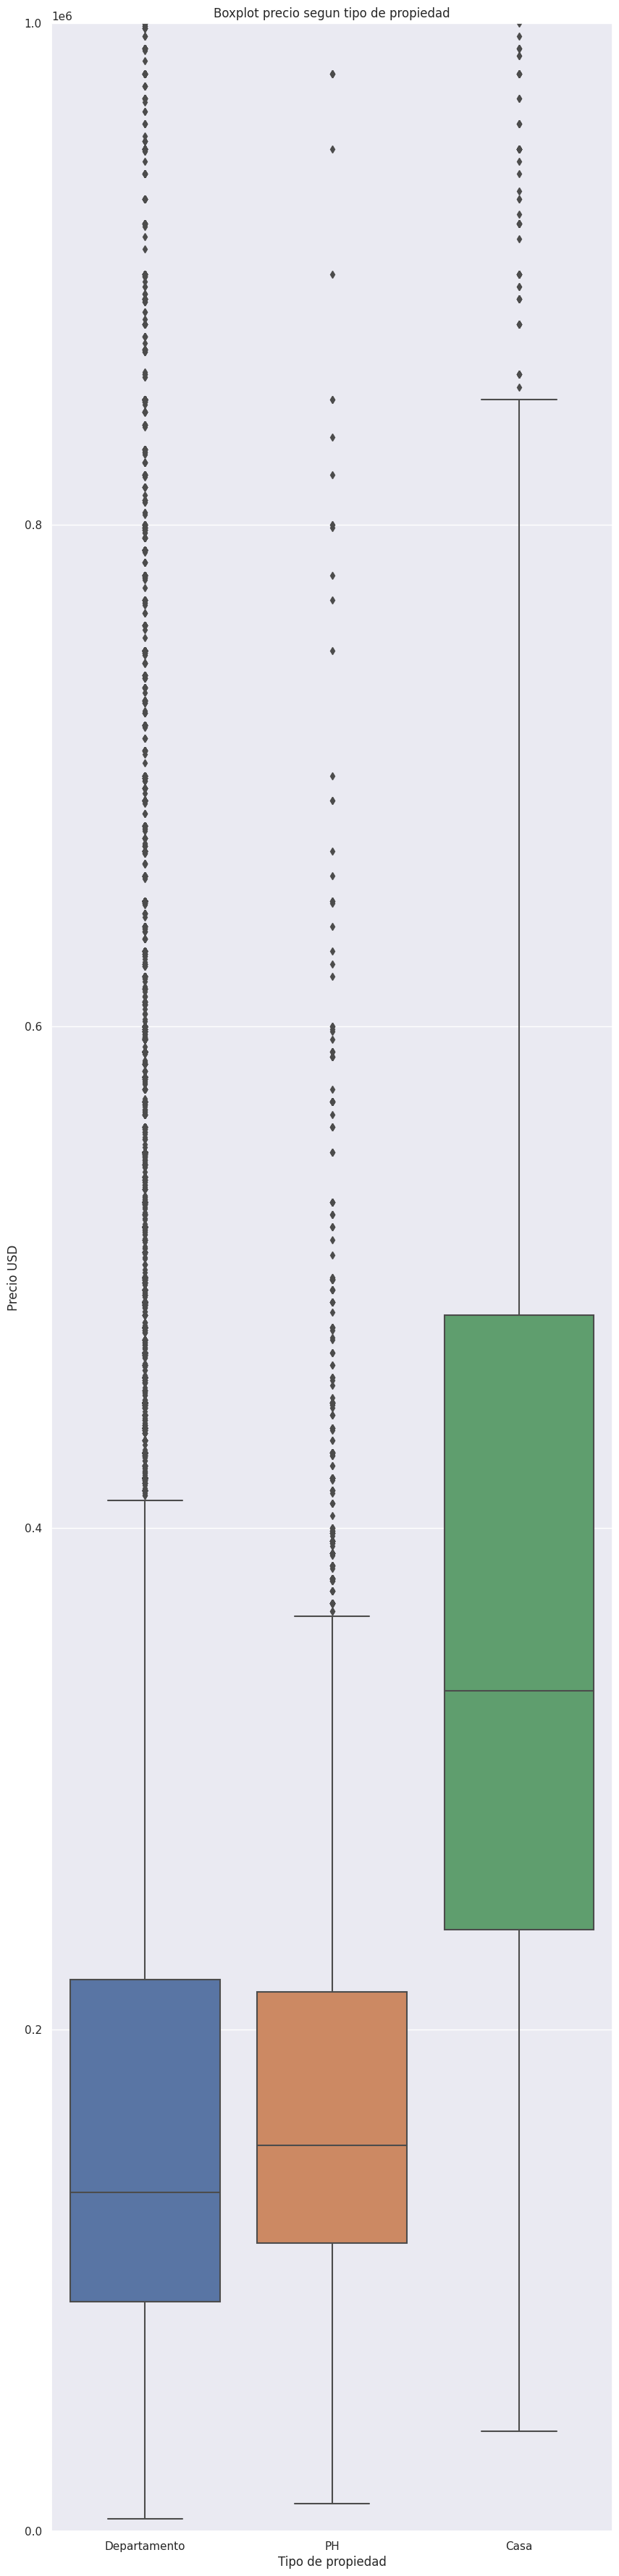

In [105]:
plt.figure(dpi=100)
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD', ylim=(0, 1000000))

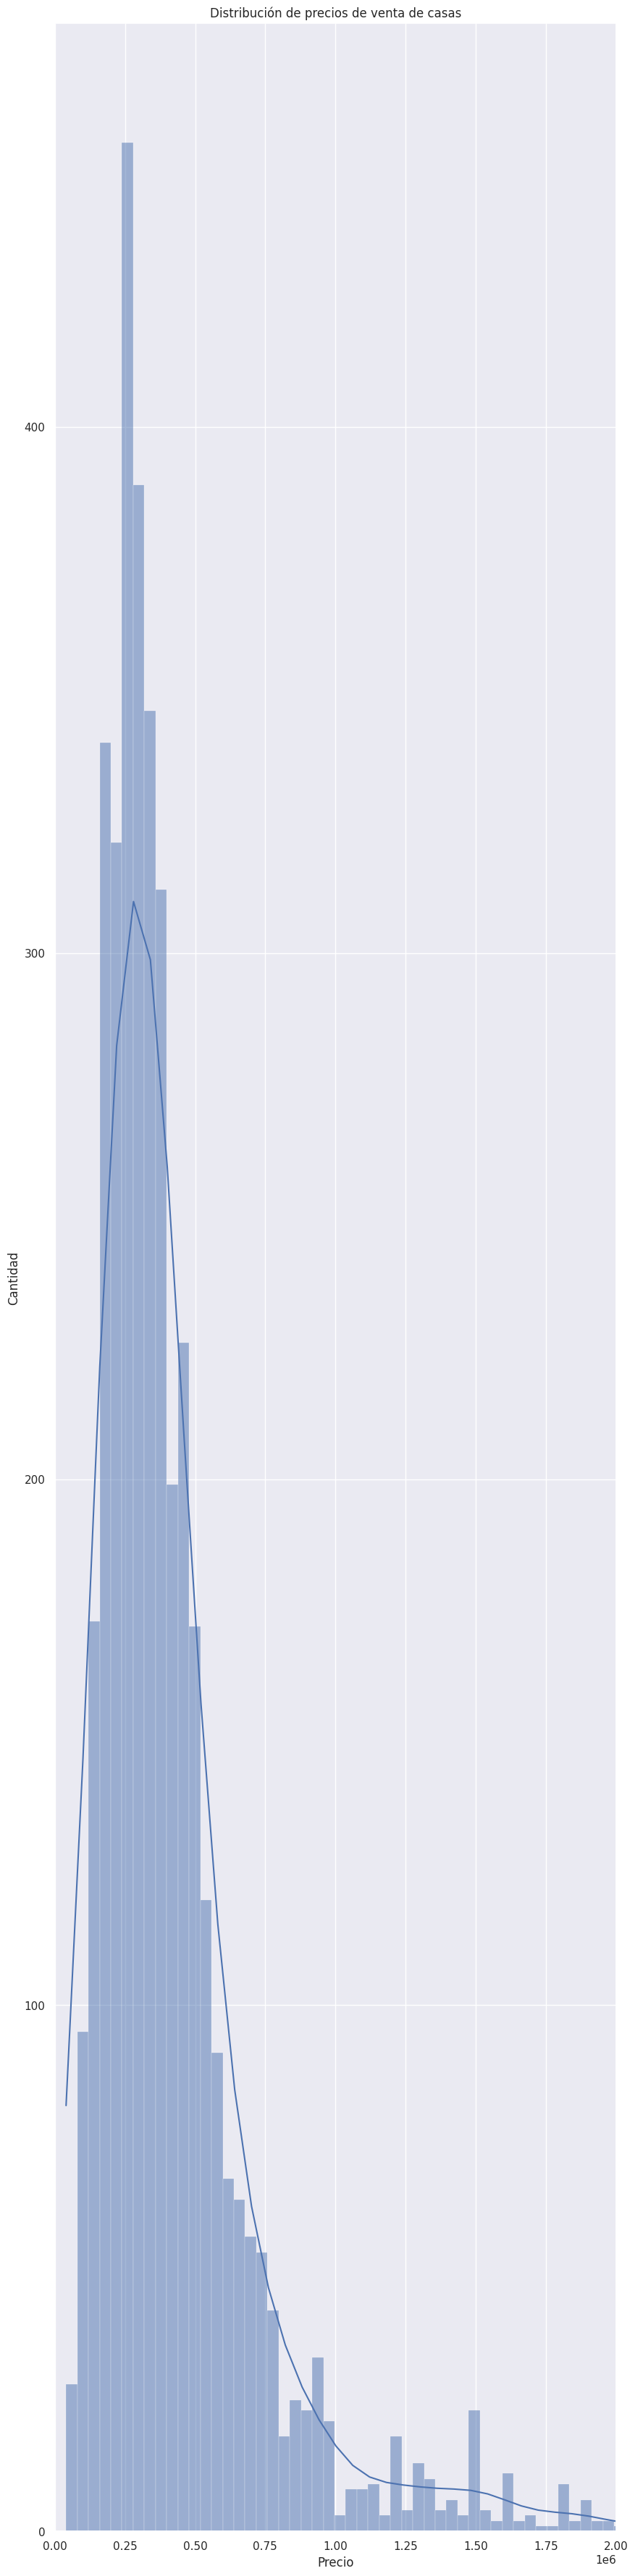

In [106]:
plt.figure(dpi=100)
h_casa = sns.histplot(df_casa['property_price'], bins=300,kde=True)
h_casa = h_casa.set(title='Distribución de precios de venta de casas', xlim=(0, 2000000), xlabel='Precio', ylabel='Cantidad')

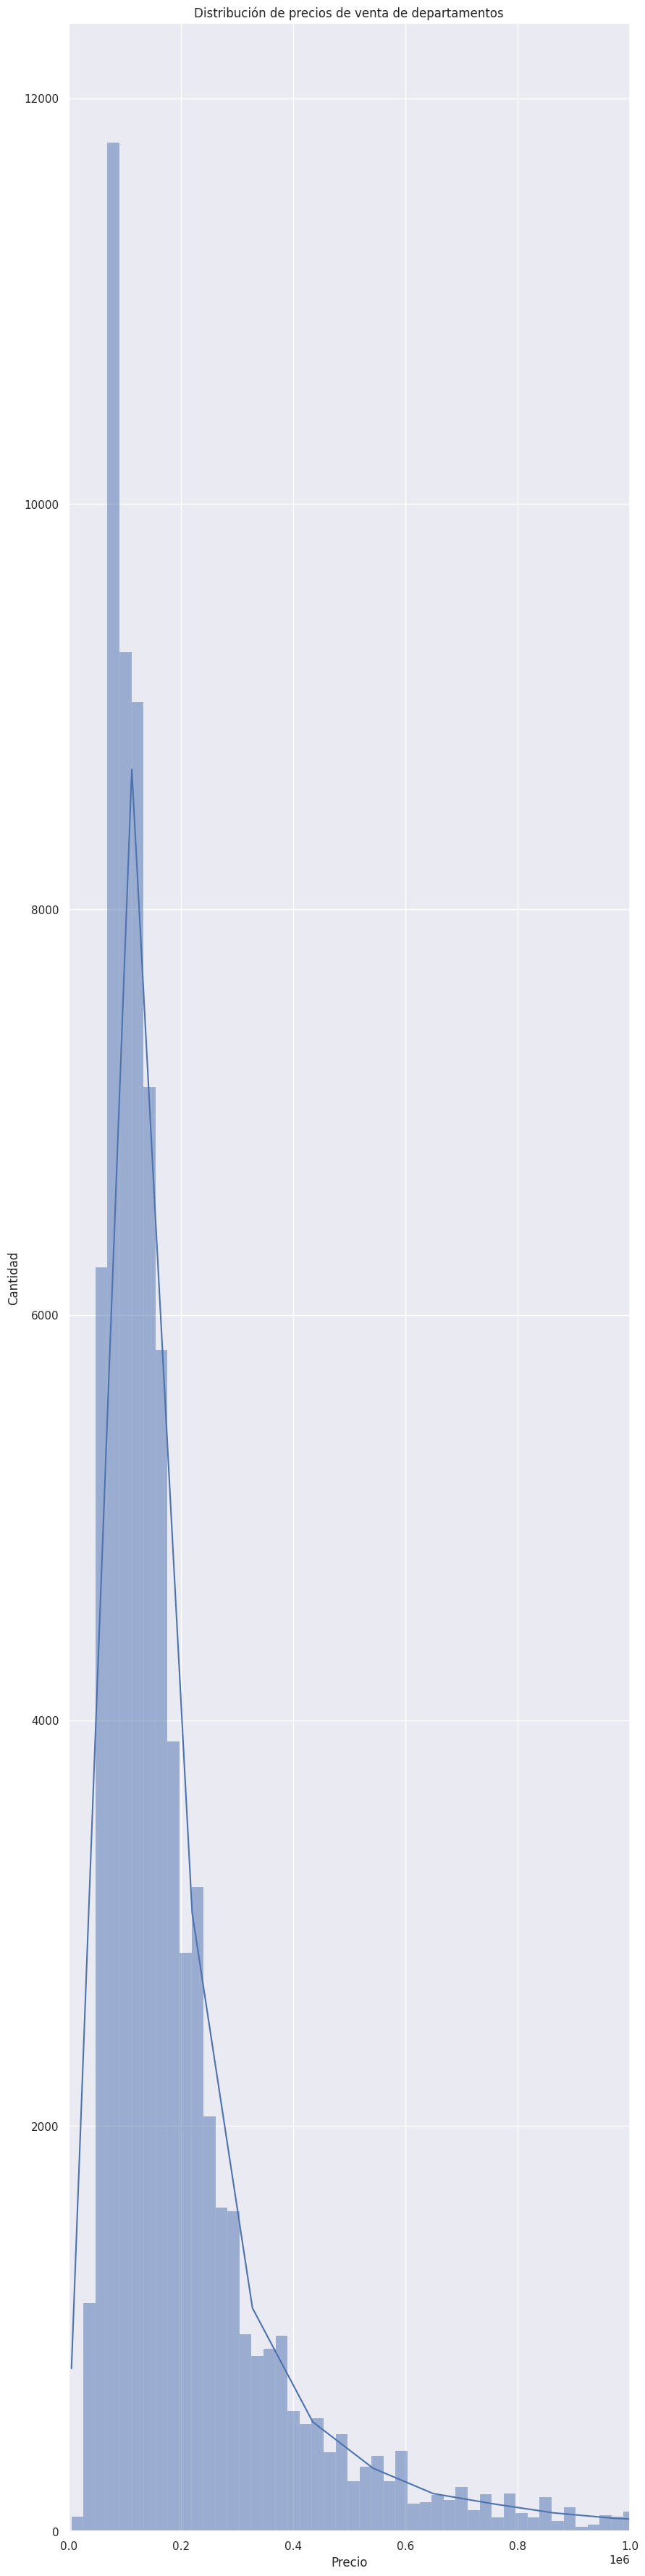

In [107]:
plt.figure(dpi=100)
h_depto = sns.histplot(df_depto['property_price'], bins=1000, kde=True)
h_depto = h_depto.set(title='Distribución de precios de venta de departamentos', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

In [108]:
df_ph = df[df['property_type']=='PH']

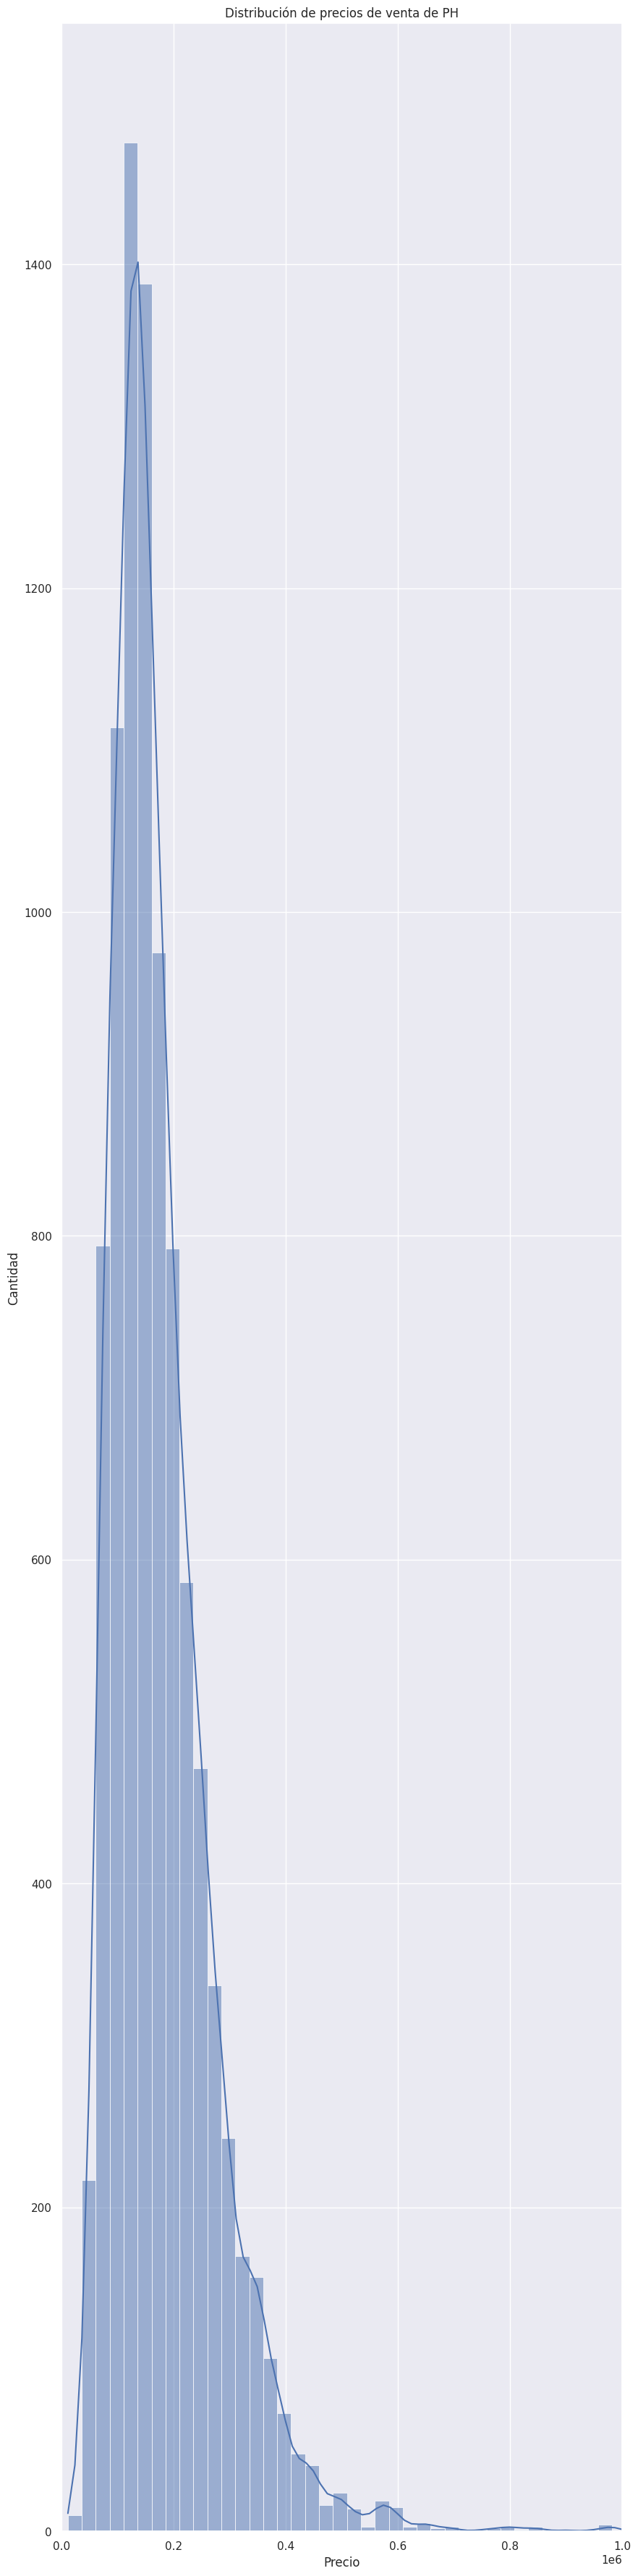

In [109]:
plt.figure(dpi=100)
h_ph = sns.histplot(df_ph['property_price'], bins=100, kde=True)
h_ph = h_ph.set(title='Distribución de precios de venta de PH', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

#### Con log

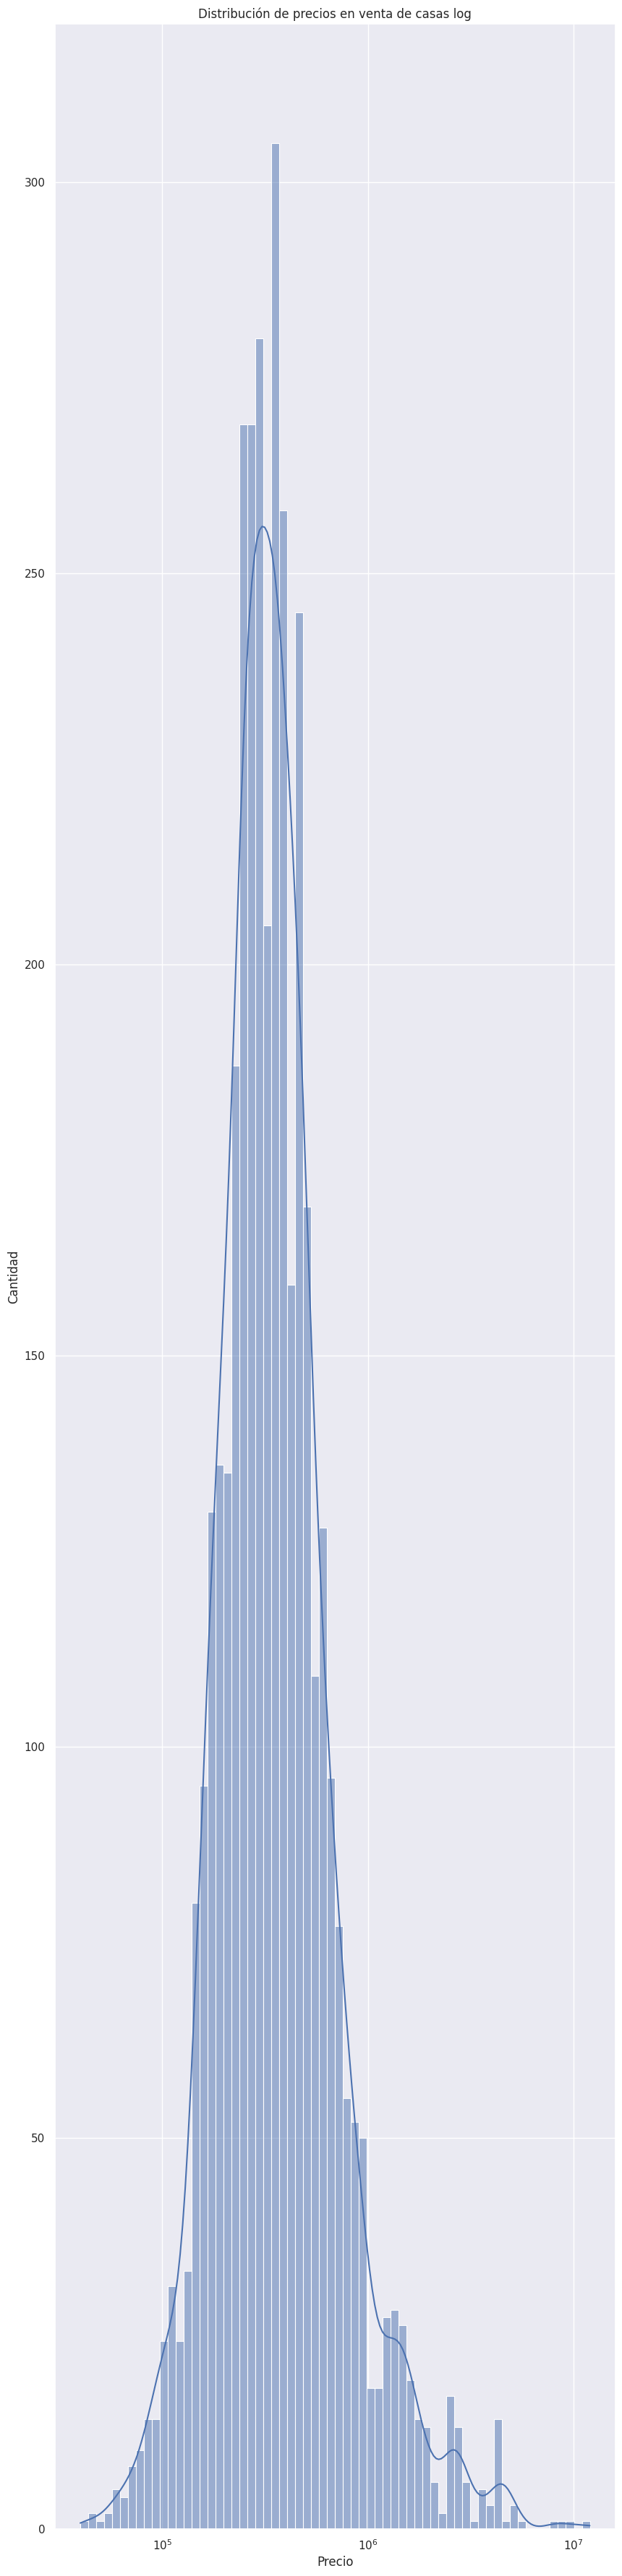

In [110]:
plt.figure(dpi=100)
h_casa2 = sns.histplot(df_casa['property_price'], kde=True, log_scale=True)
h_casa2 = h_casa2.set(title='Distribución de precios en venta de casas log', xlabel='Precio', ylabel='Cantidad')

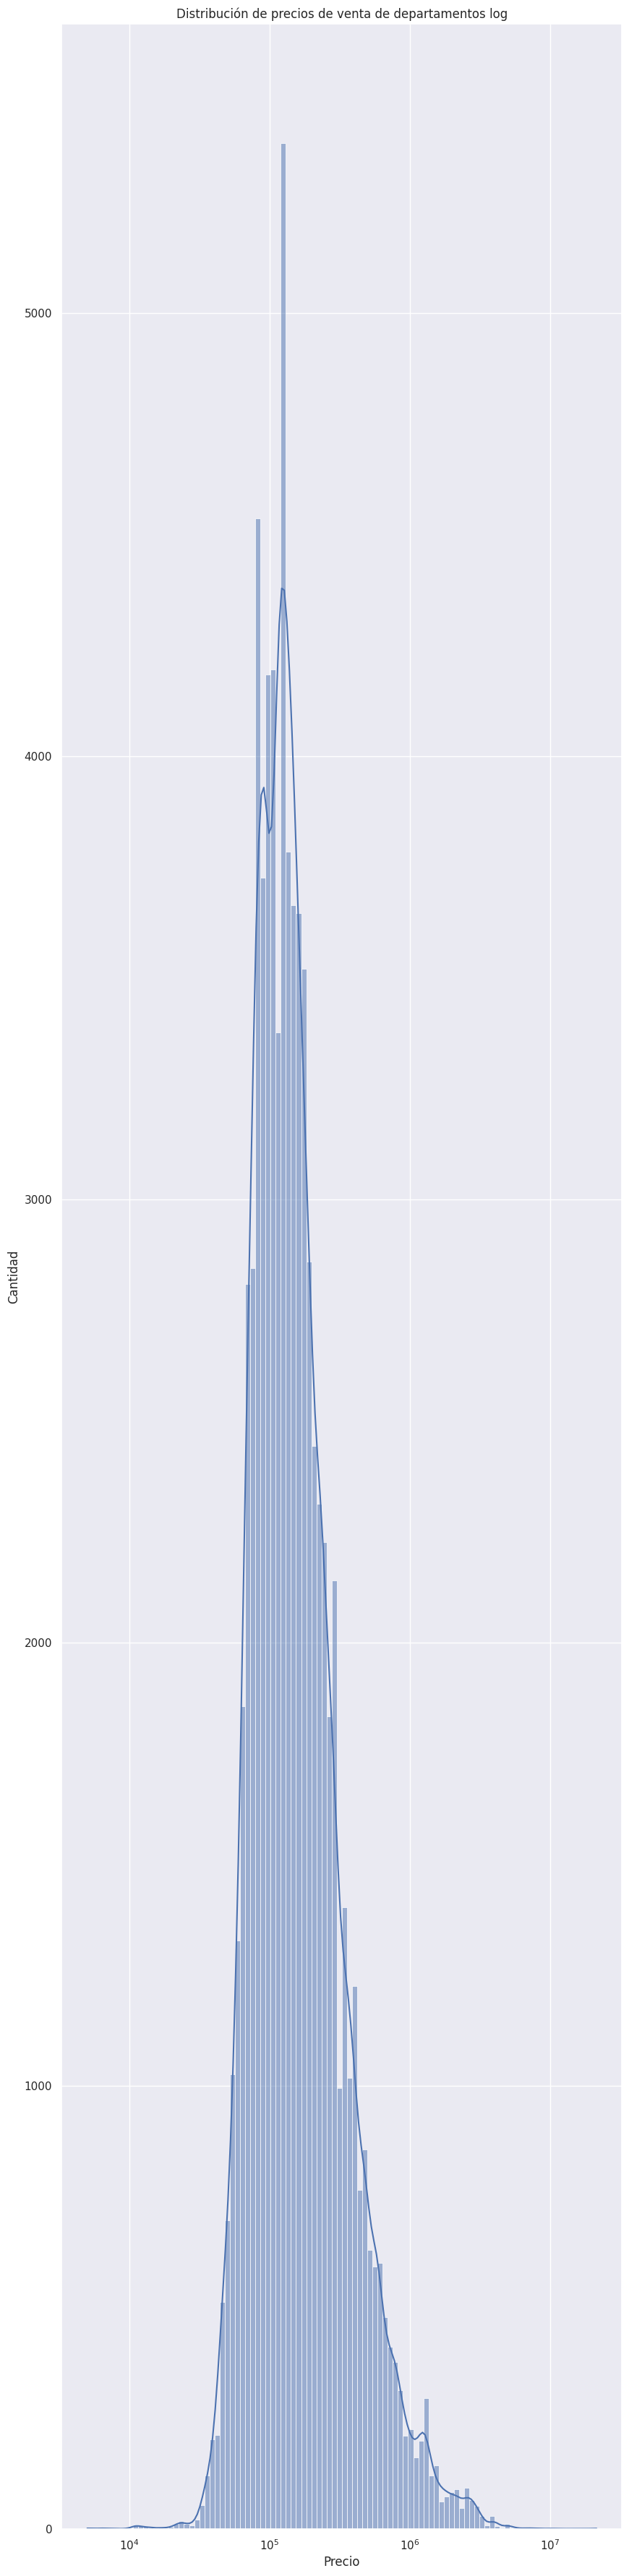

In [111]:
plt.figure(dpi=100)
h_depto2 = sns.histplot(df_depto['property_price'], bins=100, kde=True, log_scale=True)
h_depto2 = h_depto2.set(title='Distribución de precios de venta de departamentos log', xlabel='Precio', ylabel='Cantidad')

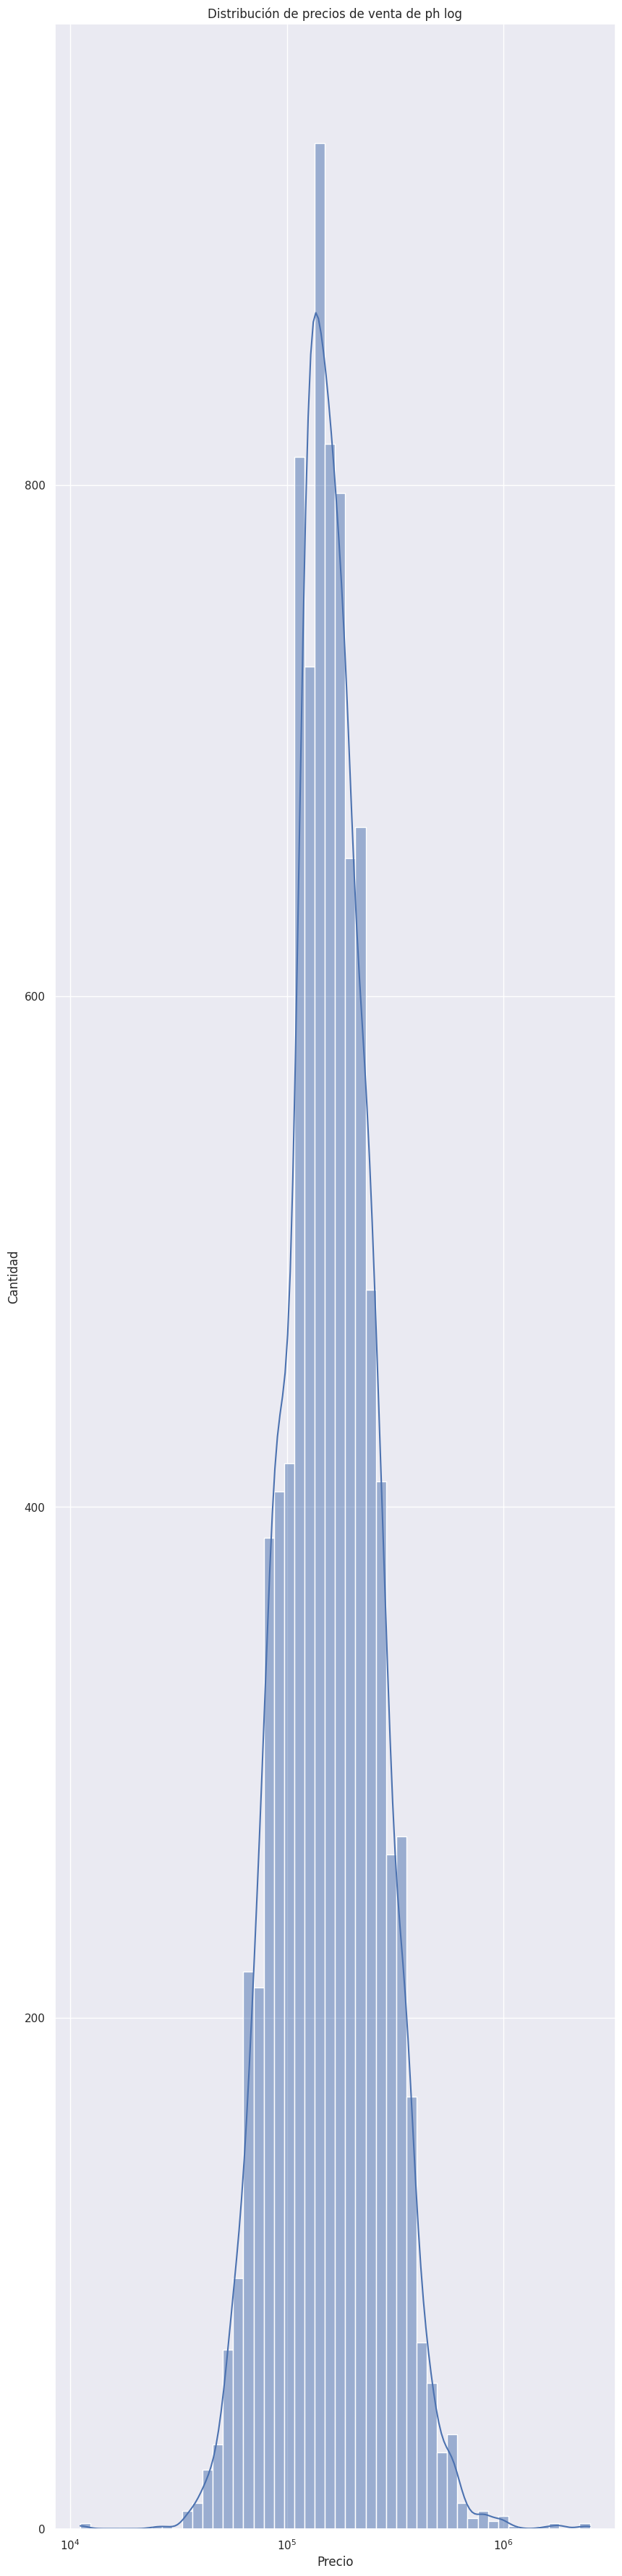

In [112]:
plt.figure(dpi=100)
h_ph2 = sns.histplot(df_ph['property_price'], bins=50, kde=True, log_scale=True)
h_ph2 = h_ph2.set(title='Distribución de precios de venta de ph log', xlabel='Precio', ylabel='Cantidad')

#### Santiago:

#### Feature: property_rooms

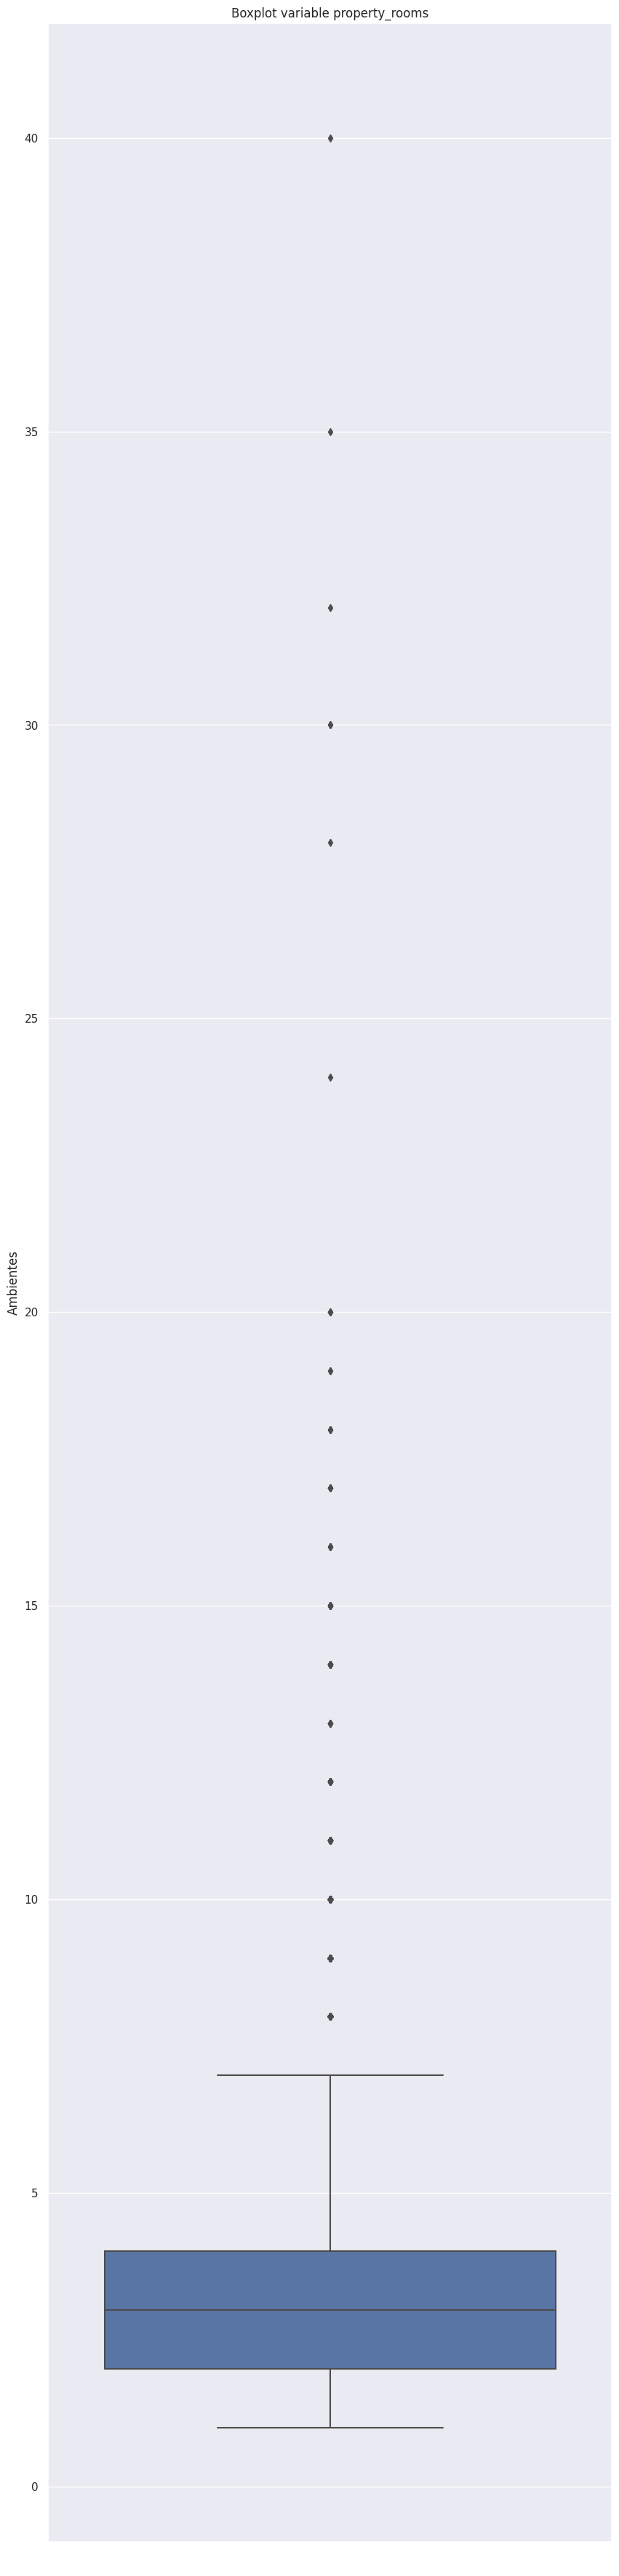

In [113]:
# Boxplot de la variable ambientes
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

Podemos observar multiples outliers, muchos de ellos extremos

In [114]:
outlier_rooms=df[df.property_rooms > 25]
outlier_rooms

start_date    end_date  created_on    latitud   longitud  \
4264   2021-03-15  2021-06-05  2021-03-15 -34.616391 -58.456038   
10581  2021-02-07  2021-06-15  2021-02-07 -34.649872 -58.483012   
18731  2021-08-03  9999-12-31  2021-08-03 -34.633236 -58.480313   
31528  2021-03-24  2021-06-05  2021-03-24 -34.642037 -58.438995   
72247  2021-11-18  2021-12-02  2021-11-18 -34.588742 -58.422459   
78706  2021-05-05  2021-06-05  2021-05-05 -34.570959 -58.458106   

              place_l2           place_l3 place_l4 place_l5 operation  \
4264   Capital Federal          Caballito      NaN      NaN     Venta   
10581  Capital Federal  Parque Avellaneda      NaN      NaN     Venta   
18731  Capital Federal           Floresta      NaN      NaN     Venta   
31528  Capital Federal   Parque Chacabuco      NaN      NaN     Venta   
72247  Capital Federal            Palermo      NaN      NaN     Venta   
78706  Capital Federal           Belgrano      NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
4264   Departamento            30.0                2.0   
10581            PH            30.0                2.0   
18731            PH            32.0               32.0   
31528  Departamento            35.0                NaN   
72247  Departamento            40.0                3.0   
78706          Casa            28.0               16.0   

       property_surface_total  property_surface_covered  property_price  \
4264                     79.0                      79.0        230000.0   
10581                    72.0                      60.0        123500.0   
18731                   535.0                     435.0        300000.0   
31528                    37.0                      33.0         67000.0   
72247                    75.0                      68.0        145000.0   
78706                   845.0                     845.0        950000.0   

      property_currency                                     property_title  \
4264                USD    C/DEP COCH Y BAULERA - SEGUI AL 700 - Caballito   
10581               USD                             PH - Parque Avellaneda   
18731               USD                   Hotel Familiar,  32 Habitaciones   
31528               USD  Venta Departamento monoambiente balcón full am...   
72247               USD  SOLER 4400 - PALERMO - DPTO 4 AMB C/ BALCON AL...   
78706               USD  Imponente casa inglesa de 3 plantas   S.S. en ...   

       start_date_day  start_date_month  start_date_year  end_date_day  \
4264               15                 3             2021             5   
10581               7                 2             2021            15   
18731               3                 8             2021            31   
31528              24                 3             2021             5   
72247              18                11             2021             2   
78706               5                 5             2021             5   

       end_date_month  end_date_year  created_on_day  created_on_month  \
4264                6           2021              15                 3   
10581               6           2021               7                 2   
18731              12           2023               3                 8   
31528               6           2021              24                 3   
72247              12           2021              18                11   
78706               6           2021               5                 5   

       created_on_year  
4264              2021  
10581             2021  
18731             2021  
31528             2021  
72247             2021  
78706             2021

Vemos que salvo el hotel y la casa inglesa, los demas no son posibles

In [115]:
# Seleccionamos todos menos el hotel y la casa inglesa
idx=outlier_rooms[outlier_rooms.property_title.apply(lambda x: not ('Hotel' in x or 'inglesa' in x))].index
# Y los eliminamos
df.drop(idx, inplace=True)

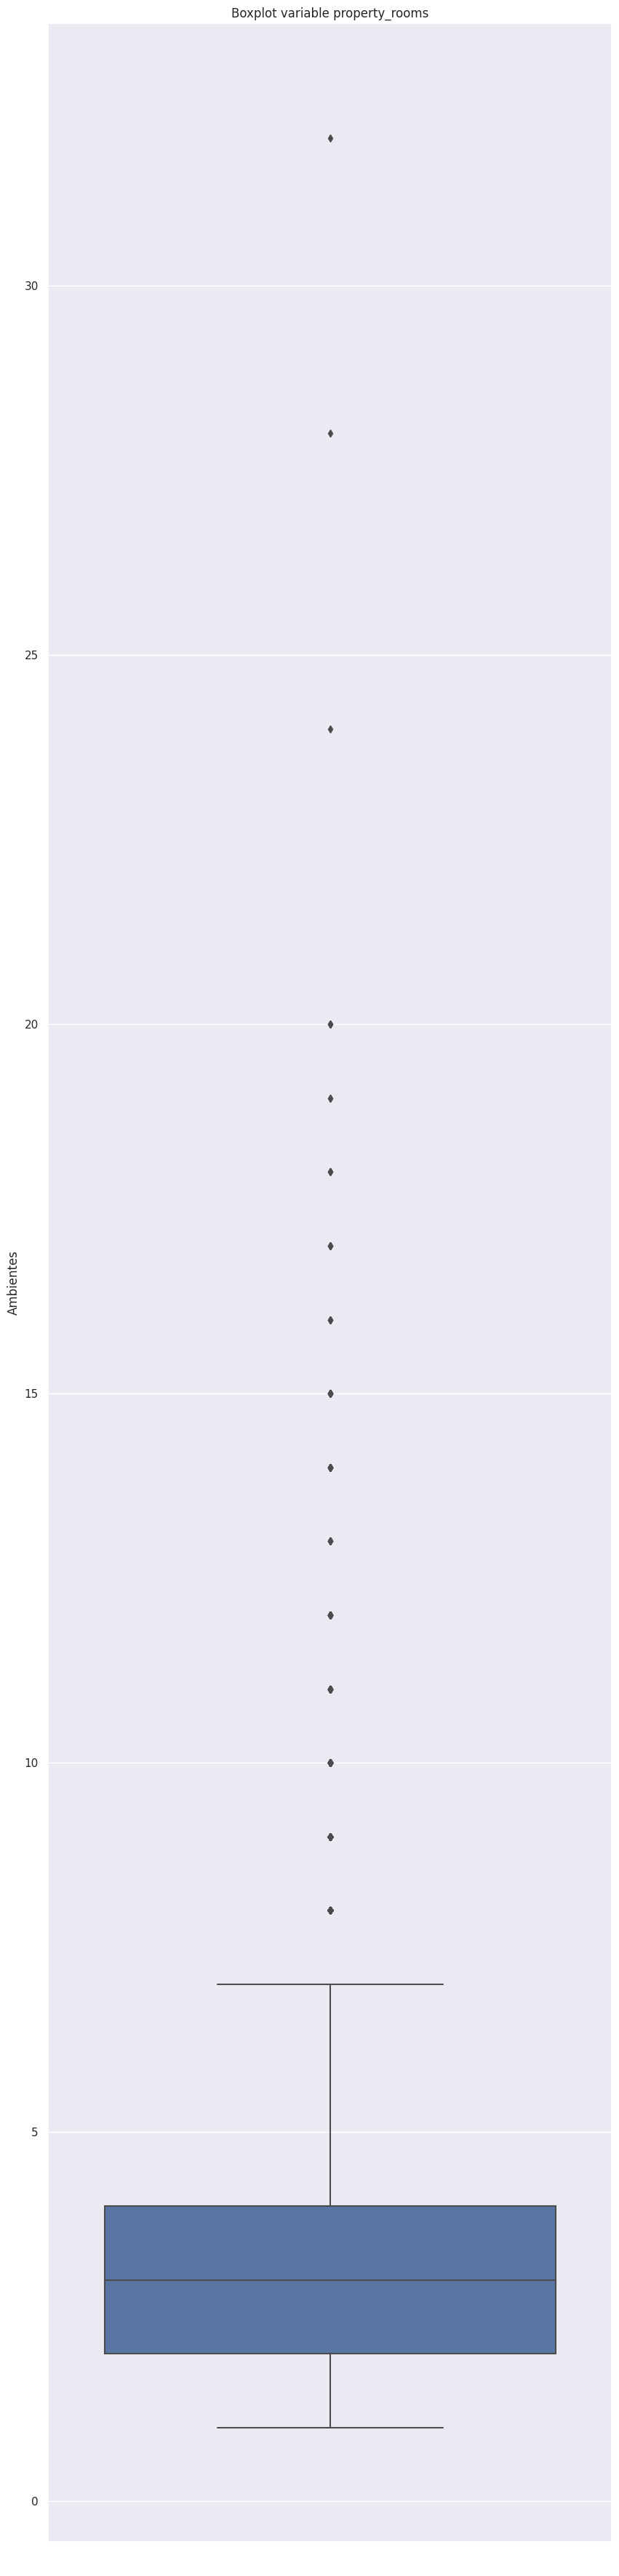

In [116]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

#### Feature: property_bedrooms

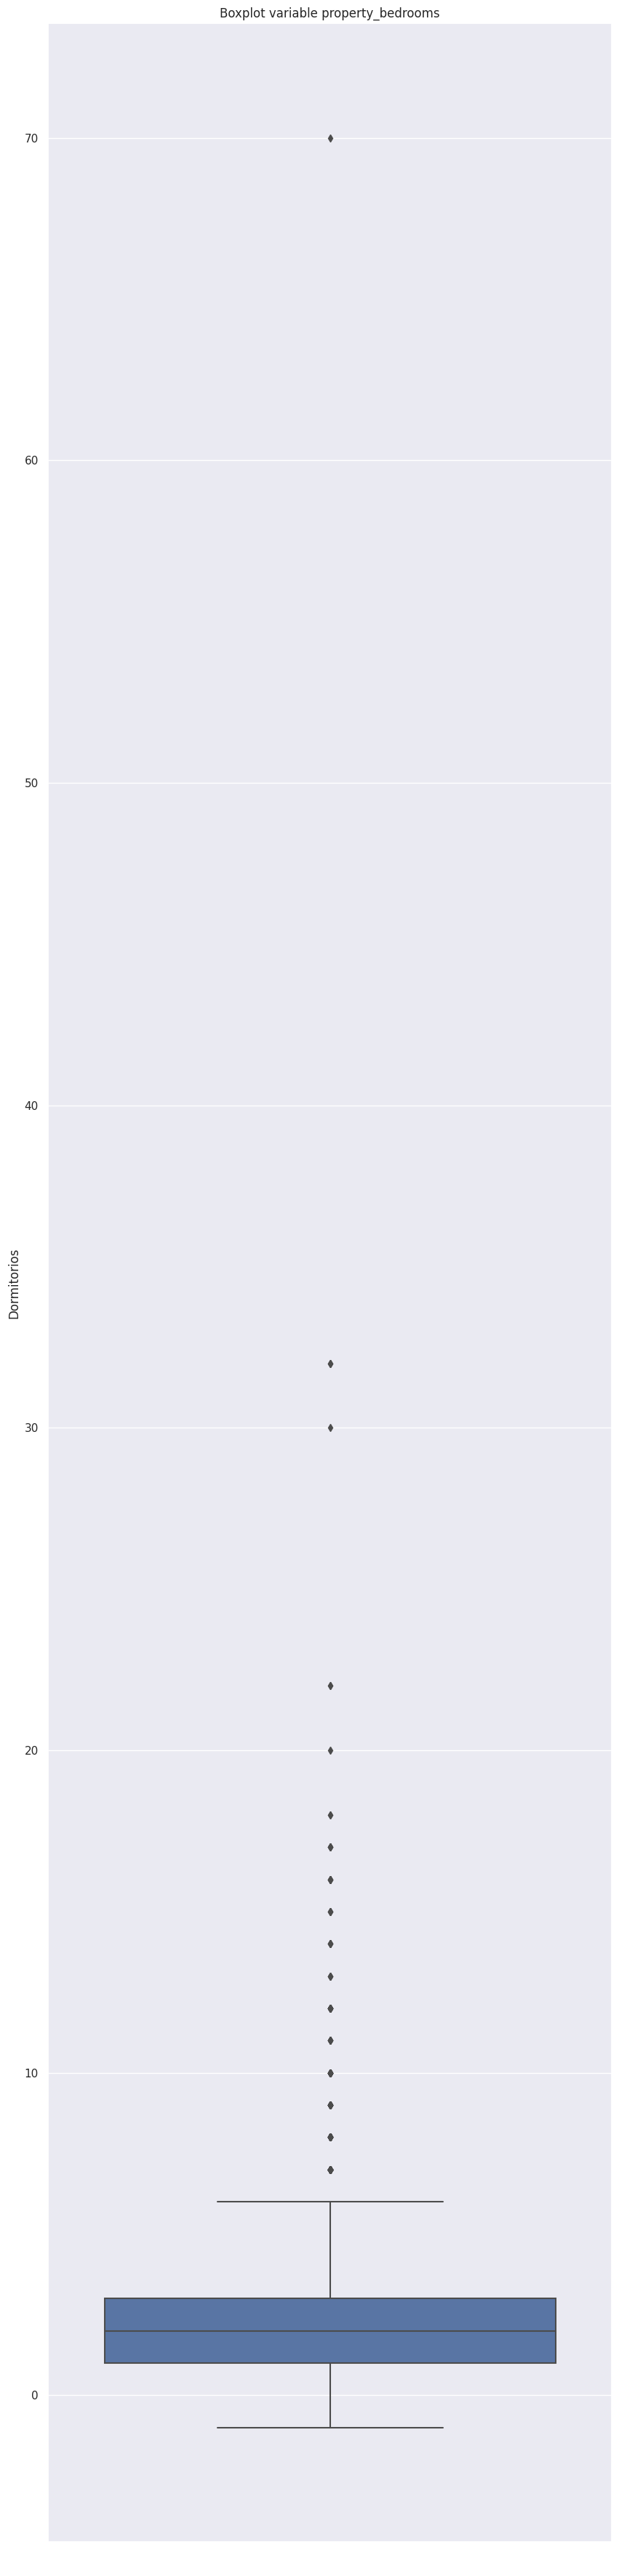

In [117]:
# Boxplot de la variable dormitorios
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

Nuevamente vemos multiples outliers, algunos de ellos extremos

In [118]:
outlier_bedrooms=df[df.property_bedrooms > 25]
outlier_bedrooms

start_date    end_date  created_on    latitud   longitud  \
9819   2021-03-14  2021-06-05  2021-03-14 -34.608645 -58.485619   
10140  2021-10-16  2021-12-24  2021-10-16 -34.630186 -58.389156   
17940  2021-03-26  2021-06-05  2021-03-26 -34.591110 -58.400685   
18731  2021-08-03  9999-12-31  2021-08-03 -34.633236 -58.480313   
19830  2021-09-24  2022-01-27  2021-09-24 -34.646632 -58.497902   

              place_l2          place_l3 place_l4 place_l5 operation  \
9819   Capital Federal  Villa del Parque      NaN      NaN     Venta   
10140  Capital Federal  Parque Patricios      NaN      NaN     Venta   
17940  Capital Federal          Recoleta      NaN      NaN     Venta   
18731  Capital Federal          Floresta      NaN      NaN     Venta   
19830  Capital Federal        Villa Luro      NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
9819   Departamento             4.0               32.0   
10140  Departamento             1.0               32.0   
17940  Departamento             4.0               30.0   
18731            PH            32.0               32.0   
19830  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  \
9819                     83.0                      75.0        189000.0   
10140                    32.0                      32.0         52000.0   
17940                   148.0                     138.0        380000.0   
18731                   535.0                     435.0        300000.0   
19830                     NaN                      70.0        135000.0   

      property_currency                                     property_title  \
9819                USD  Departamento 4 ambientes a estrenar en duplex ...   
10140               USD           Depto 1 ambiente amplio apto profesional   
17940               USD  Departamento. Recoleta. Balcón terraza. Silenc...   
18731               USD                   Hotel Familiar,  32 Habitaciones   
19830               USD                          Departamento - Villa Luro   

       start_date_day  start_date_month  start_date_year  end_date_day  \
9819               14                 3             2021             5   
10140              16                10             2021            24   
17940              26                 3             2021             5   
18731               3                 8             2021            31   
19830              24                 9             2021            27   

       end_date_month  end_date_year  created_on_day  created_on_month  \
9819                6           2021              14                 3   
10140              12           2021              16                10   
17940               6           2021              26                 3   
18731              12           2023               3                 8   
19830               1           2022              24                 9   

       created_on_year  
9819              2021  
10140             2021  
17940             2021  
18731             2021  
19830             2021

Vemos que salvo el hotel, el resto de datos no son posibles

In [119]:
# Seleccionamos todos menos el hotel
idx=outlier_bedrooms[outlier_bedrooms.property_title.apply(lambda x: 'Hotel' not in x)].index
# Y los eliminamos
df.drop(idx, inplace=True)

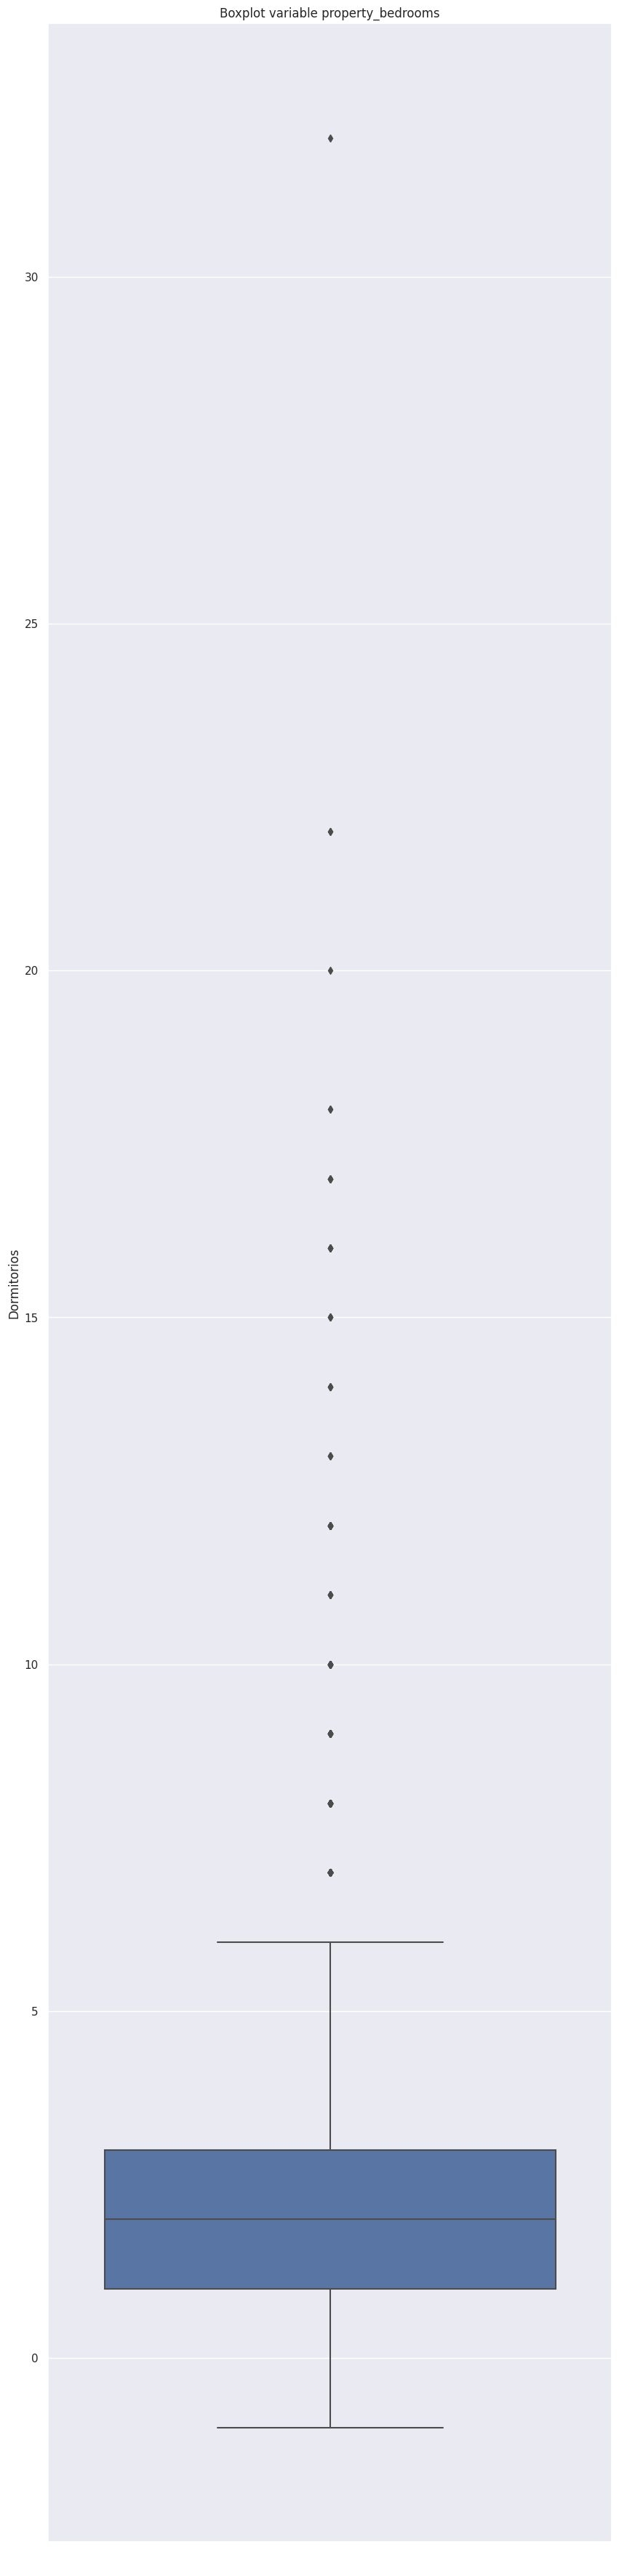

In [120]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

#### Feature: property_surface_total

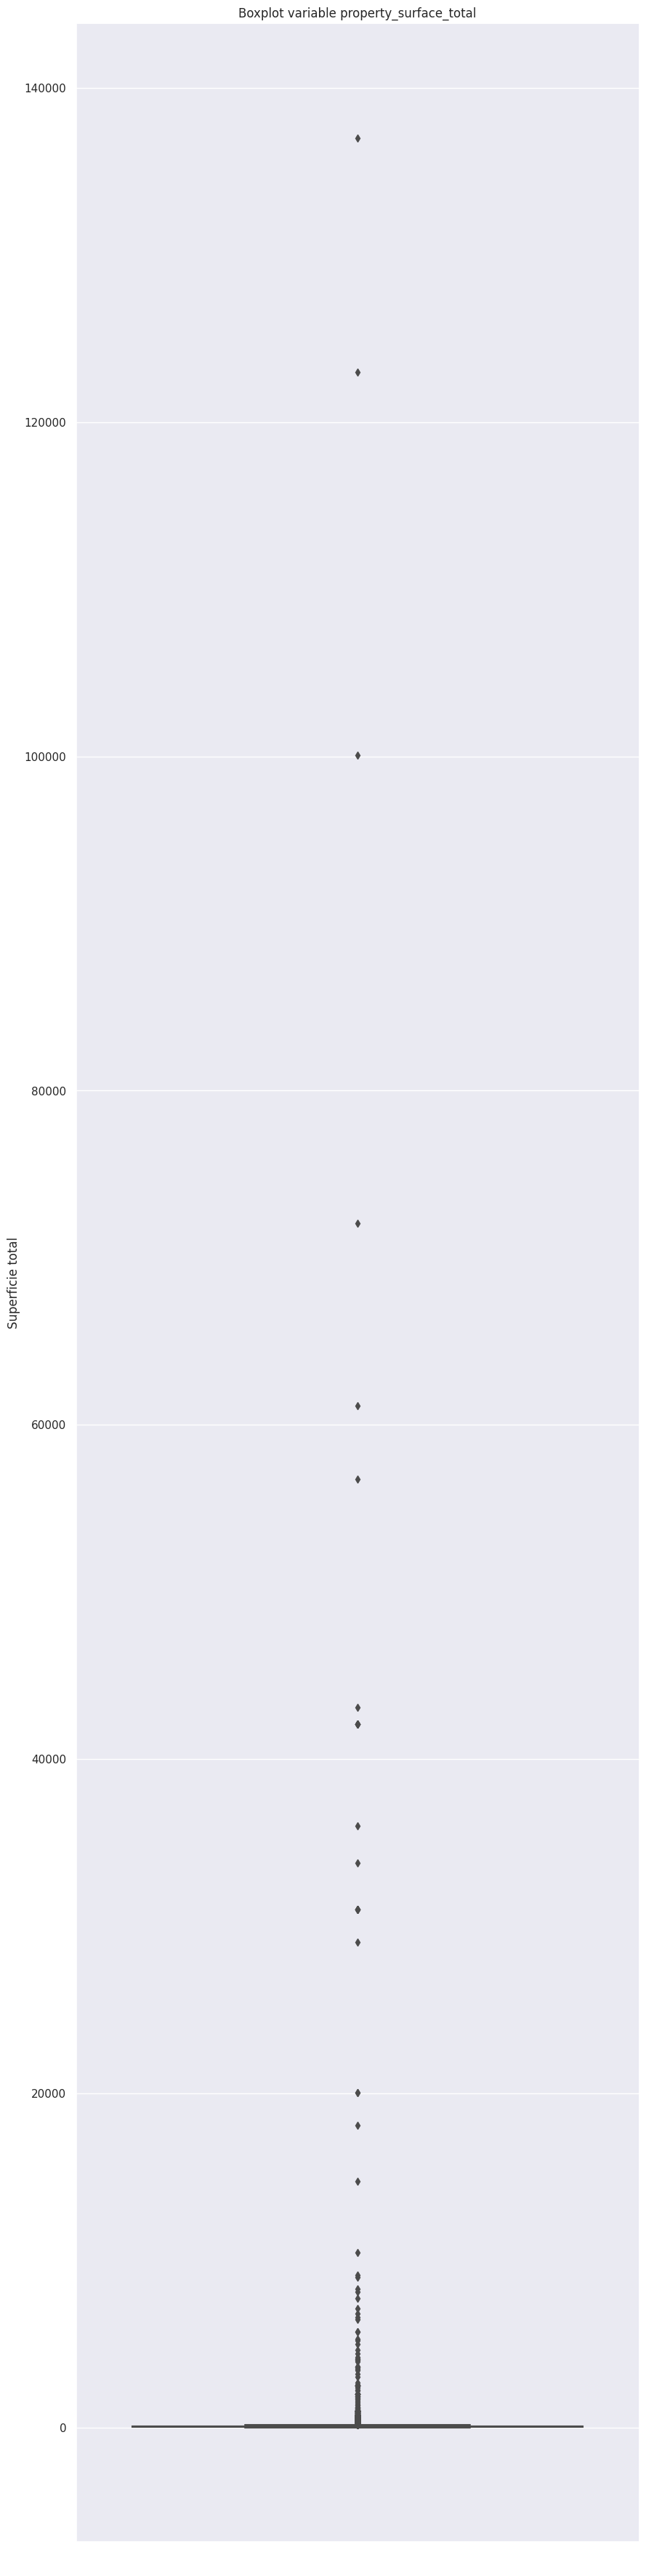

In [121]:
# Boxplot de la variable superficie total
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

Se observa una gran cantidad de outliers y muy extremos

In [122]:
# Buscamos observaciones mayores a 10mil m2
outlier_sfc_total=df[df.property_surface_total > 10000]
# Verificamos si son valores posibles
outlier_sfc_total

start_date    end_date  created_on    latitud   longitud  \
201    2021-09-09  2022-01-27  2021-09-09 -34.605781 -58.376705   
15080  2021-05-29  2021-06-08  2021-05-29 -34.578917 -58.429373   
15148  2021-05-29  2021-06-13  2021-05-29 -34.600113 -58.403649   
17521  2021-02-05  2021-05-16  2021-02-05 -34.588175 -58.396261   
22043  2021-03-11  2021-04-20  2021-03-11 -34.587320 -58.401556   
24644  2021-08-18  2021-08-23  2021-08-18 -34.550093 -58.483034   
26559  2021-10-05  2021-11-04  2021-10-05 -34.579163 -58.455725   
26934  2021-07-01  9999-12-31  2021-07-01 -34.599421 -58.386867   
44867  2021-03-07  2022-02-09  2021-03-07 -34.636532 -58.376406   
48558  2021-02-27  2021-03-03  2021-02-27 -34.628721 -58.421383   
54064  2021-02-26  2021-03-01  2021-02-26 -34.576139 -58.468259   
56359  2021-09-15  2021-10-07  2021-09-15 -34.579163 -58.455725   
61302  2021-08-10  2021-09-15  2021-08-10 -34.579163 -58.455725   
62225  2021-04-15  2021-06-05  2021-04-15 -34.579163 -58.455725   
66268  2021-03-03  2021-03-23  2021-03-03 -34.628721 -58.421383   
71538  2021-06-25  2021-07-08  2021-06-25 -34.550093 -58.483034   
71617  2021-06-25  2021-08-10  2021-06-25 -34.579163 -58.455725   
73559  2021-01-16  2021-04-14  2021-01-16 -34.579163 -58.455725   
75054  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75055  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75056  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75057  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75058  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75059  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75064  2021-04-24  2021-06-05  2021-04-24 -34.571747 -58.422612   
75422  2021-08-24  2021-09-03  2021-08-24 -34.555278 -58.459786   
82614  2021-01-07  2021-06-02  2021-01-07 -34.569963 -58.481658   
94158  2021-01-05  2021-01-09  2021-01-05 -34.628247 -58.437696   

              place_l2       place_l3 place_l4 place_l5 operation  \
201    Capital Federal    San Nicolás      NaN      NaN     Venta   
15080  Capital Federal        Palermo      NaN      NaN     Venta   
15148  Capital Federal      Balvanera      NaN      NaN     Venta   
17521  Capital Federal       Recoleta      NaN      NaN     Venta   
22043  Capital Federal   Barrio Norte      NaN      NaN     Venta   
24644  Capital Federal       Saavedra      NaN      NaN     Venta   
26559  Capital Federal     Colegiales      NaN      NaN     Venta   
26934  Capital Federal   Barrio Norte      NaN      NaN     Venta   
44867  Capital Federal       Barracas      NaN      NaN     Venta   
48558  Capital Federal          Boedo      NaN      NaN     Venta   
54064  Capital Federal  Villa Ortuzar      NaN      NaN     Venta   
56359  Capital Federal     Colegiales      NaN      NaN     Venta   
61302  Capital Federal     Colegiales      NaN      NaN     Venta   
62225  Capital Federal     Colegiales      NaN      NaN     Venta   
66268  Capital Federal          Boedo      NaN      NaN     Venta   
71538  Capital Federal       Saavedra      NaN      NaN     Venta   
71617  Capital Federal     Colegiales      NaN      NaN     Venta   
73559  Capital Federal     Colegiales      NaN      NaN     Venta   
75054  Capital Federal        Palermo      NaN      NaN     Venta   
75055  Capital Federal        Palermo      NaN      NaN     Venta   
75056  Capital Federal        Palermo      NaN      NaN     Venta   
75057  Capital Federal        Palermo      NaN      NaN     Venta   
75058  Capital Federal        Palermo      NaN      NaN     Venta   
75059  Capital Federal        Palermo      NaN      NaN     Venta   
75064  Capital Federal        Palermo      NaN      NaN     Venta   
75422  Capital Federal       Belgrano      NaN      NaN     Venta   
82614  Capital Federal  Villa Urquiza      NaN      NaN     Venta   
94158  Capital Federal      Caballito      NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
201

In [123]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_total.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

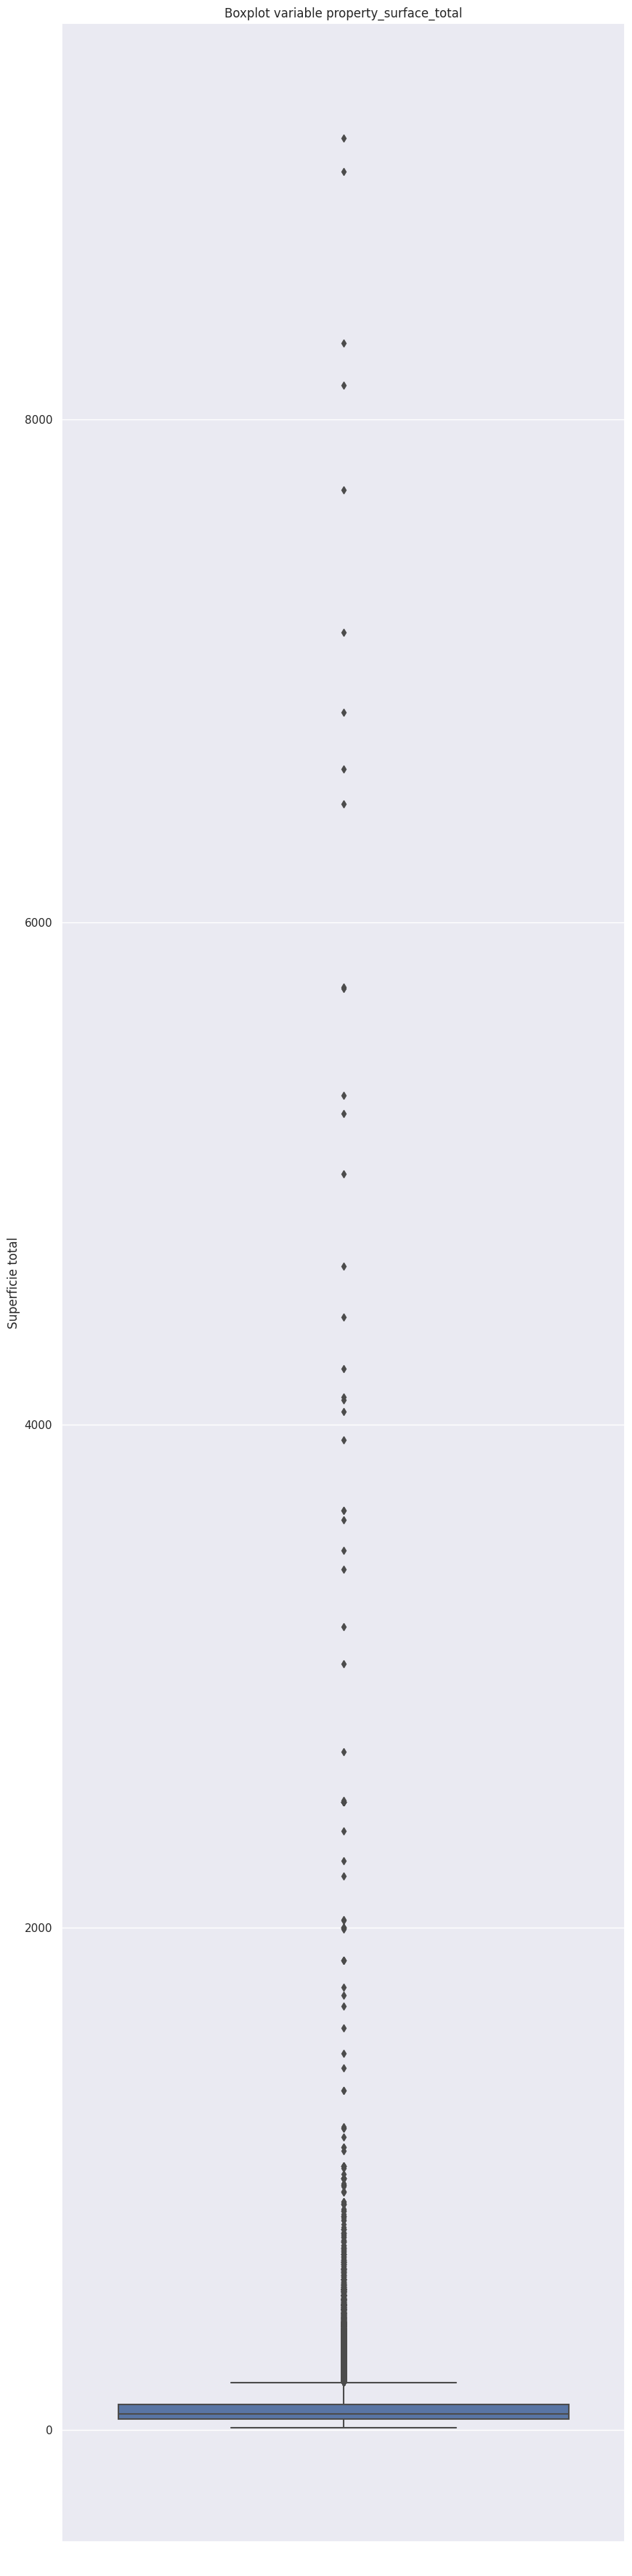

In [124]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

In [125]:
# Buscamos observaciones mayores a mil m2 pero menos de 5 ambientes y que no sean casas
outlier_sfc_rooms=df[df.apply(lambda x: x['property_surface_total'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_sfc_rooms

start_date    end_date  created_on    latitud   longitud  \
364    2021-12-17  2022-03-25  2021-12-17 -34.584521 -58.424260   
6728   2021-02-08  9999-12-31  2021-02-08 -34.634196 -58.465152   
6941   2021-02-08  2021-03-04  2021-02-08 -34.554356 -58.458076   
6950   2021-02-08  2021-05-01  2021-02-08 -34.557903 -58.452293   
7038   2021-02-08  2021-03-18  2021-02-08 -34.611660 -58.393440   
7085   2021-02-08  2021-05-01  2021-02-08 -34.628565 -58.445791   
7274   2021-02-08  2021-03-18  2021-02-08 -34.573000 -58.481100   
7276   2021-02-08  2021-03-07  2021-02-08 -34.573375 -58.480012   
12199  2021-03-13  2021-03-16  2021-03-13 -34.563005 -58.453674   
12205  2021-03-13  2021-03-16  2021-03-13 -34.563005 -58.453674   
19795  2021-09-24  2021-09-26  2021-09-24 -34.614279 -58.361092   
21589  2021-05-28  2021-06-13  2021-05-28 -34.603992 -58.500042   
24739  2021-08-18  2021-11-13  2021-08-18 -34.627828 -58.490255   
24905  2021-03-25  2021-03-26  2021-03-25 -34.637304 -58.357534   
31291  2021-03-24  2021-03-28  2021-03-24 -34.629203 -58.437124   
31768  2021-08-05  2021-08-08  2021-08-05 -34.611826 -58.516024   
32852  2021-09-12  2021-09-26  2021-09-12 -34.563371 -58.455471   
38851  2021-06-05  2021-06-13  2021-06-05 -34.606771 -58.502277   
40180  2021-08-21  2021-08-27  2021-08-21 -34.554356 -58.458076   
47597  2021-03-20  2021-04-13  2021-03-20 -34.563005 -58.453674   
47827  2021-03-20  2022-03-25  2021-03-20 -34.606260 -58.452737   
47832  2021-03-20  2021-04-13  2021-03-20 -34.611826 -58.516024   
48816  2021-02-27  2021-03-01  2021-02-27 -34.622357 -58.435193   
53799  2021-02-26  2021-02-28  2021-02-26 -34.576096 -58.441278   
55728  2021-06-19  2021-09-02  2021-06-19 -34.573000 -58.481100   
59739  2021-02-23  2021-06-25  2021-02-23 -34.603310 -58.419520   
63697  2021-01-03  2021-01-08  2021-01-03 -34.609829 -58.385083   
64161  2021-01-06  2021-01-09  2021-01-06 -34.617067 -58.513585   
64250  2021-01-06  2021-01-09  2021-01-06 -34.554356 -58.458076   
64253  2021-01-06  2021-01-09  2021-01-06 -34.554356 -58.458076   
64254  2021-01-06  2021-01-09  2021-01-06 -34.554356 -58.458076   
64256  2021-01-06  2021-01-09  2021-01-06 -34.555086 -58.459669   
64319  2021-01-06  2021-01-09  2021-01-06 -34.611826 -58.516024   
65450  2021-09-03  2021-09-03  2021-09-03 -34.554356 -58.458076   
66151  2021-03-03  2021-04-30  2021-03-03 -34.573775 -58.488545   
68522  2021-07-21  2021-08-08  2021-07-21 -34.604284 -58.387255   
68767  2021-04-13  2021-05-01  2021-04-13 -34.563005 -58.453674   
68930  2021-04-13  2021-05-01  2021-04-13 -34.611826 -58.516024   
77162  2021-07-08  2021-07-18  2021-07-08 -34.554356 -58.458076   
80466  2021-02-13  2021-03-18  2021-02-13 -34.558309 -58.459923   
80780  2021-02-13  2021-03-01  2021-02-13 -34.624845 -58.431635   
80848  2021-02-13  2021-03-01  2021-02-13 -34.624845 -58.431635   
80849  2021-02-13  2021-03-01  2021-02-13 -34.624845 -58.431635   
80907  2021-02-13  2021-03-01  2021-02-13 -34.624845 -58.431635   
81294  2021-02-13  2021-03-01  2021-02-13 -34.613757 -58.523484   
81506  2021-02-13  2021-04-03  2021-02-13 -34.599306 -58.482676   
82596  2021-01-07  2021-01-09  2021-01-07 -34.634638 -58.473519   
82754  2021-01-07  2021-01-08  2021-01-07 -34.563005 -58.453674   
82778  2021-01-07  2021-01-08  2021-01-07 -34.563005 -58.453674   
82786  2021-01-07  2021-01-08  2021-01-07 -34.563005 -58.453674   
82889  2021-01-07  2021-01-08  2021-01-07 -34.611826 -58.516024   
82890  2021-01-07  2021-01-08  2021-01-07 -34.613757 -58.523484   
82893  2021-01-07  2021-01-08  2021-01-07 -34.611826 -58.516024   
90132  2021-05-07  2021-06-05  2021-05-07 -34.622993 -58.455502   
90524  2021-05-20  2021-06-05  2021-05-20 -34.620555 -58.461464   
91531  2021-12-16  2022-02-09  2021-12-16 -34.620610 -58.425861   
94042  2021-01-05  2021-01-06  2021-01-05 -34.574650 -58.437659   
94154  2021-01-05  2021-01-09  2021-01-05 -34.627876 -58.437996   
94155  2021-01-05  2021-01-09  2021-01-05 -34.628397 -

In [126]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_rooms.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

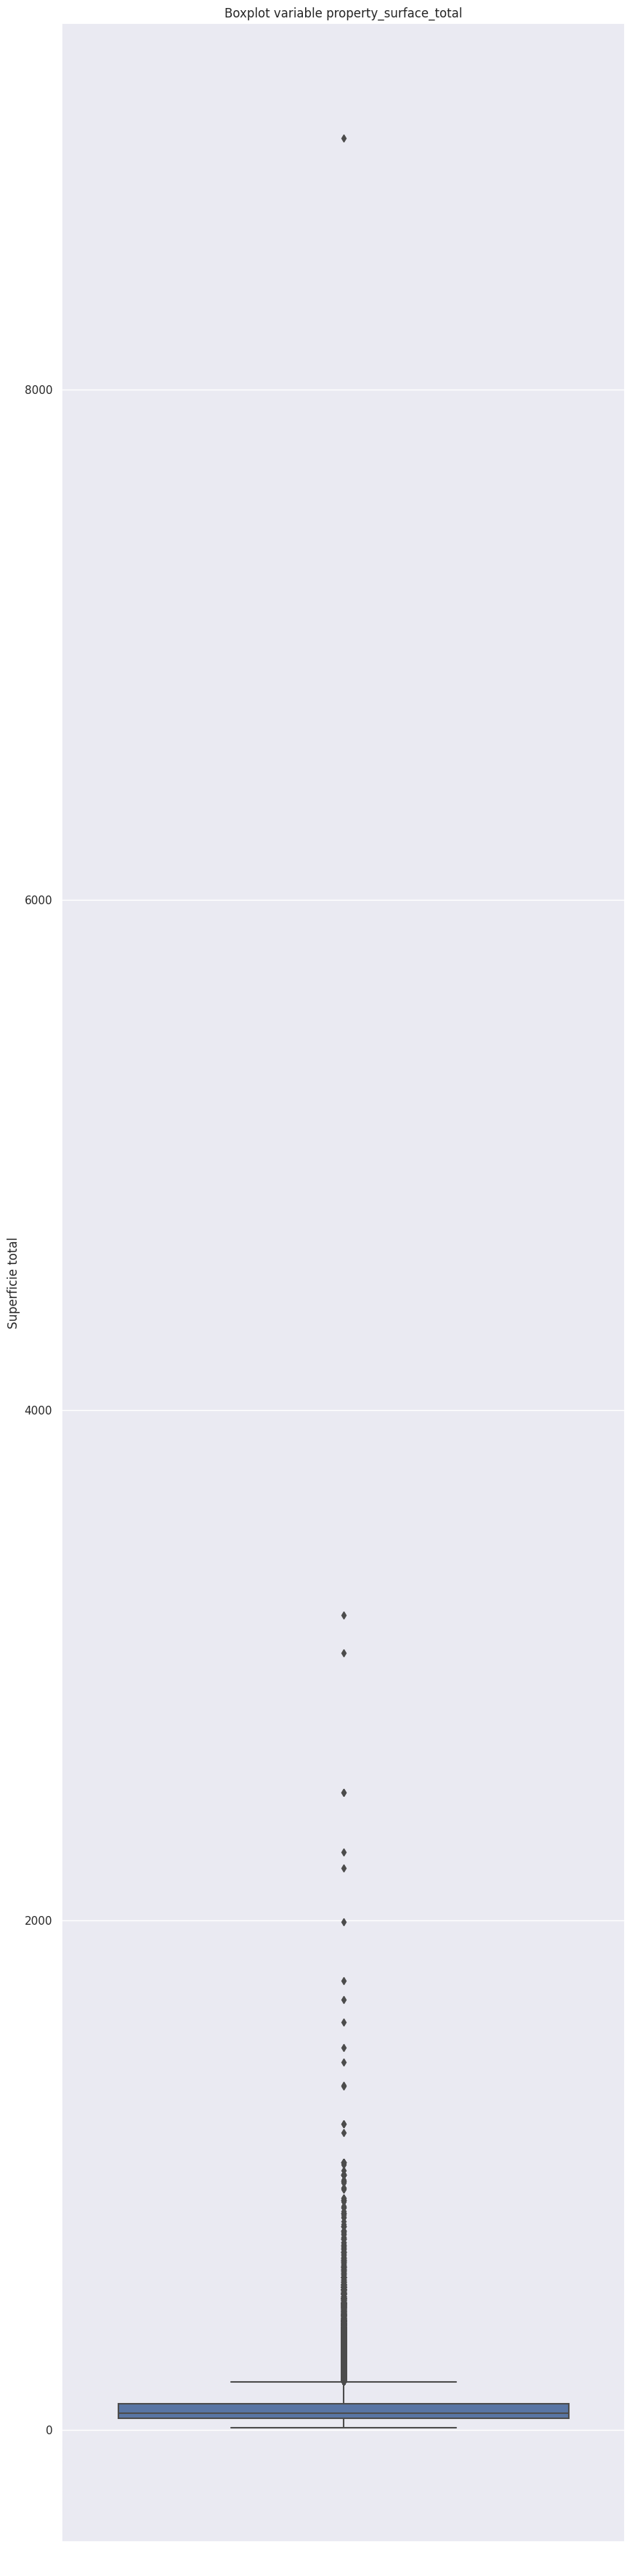

In [127]:
# Volvemos a graficar un boxplot una ultima vez luego de eliminar mas propiedades
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

#### Feature: property_surface_covered

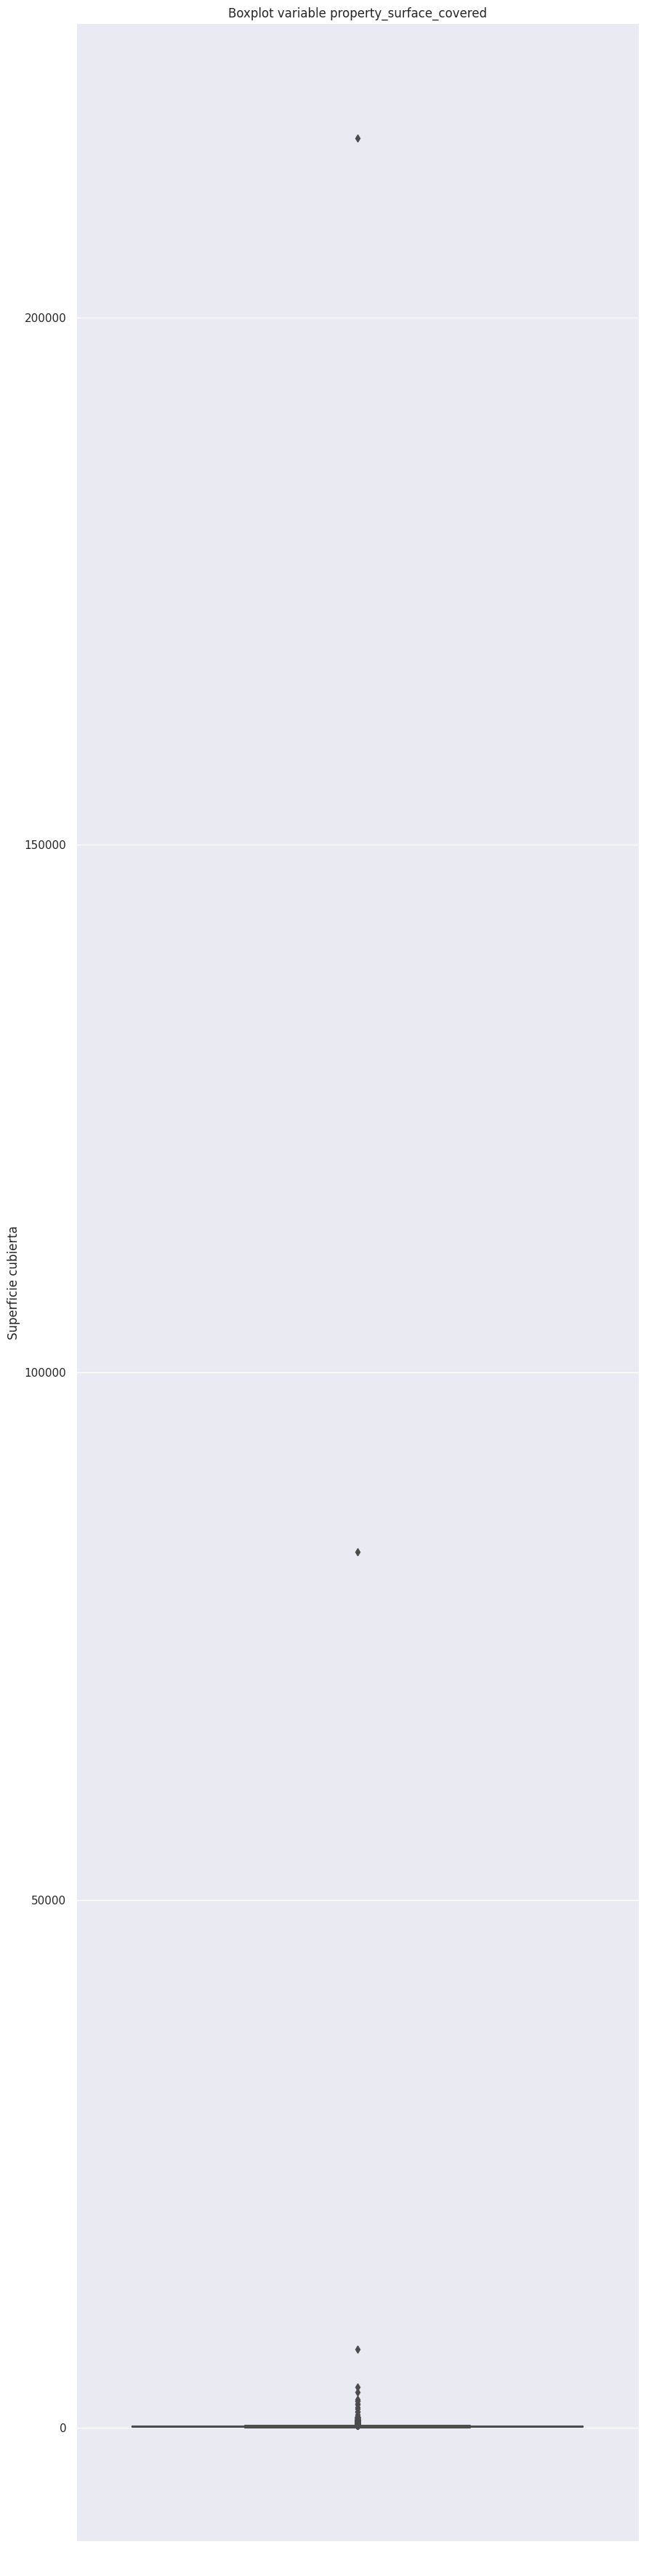

In [128]:
# Boxplot de la variable superficie cubierta
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [129]:
# Buscamos observaciones mayores a 3mil m2
outlier_sfc_cov=df[df.property_surface_covered > 3000]
outlier_sfc_cov

start_date    end_date  created_on    latitud   longitud  \
311    2021-12-17  9999-12-31  2021-12-17 -34.637026 -58.426283   
17850  2021-03-26  2021-06-05  2021-03-26 -34.572494 -58.462433   
41142  2021-07-25  9999-12-31  2021-07-25 -34.604362 -58.392366   
64154  2021-01-06  2021-01-09  2021-01-06 -34.649174 -58.413106   
71866  2021-11-04  2022-01-27  2021-11-04 -34.579394 -58.453519   

              place_l2          place_l3 place_l4 place_l5 operation  \
311    Capital Federal  Parque Chacabuco      NaN      NaN     Venta   
17850  Capital Federal          Belgrano      NaN      NaN     Venta   
41142  Capital Federal      Barrio Norte      NaN      NaN     Venta   
64154  Capital Federal           Pompeya      NaN      NaN     Venta   
71866  Capital Federal        Colegiales      NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
311            Casa             NaN                NaN   
17850          Casa             5.0                4.0   
41142  Departamento             4.0                NaN   
64154            PH             6.0                2.0   
71866  Departamento             3.0                2.0   

       property_surface_total  property_surface_covered  property_price  \
311                       NaN                  217000.0        250000.0   
17850                  3197.0                    3367.0      12000000.0   
41142                    83.0                   83000.0        155000.0   
64154                  8988.0                    7454.0        125000.0   
71866                    41.0                    3837.0         83000.0   

      property_currency                                    property_title  \
311                 USD  EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco   
17850               USD                                 Casa - Belgrano R   
41142               USD               AMPLIO DEPTO  EN VENTA BARRIO NORTE   
64154               USD                      PH en venta en Nueva Pompeya   
71866               USD                         Departamento - Colegiales   

       start_date_day  start_date_month  start_date_year  end_date_day  \
311                17                12             2021            31   
17850              26                 3             2021             5   
41142              25                 7             2021            31   
64154               6                 1             2021             9   
71866               4                11             2021            27   

       end_date_month  end_date_year  created_on_day  created_on_month  \
311                12           2023              17                12   
17850               6           2021              26                 3   
41142              12           2023              25                 7   
64154               1           2021               6                 1   
71866               1           2022               4                11   

       created_on_year  
311               2021  
17850             2021  
41142             2021  
64154             2021  
71866             2021

In [130]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_cov.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

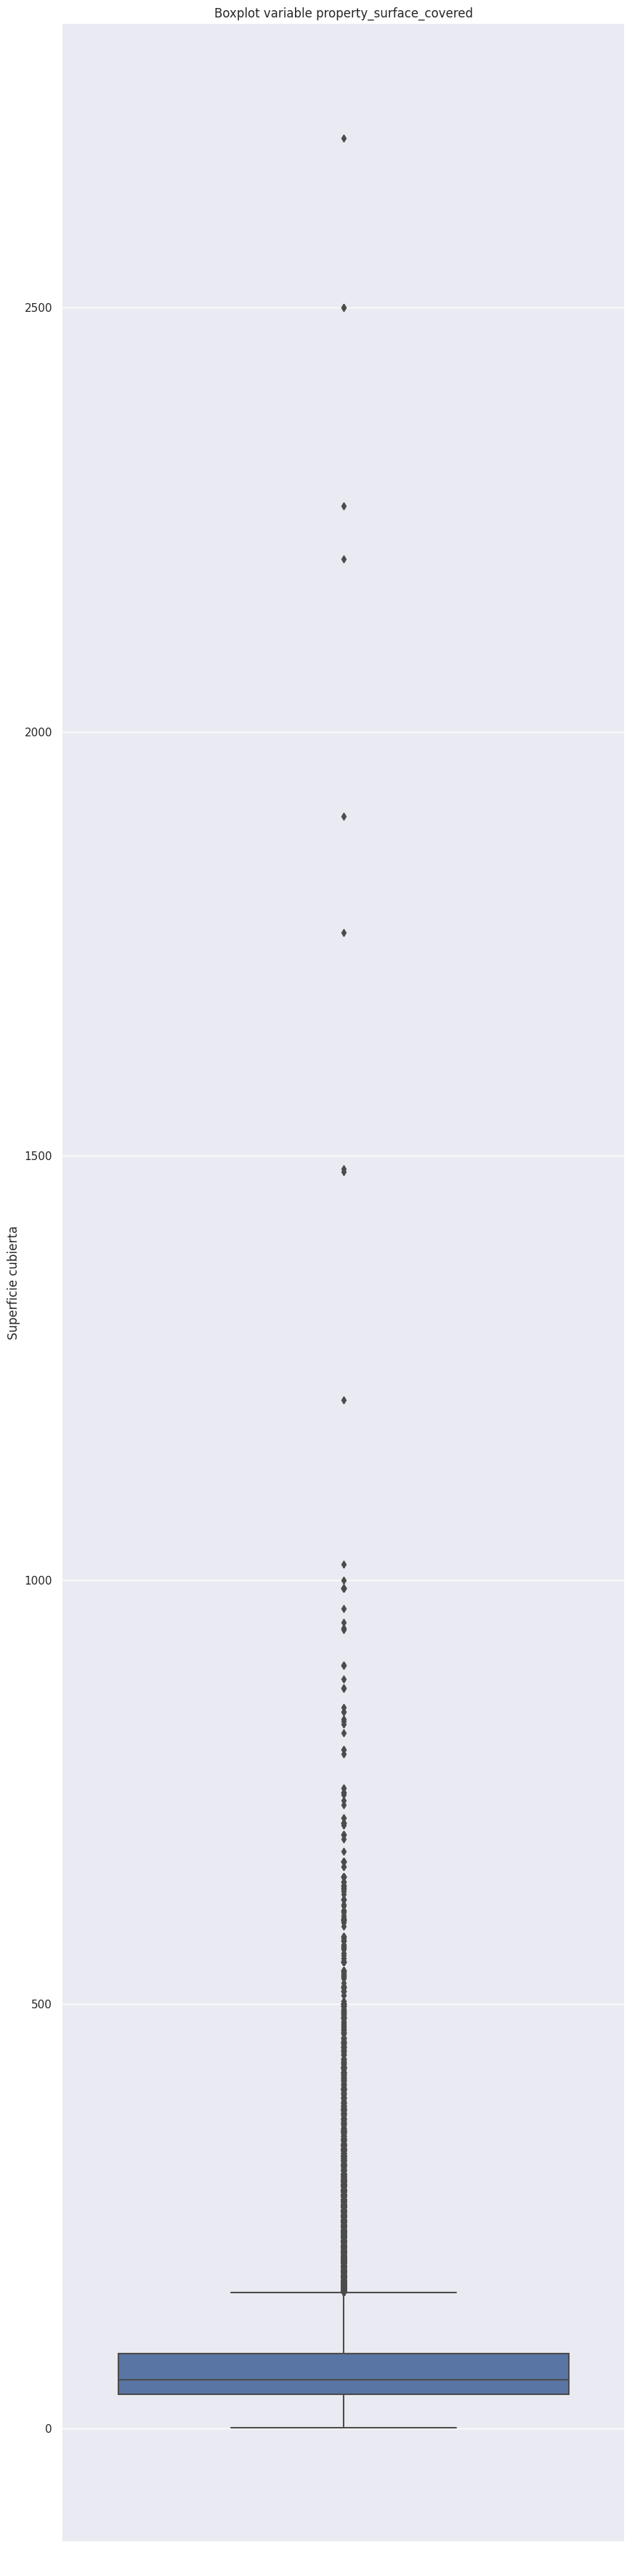

In [131]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [132]:
# Buscamos observaciones mayores a mil m2 cubiertos pero menos de 5 ambientes y que no sean casas
outlier_covsfc_rooms=df[df.apply(lambda x: x['property_surface_covered'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_covsfc_rooms

start_date    end_date  created_on    latitud   longitud  \
89120  2021-10-27  2022-01-04  2021-10-27 -34.630704 -58.400901   

              place_l2          place_l3 place_l4 place_l5 operation  \
89120  Capital Federal  Parque Patricios      NaN      NaN     Venta   

      property_type  property_rooms  property_bedrooms  \
89120  Departamento             1.0                NaN   

       property_surface_total  property_surface_covered  property_price  \
89120                    31.0                    2700.0         71500.0   

      property_currency                                     property_title  \
89120               USD  DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES,  B...   

       start_date_day  start_date_month  start_date_year  end_date_day  \
89120              27                10             2021             4   

       end_date_month  end_date_year  created_on_day  created_on_month  \
89120               1           2022              27                10   

       created_on_year  
89120             2021

In [133]:
# Vemos que hay un valor que no es posible
idx=outlier_covsfc_rooms.index
# Y procedemos a borrarlo
df.drop(idx, inplace=True)

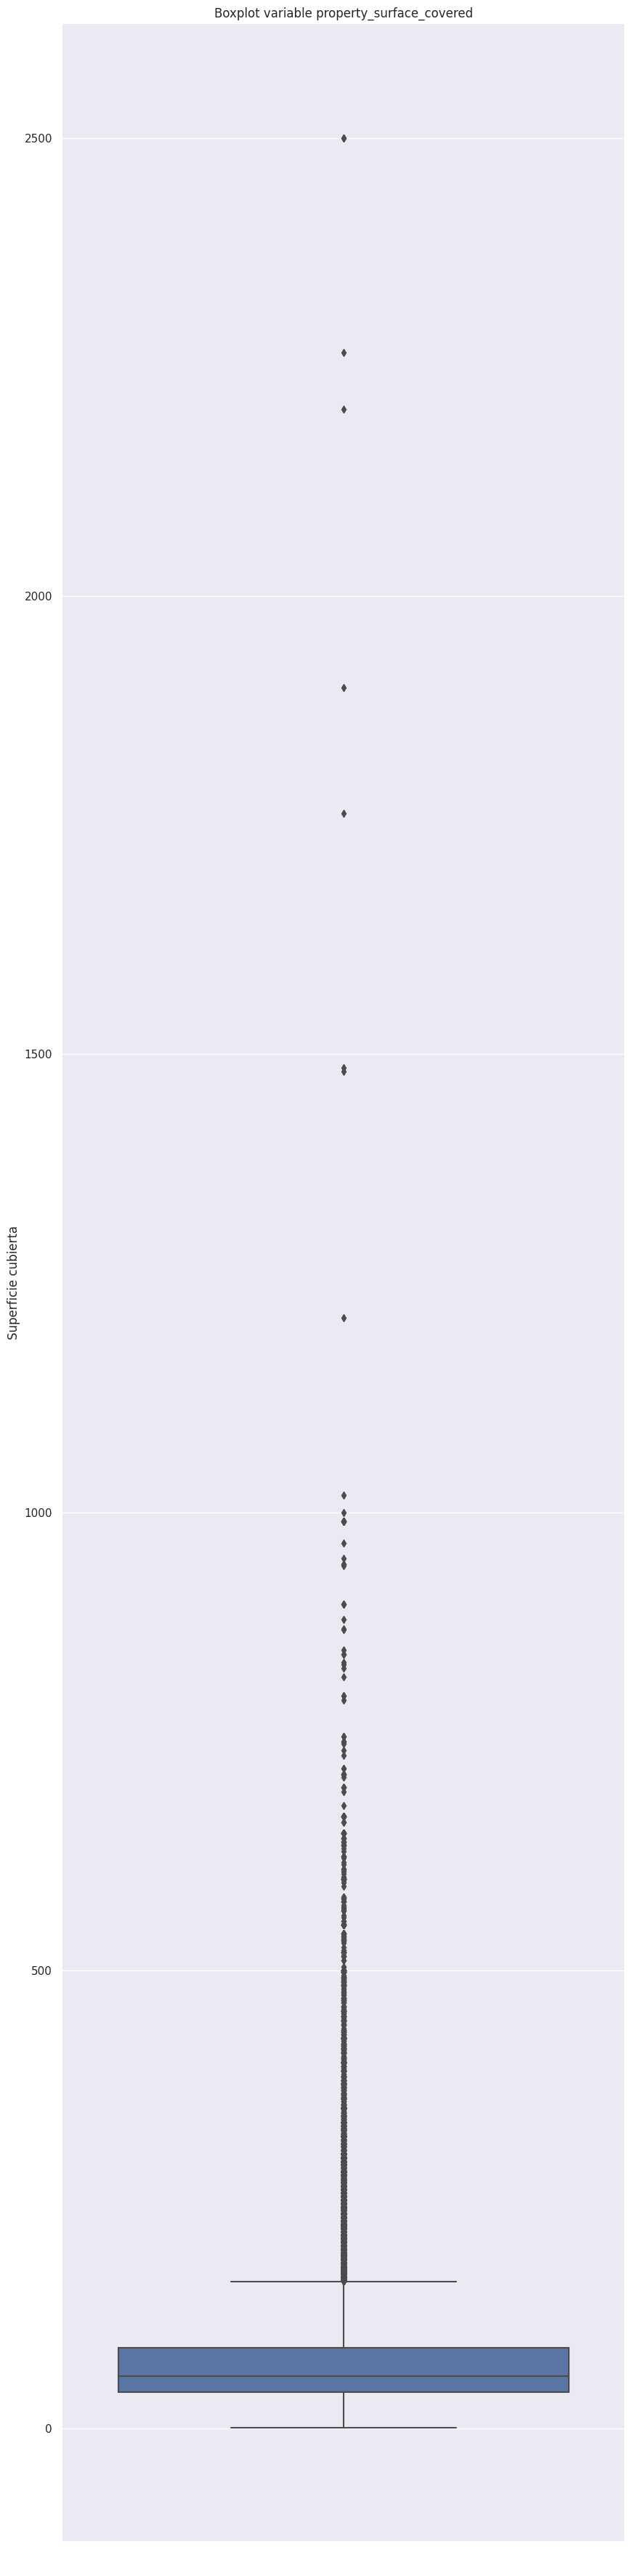

In [134]:
# Volvemos a graficar un boxplot una ultima despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

**b) Datos Faltantes:** analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
* Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.
* Determinar, de ser posible, estrategias para reparar los valores faltantes.
* En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

<h4 align="center"><b> Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset </b></h4>

#### Brayan:

In [135]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Percent"] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio_column["Count"] =(df.isnull().sum()).sort_values(ascending = False)

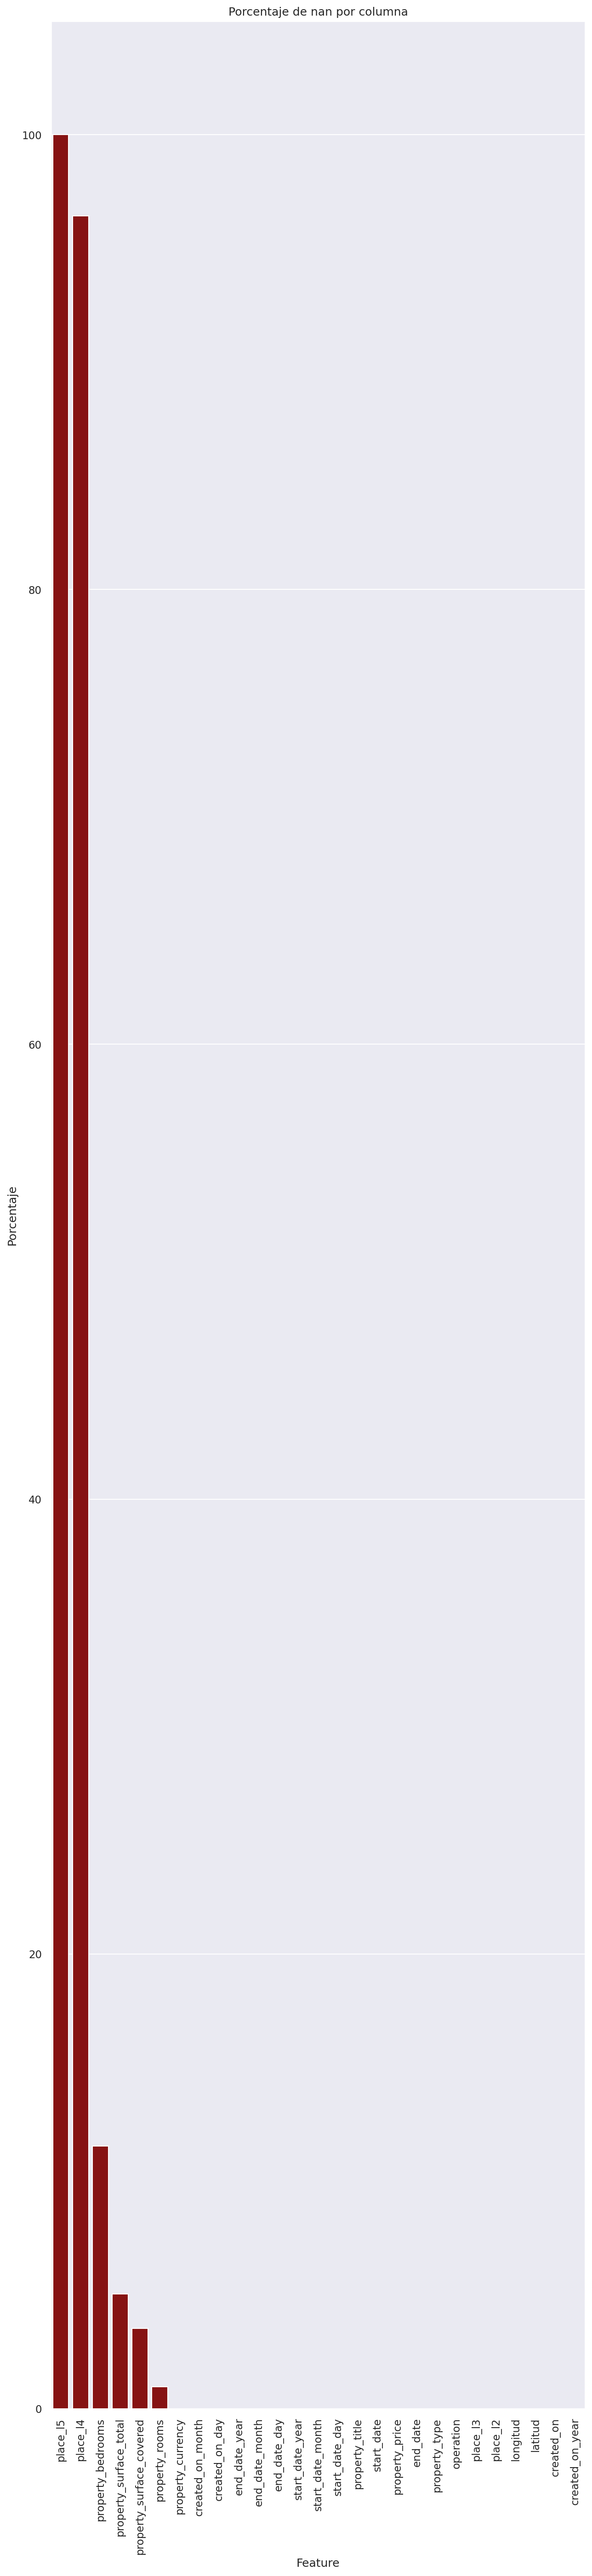

In [136]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

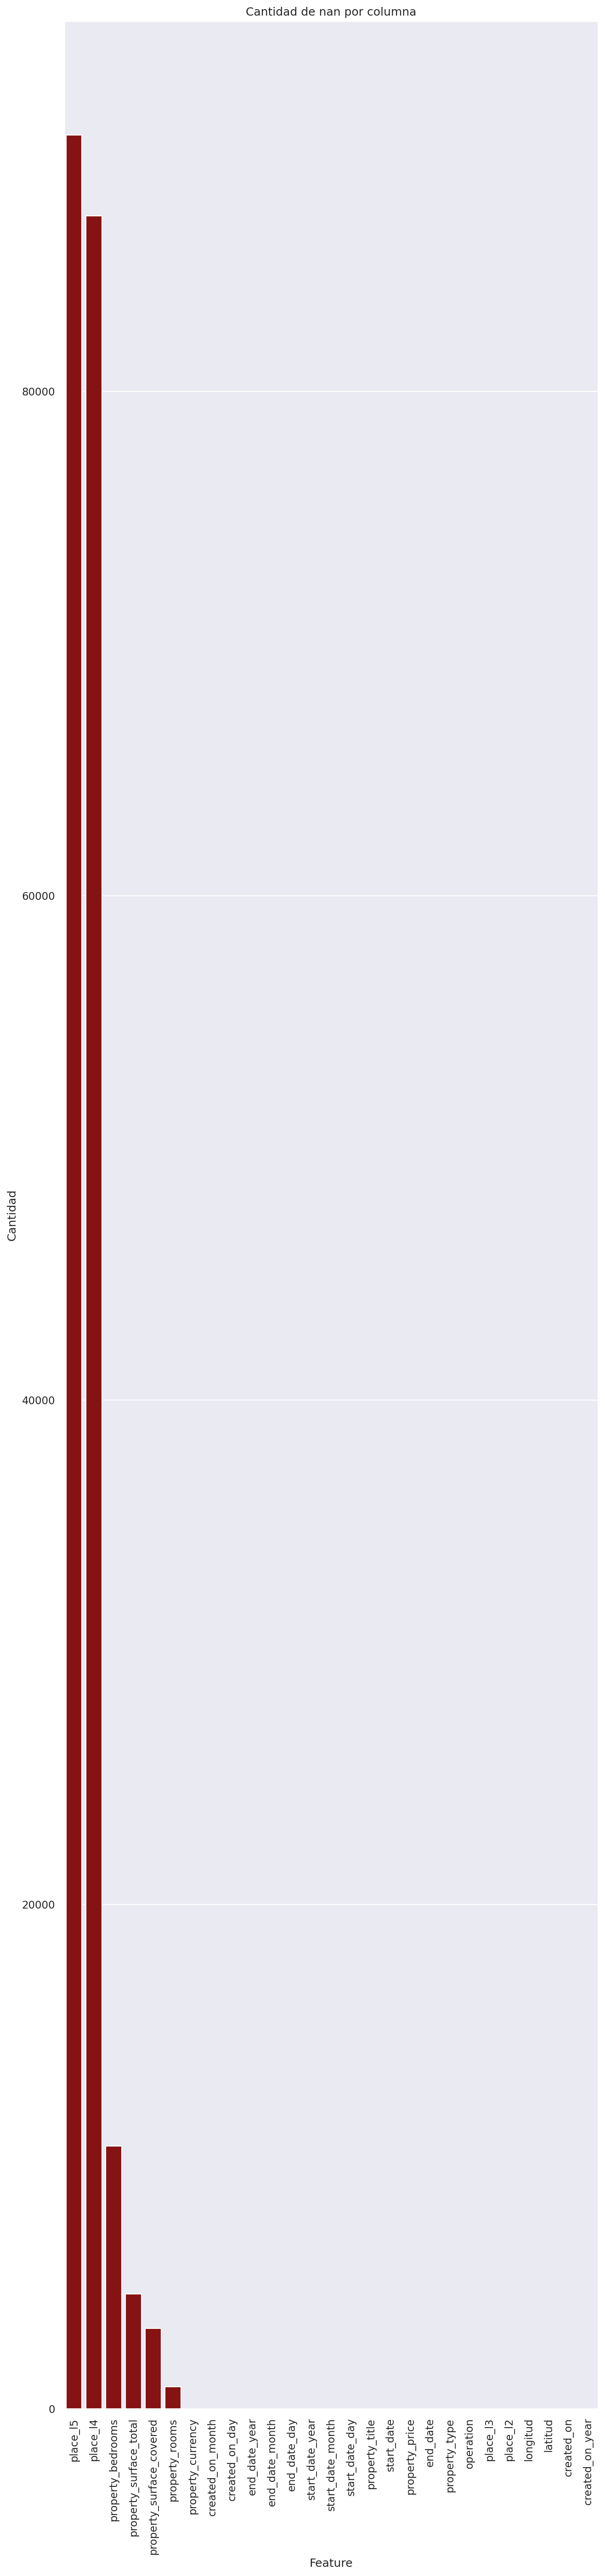

In [137]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

#### Santiago:

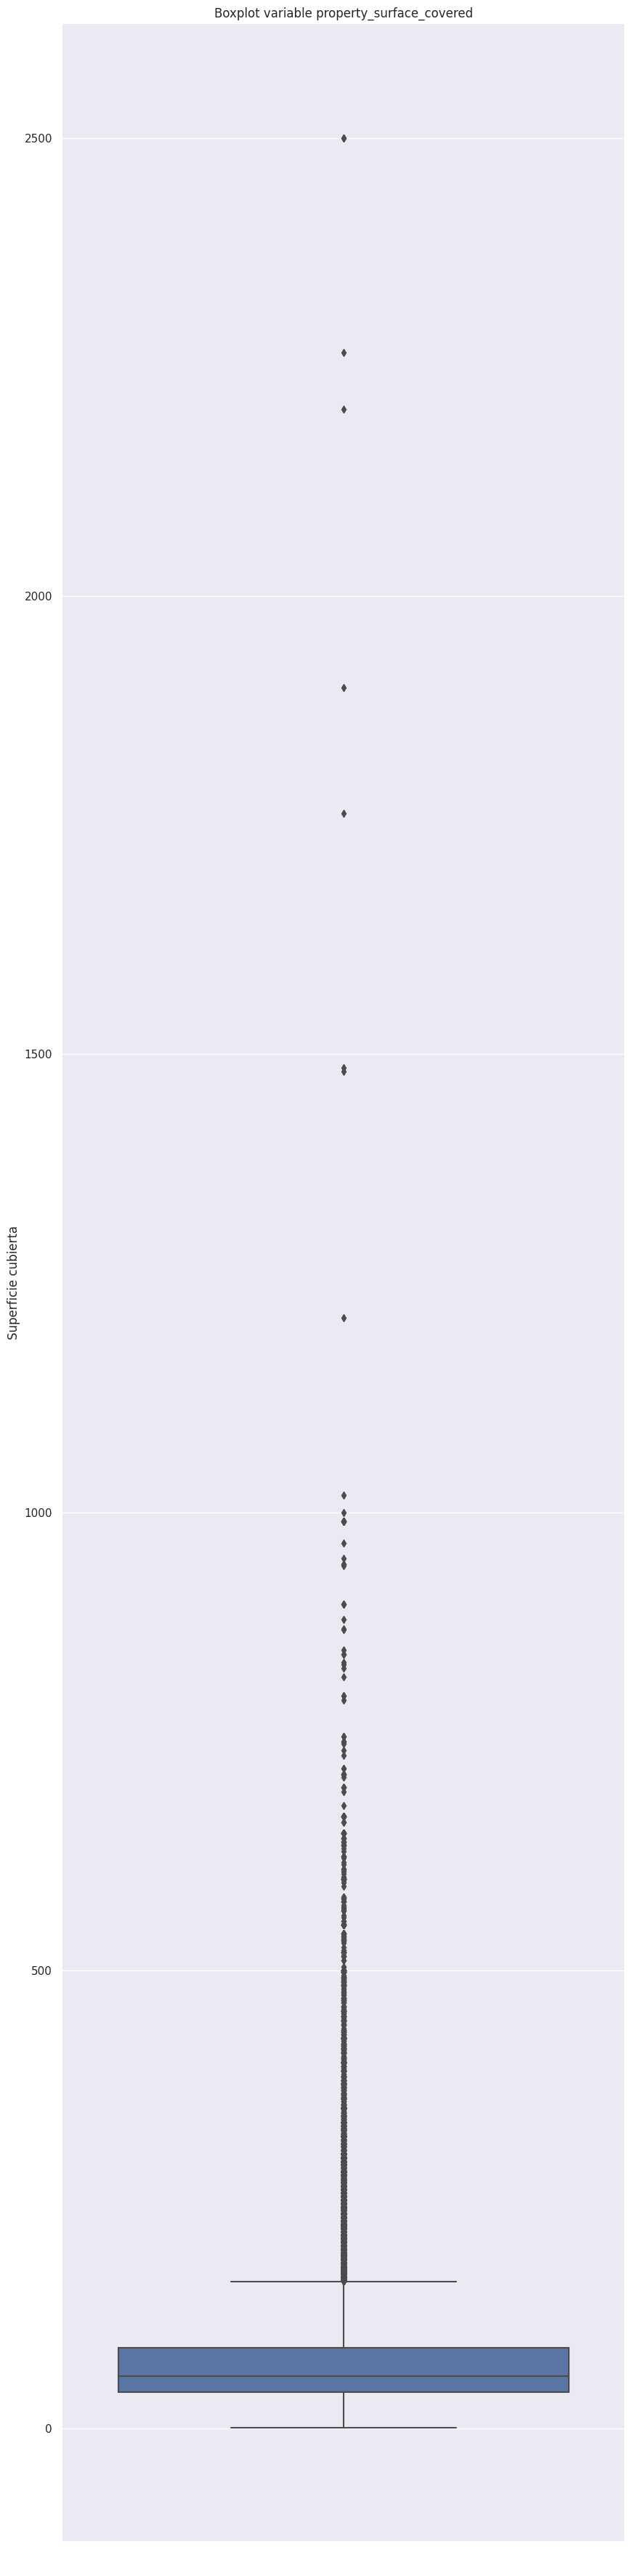

In [138]:
# Volvemos a graficar un boxplot una ultima despues de eliminar algunos outliers
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

#### Datos faltantes: property_rooms

In [139]:
# Vemos cuantas filas tienen datos faltantes de property_rooms
df.property_rooms.isnull().sum()

867

In [140]:
# Borramos las filas vacias
idx=df[df.property_rooms.isnull()].index
df.drop(idx, inplace=True)

In [141]:
# Vemos si hay valores negativos
(df.property_rooms <= 0).any()

False

#### Datos faltantes: property_bedrooms

In [142]:
# Vemos cuantas filas tienen datos faltantes de property_bedrooms
df.property_bedrooms.isnull().sum()

10043

In [143]:
# Vemos si hay valores negativos
(df.property_bedrooms <= 0).sum()

1

In [144]:
# Borramos el valor negativo
idx=df[df.property_bedrooms <= 0].index
df.drop(idx, inplace=True)

In [145]:
# Vemos cuantas propiedades tienen mas dormitorios que ambientes, lo cual no tiene sentido
df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1).sum()

132

In [146]:
# Borramos las propiedades con mas dormitorios que ambientes
idx=df[df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1)].index
df.drop(idx, inplace=True)

#### Datos faltantes: property_surface_total

In [147]:
# Vemos cuantas filas tienen datos faltantes de property_surface_total
df.property_surface_total.isnull().sum()

4379

In [148]:
# Vemos si hay valores negativos
(df.property_surface_total <= 0).any()

False

#### Datos faltantes: property_surface_covered

In [149]:
# Vemos cuantas filas tienen datos faltantes de property_surface_covered
df.property_surface_covered.isnull().sum()

3104

In [150]:
# Vemos si hay valores negativos
(df.property_surface_covered <= 0).any()

False

In [151]:
# Vemos cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

158

In [152]:
# Borramos las propiedades con mas superficie cubierta que total
idx=df[df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1)].index
df.drop(idx, inplace=True)

<h4 align="center"><b> Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset </b></h4>

#### Brayan:

In [153]:
na_ratio_row = pd.DataFrame()
n_column = df.shape[1]
na_ratio_row["Percent"] = df.isnull().sum(axis=1) / n_column
na_ratio_row["Count"] = df.isnull().sum(axis=1)

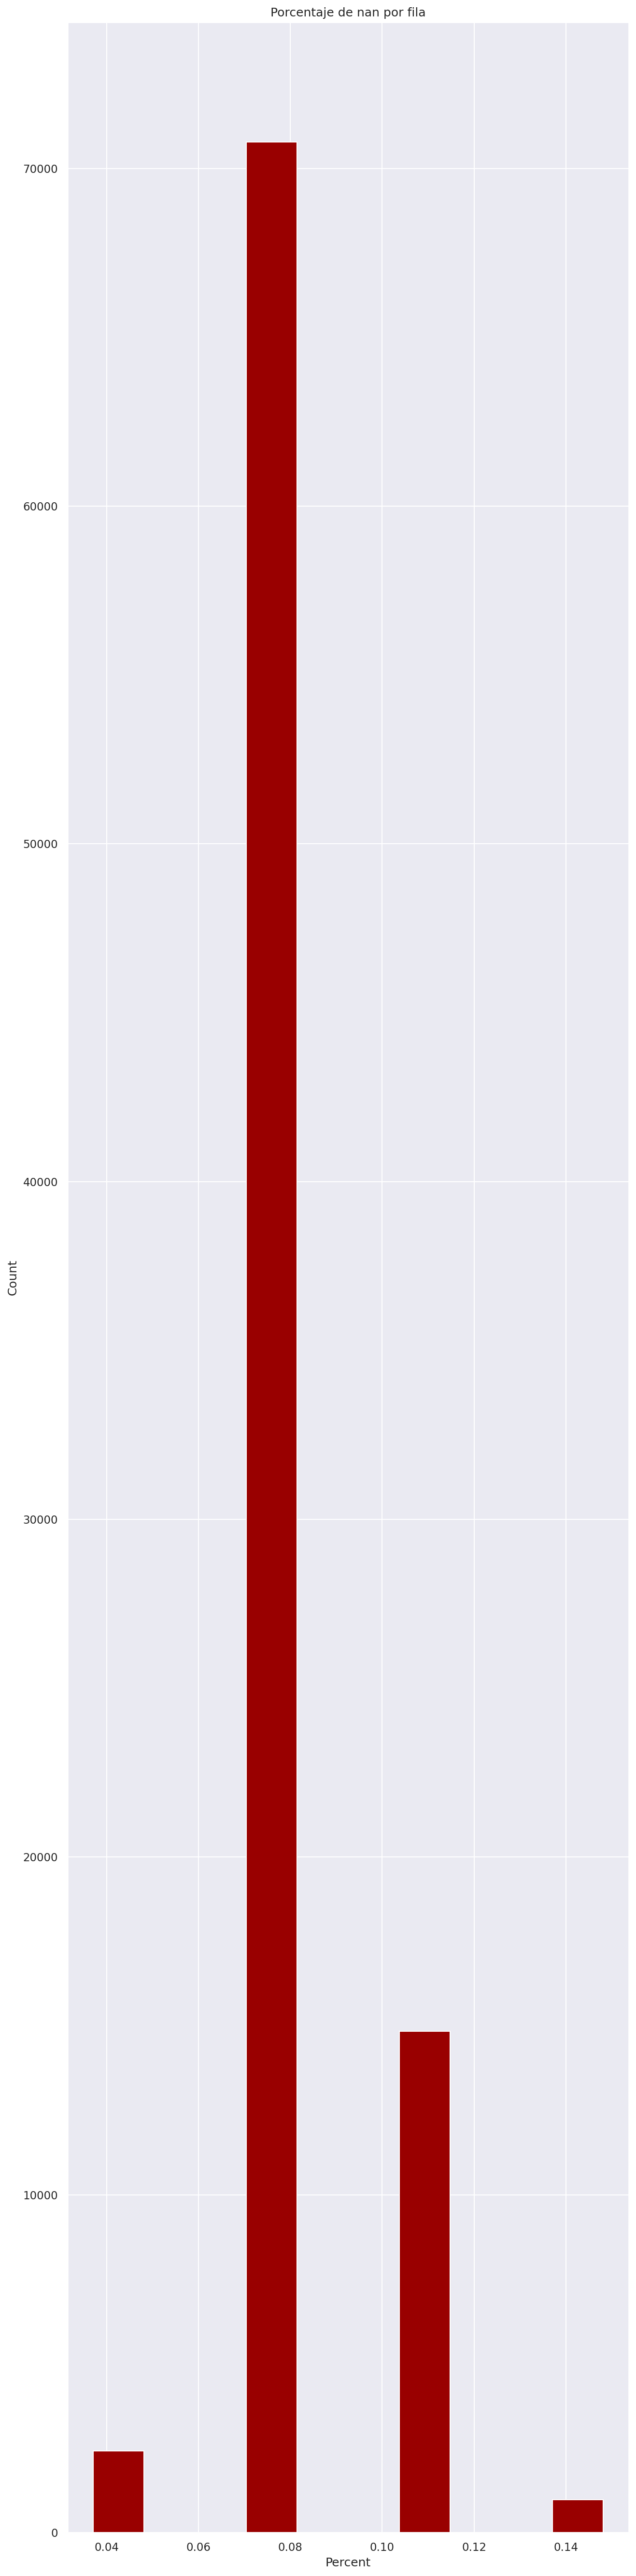

In [154]:
plt.figure(dpi=150)
sns.histplot(data=na_ratio_row, x="Percent", bins=10, color=(0.6, 0, 0), alpha = 1)
plt.title("Porcentaje de nan por fila")
plt.show()

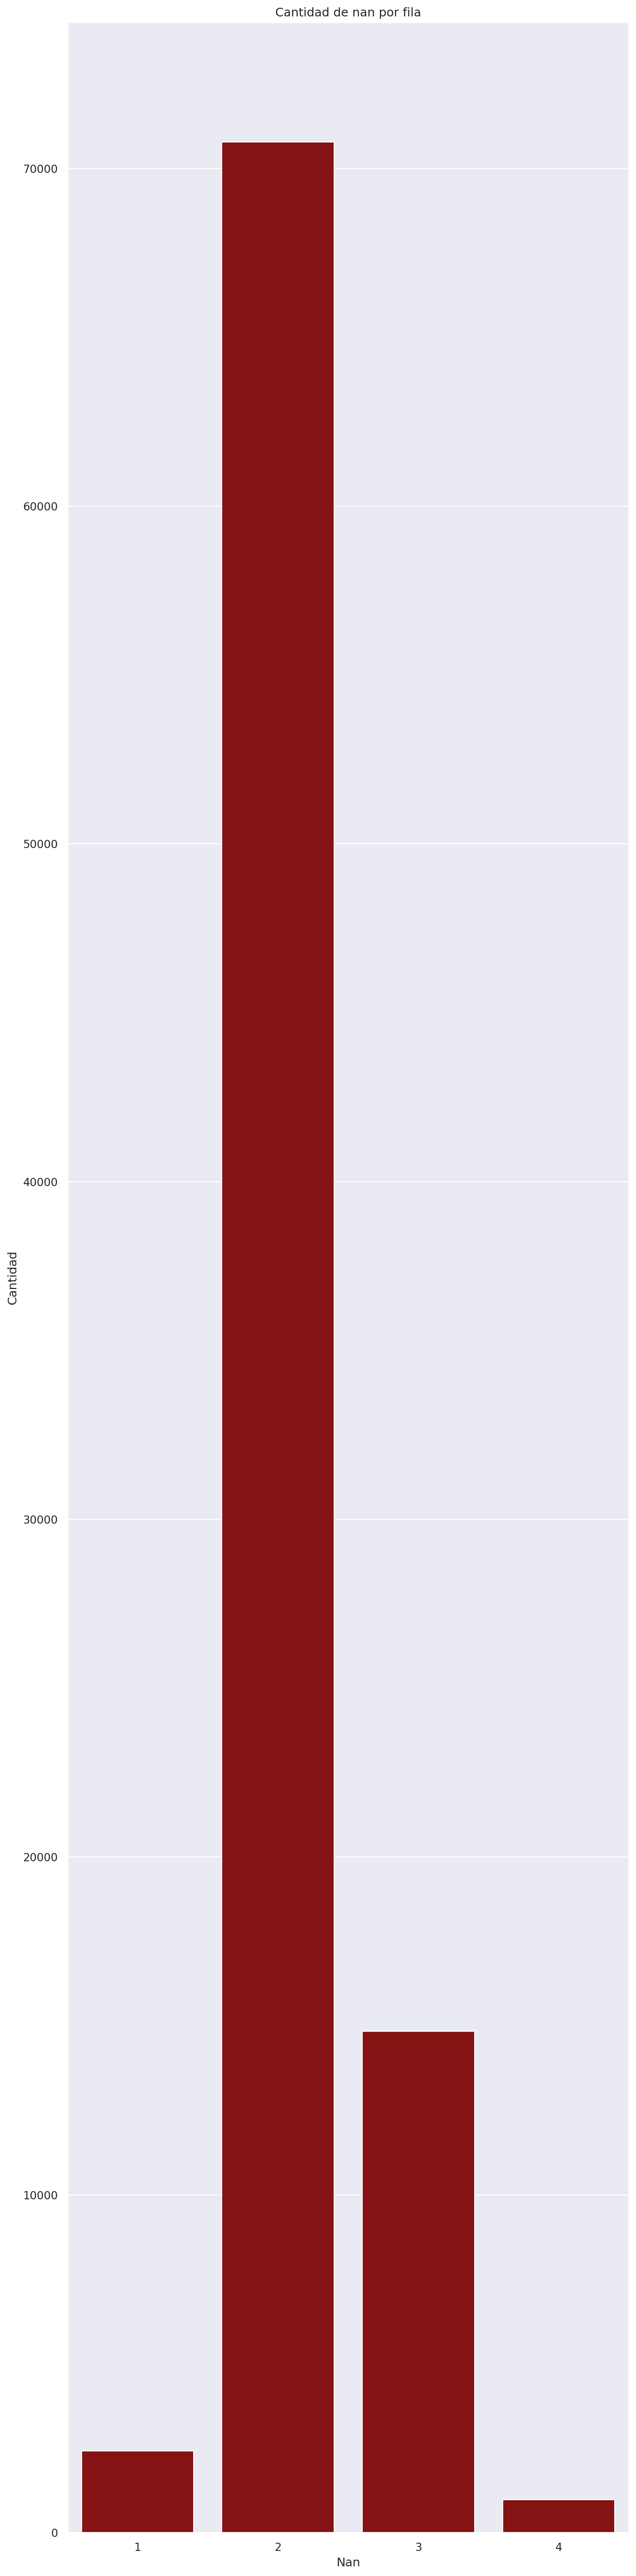

In [155]:
plt.figure(dpi=150)
sns.countplot(
    x="Count", data=na_ratio_row, color=(0.6, 0, 0), alpha = 1
)
plt.ylabel("Cantidad")
plt.xlabel("Nan")
plt.title("Cantidad de nan por fila")
plt.show()

<h4 align="center"><b> Determinar, de ser posible, estrategias para reparar los valores faltantes </b></h4>

#### Brayan:

Completo las latitudes y longitudes con respecto a la media de su barrio.

In [156]:
medias_latitud = {}
medias_longitud = {}
valores_place = df.groupby(by=['place_l3']).mean().index
grupos = df.groupby(by=['place_l3']).mean()

In [157]:
for place in valores_place:
    medias_latitud[place] = grupos.latitud[place]
    medias_longitud[place] = grupos.longitud[place]

In [158]:
for place in valores_place:
    mask = ((df['longitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'longitud'] = medias_longitud[place]

In [159]:
for place in valores_place:
    mask = ((df['latitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'latitud'] = medias_latitud[place]

#### Santiago:

#### Completamos los datos faltantes de dormitorios utilizando la moda segun la cantidad de ambientes

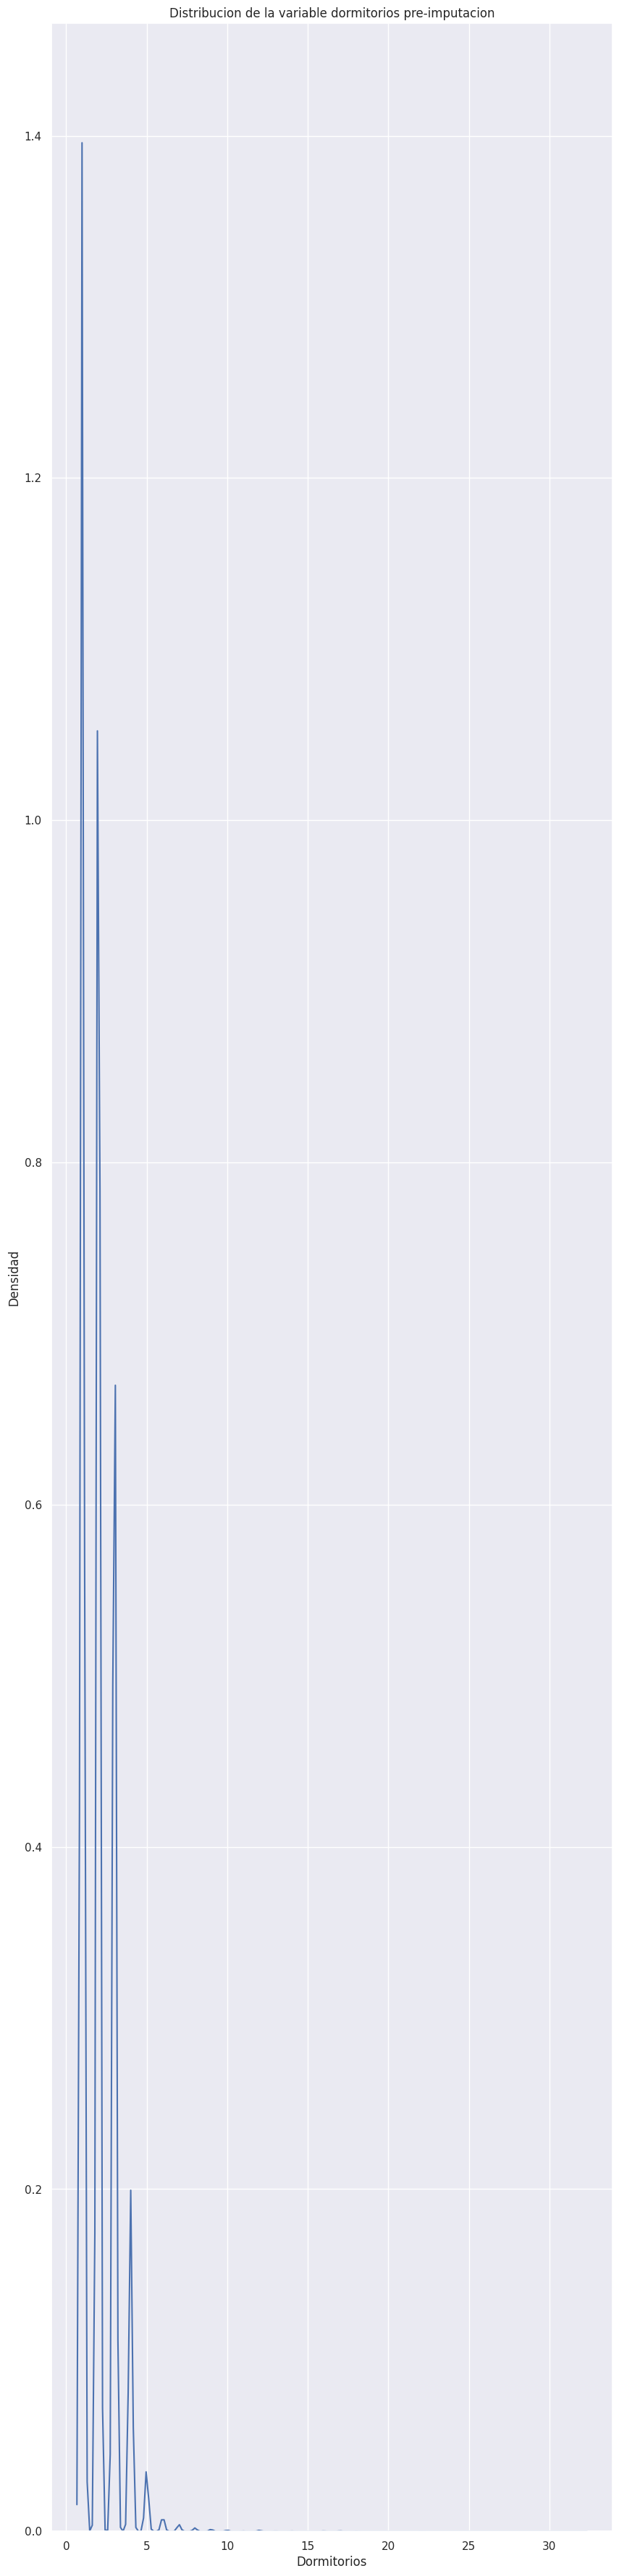

In [160]:
# Distribucion de la variable property_bedrooms antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pre-imputacion",xlabel="Dormitorios",ylabel="Densidad")

In [161]:
# Vamos a calcular la moda para el feature dormitorios dependiendo de cuantos ambientes tenga la propiedad
df_na=df[df.property_bedrooms.isna()]
unique_rooms=df_na.property_rooms.unique().tolist()

for n in unique_rooms:
    # Calculamos la moda para cada valor unico de ambientes
    aux=df[df.property_rooms == n]
    moda=aux.property_bedrooms.mode()[0]
    # Le asignamos el valor que corresponda a cada celda de dormitorio que este vacia
    mask = ((df['property_bedrooms'].isnull())) & (df['property_rooms'] == n)
    df.loc[mask, 'property_bedrooms'] = moda

In [162]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_bedrooms.isnull().sum()

0

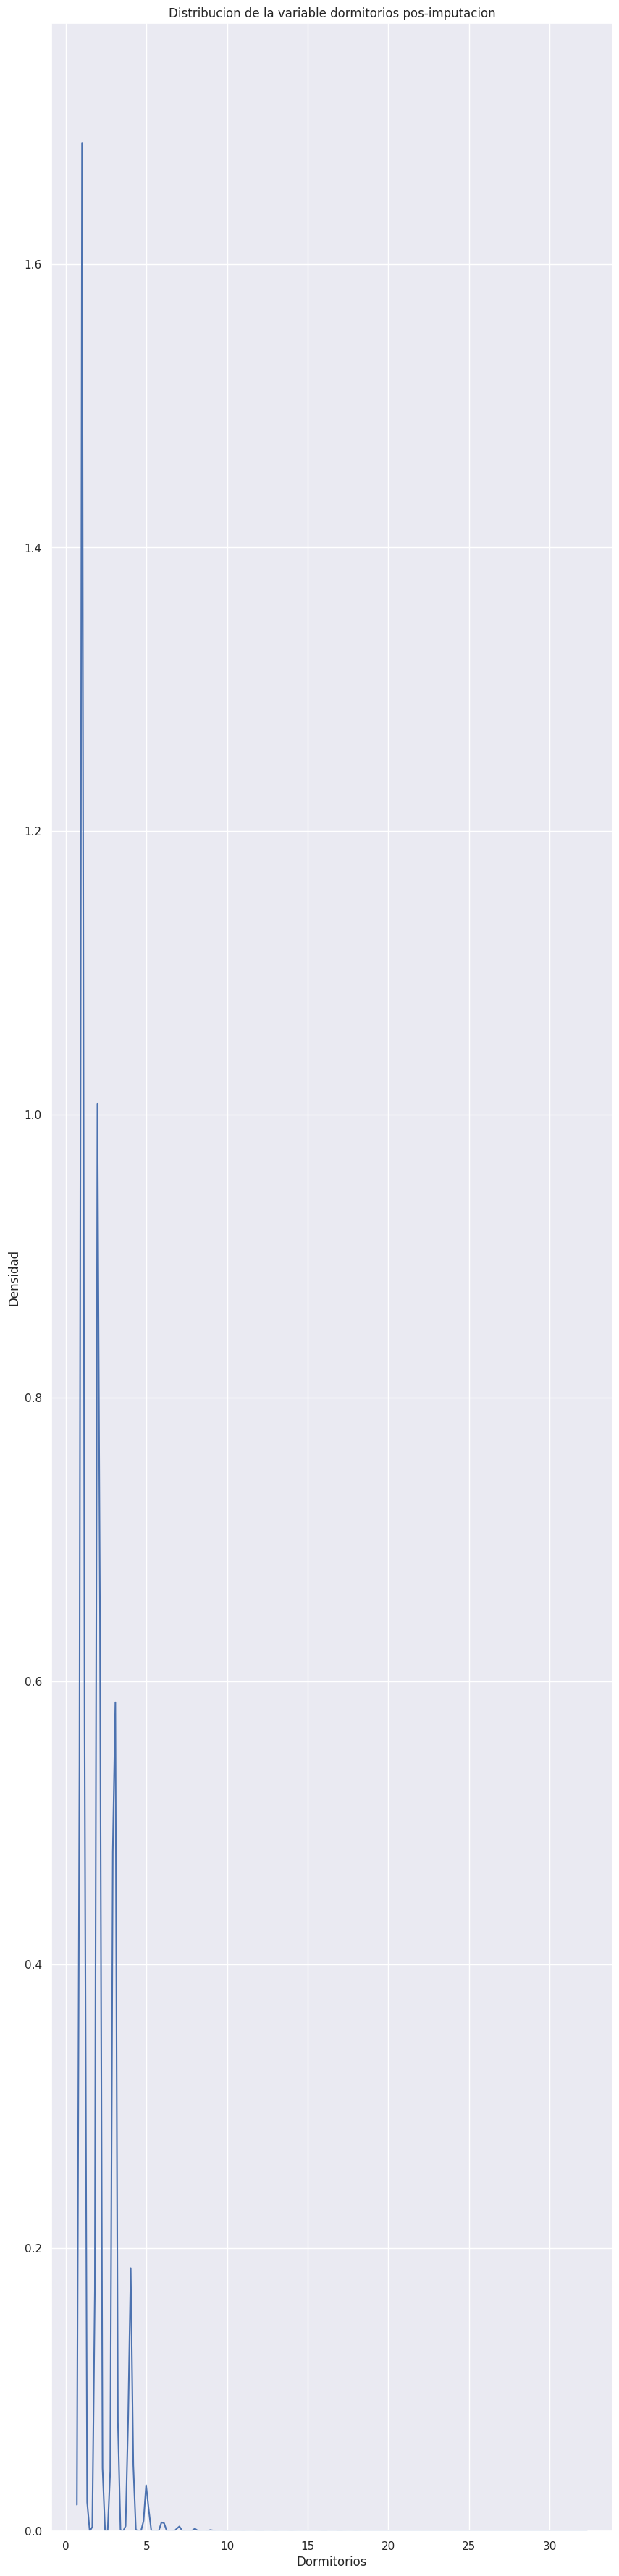

In [163]:
# Distribucion de la variable property_bedrooms despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pos-imputacion",xlabel="Dormitorios",ylabel="Densidad")

#### Completamos los datos faltantes de superficie total y cubierta utilizando regresion lineal

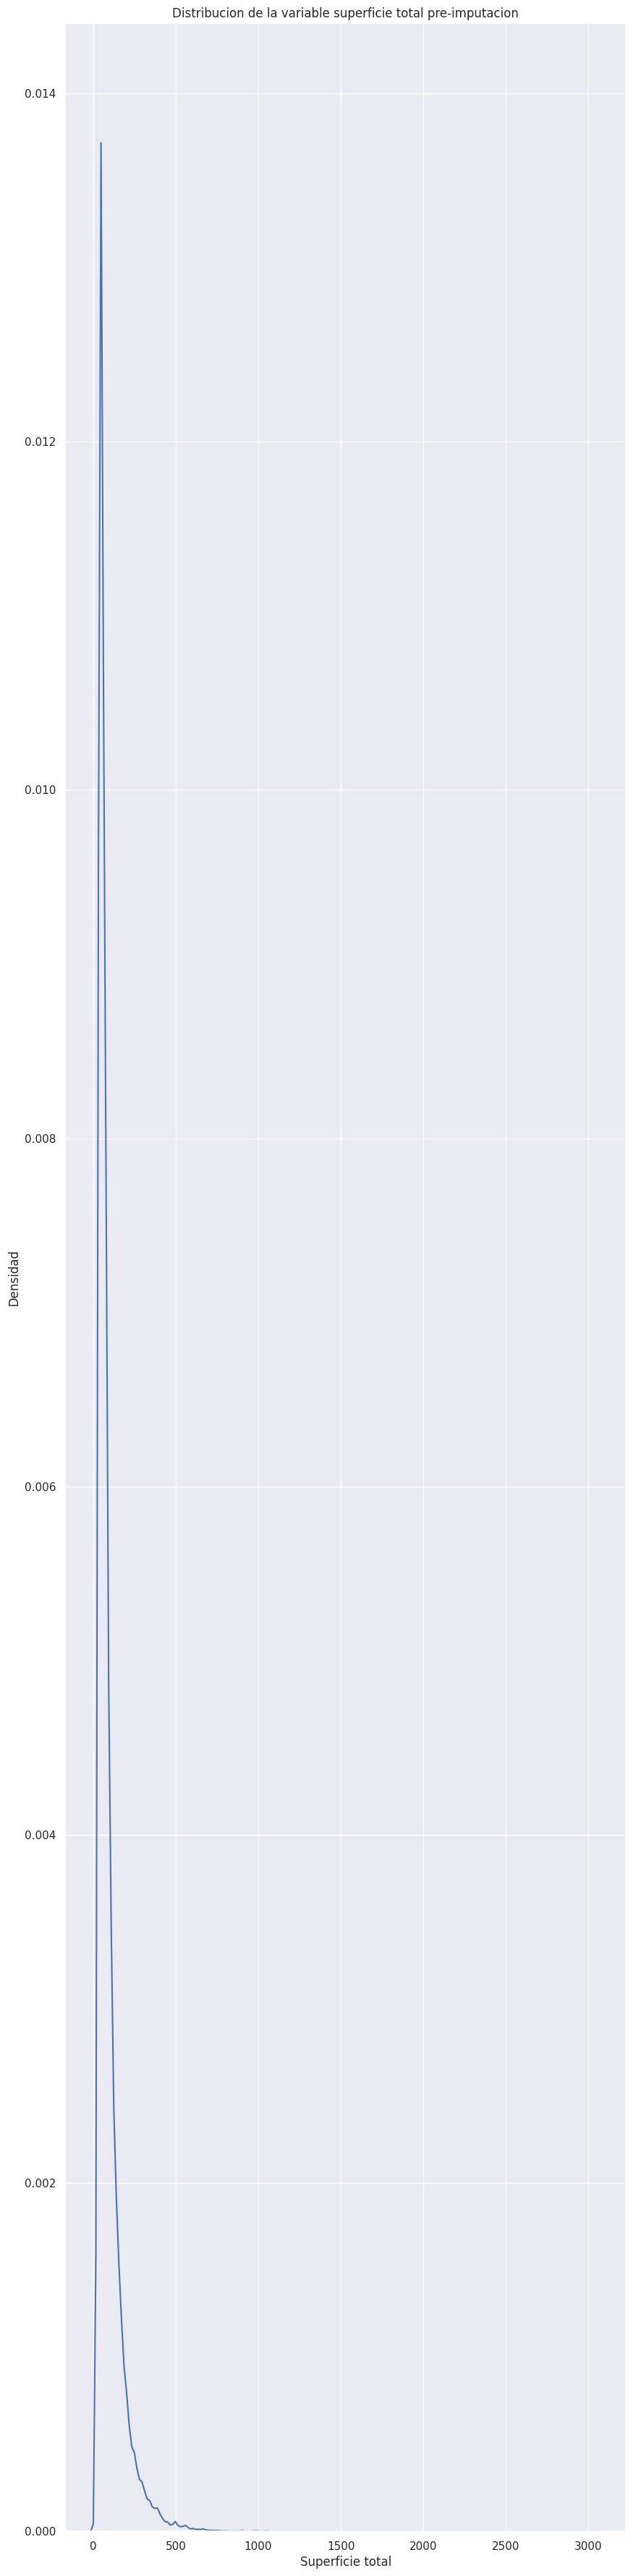

In [164]:
# Distribucion de la variable property_surface_total antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_total']).set(title="Distribucion de la variable superficie total pre-imputacion",xlabel="Superficie total",ylabel="Densidad")

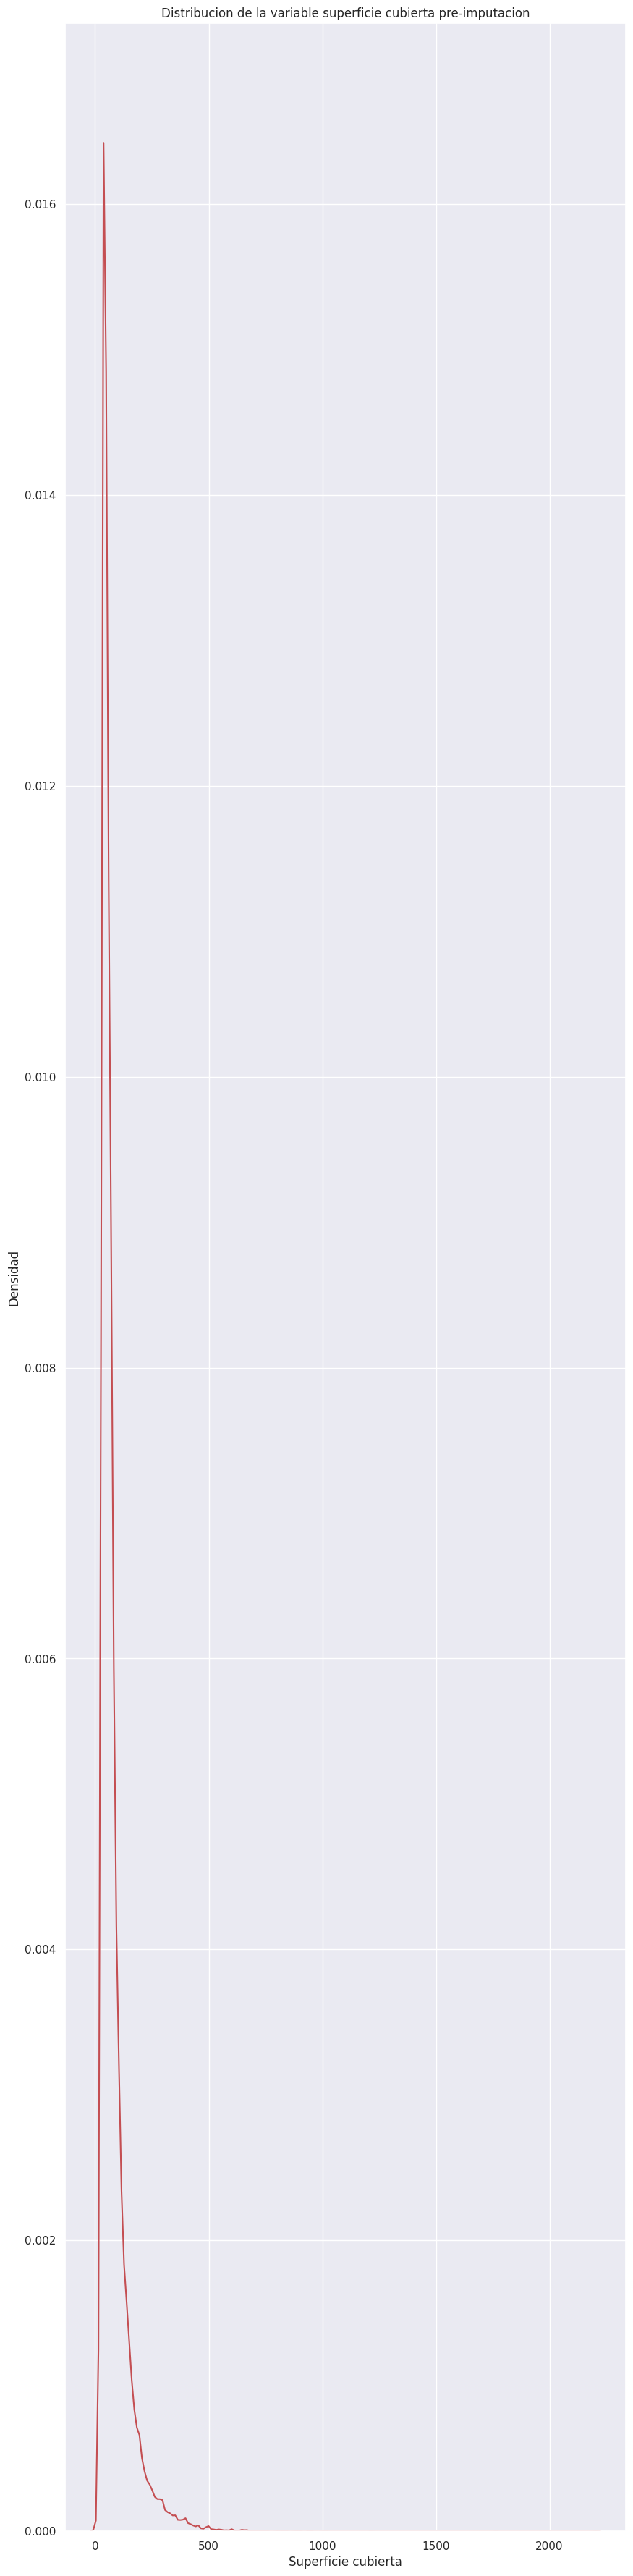

In [165]:
# Distribucion de la variable property_surface_covered antes de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_covered'] ,color='r').set(title="Distribucion de la variable superficie cubierta pre-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")

In [166]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# Tomamos las columnas de superficie total y cubierta
columns=['property_surface_total','property_surface_covered']
df_aux=df[columns].copy()

# Imputamos los datos nuevos utilizando regresion lineal entre ambas features
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_aux=imp.fit_transform(df_aux[columns])

# Ponemos los datos nuevamente en nuestro dataframe
df[columns]=df_aux

In [167]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_total.isnull().sum()

0

In [168]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_covered.isnull().sum()

0

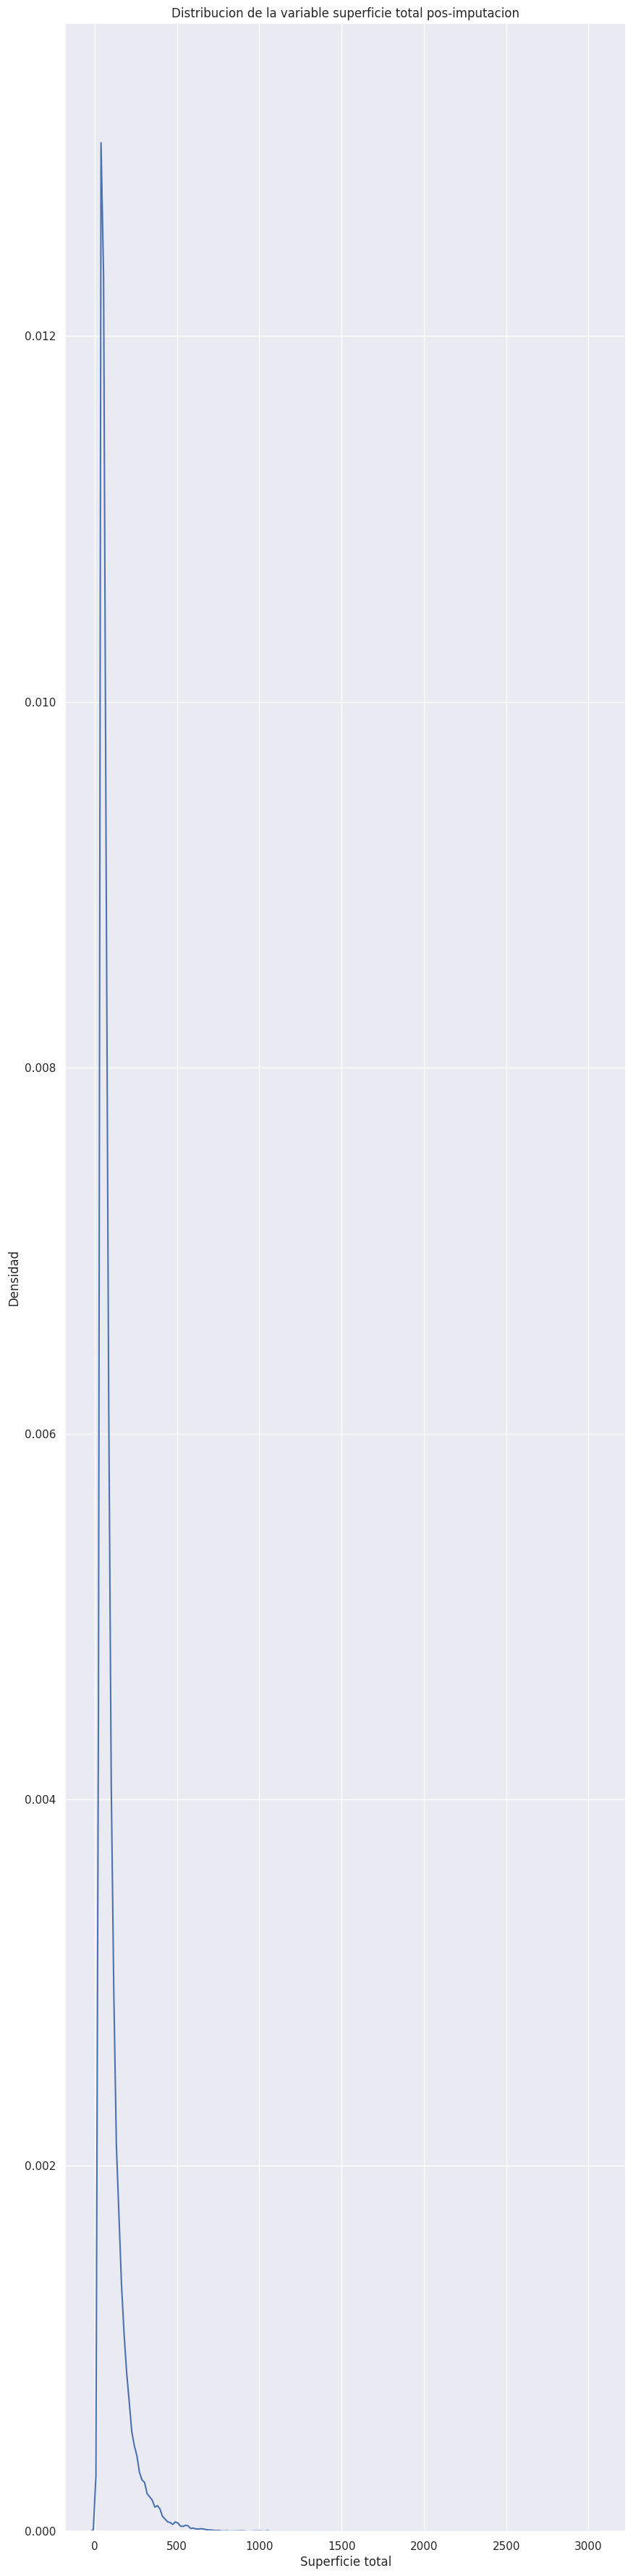

In [169]:
# Distribucion de la variable property_surface_total despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_total']).set(title="Distribucion de la variable superficie total pos-imputacion",xlabel="Superficie total",ylabel="Densidad")

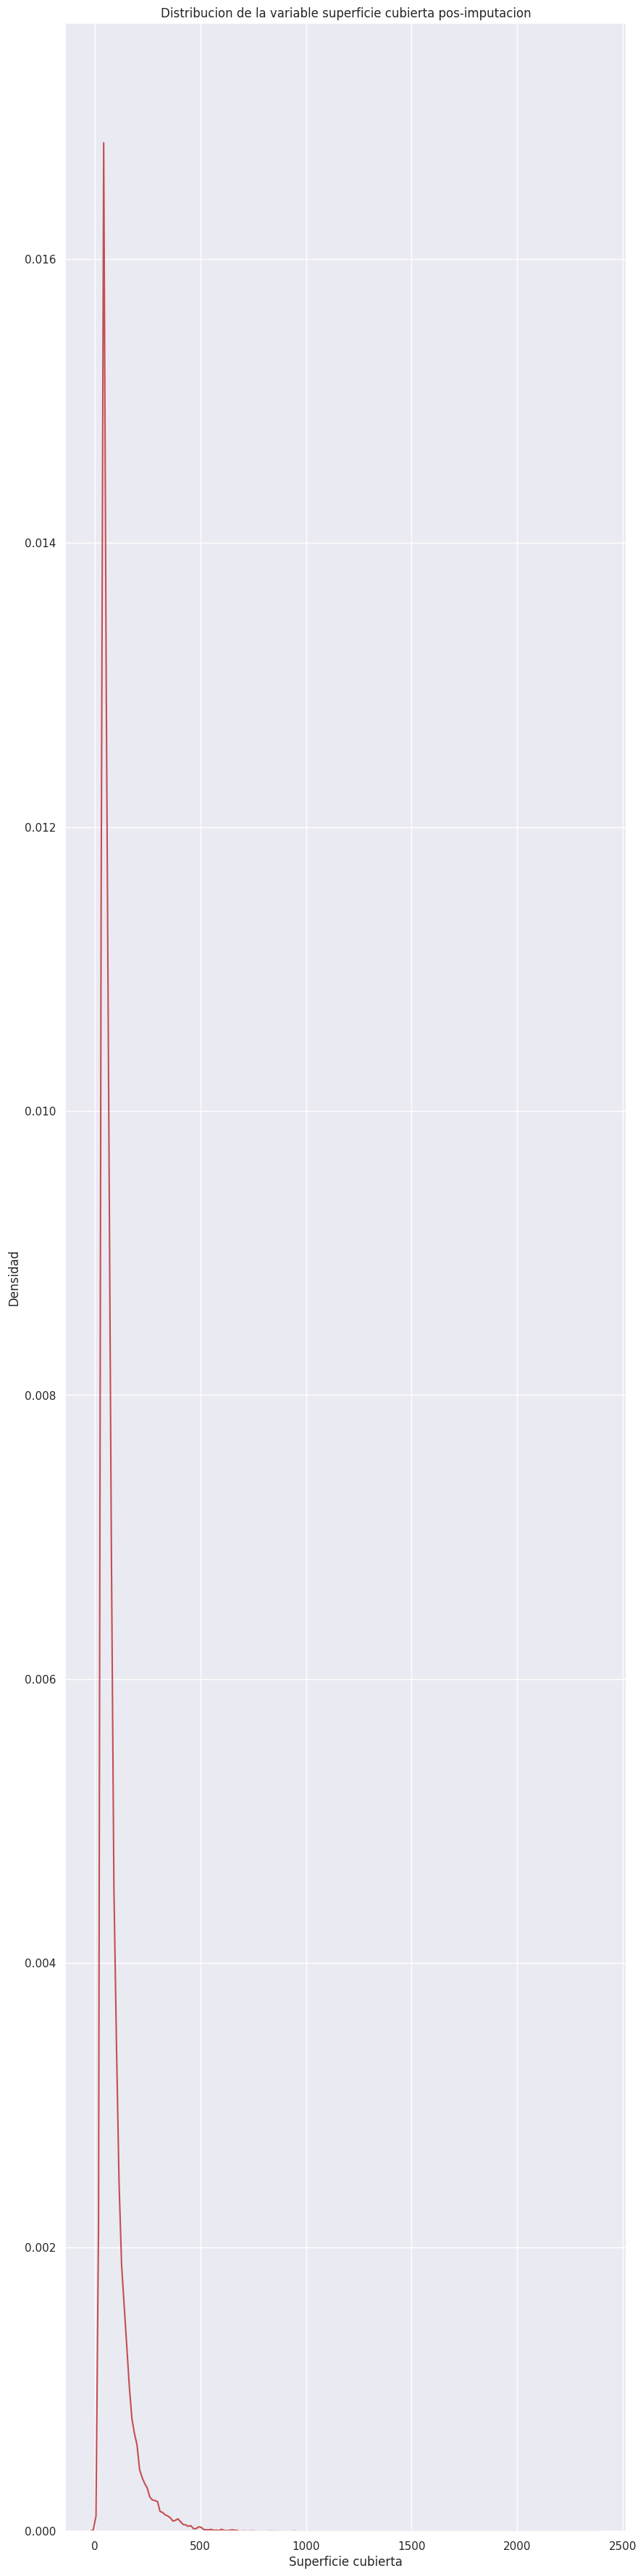

In [170]:
# Distribucion de la variable property_surface_covered despues de imputar o reparar datos
sns_hist=sns.kdeplot(data=df['property_surface_covered'] ,color='r').set(title="Distribucion de la variable superficie cubierta pos-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")

In [171]:
# Volvemos a chequear cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

174

En principio, esto no estaria bien. Hay que rever

<h4 align="center"><b> En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes </b></h4>

In [172]:
# Codigo

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

In [173]:
# Codigo

In [174]:
# Codigo

In [175]:
# Codigo

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [176]:
# Codigo

In [177]:
# Codigo

In [178]:
# Codigo

In [179]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [180]:
# Codigo

In [181]:
# Codigo

In [182]:
# Codigo

In [183]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [184]:
# Codigo

In [185]:
# Codigo

In [186]:
# Codigo

In [187]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [188]:
# Codigo

In [189]:
# Codigo

In [190]:
# Codigo

In [191]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [192]:
# Codigo

In [193]:
# Codigo

In [194]:
# Codigo

In [195]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R:

### **4. Regresión**

En esta etapa se busca predecir el precio de la propiedad utilizando dos modelos diferentes.
Para todos los modelos se pide:

* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (encoding, normalización, etc)
* Todos los modelos deben ser entrenados también con el dataset generado en el
punto **1 d)**

**Modelo 1: KNN**

a. Construir un modelo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) para regresión y optimizar sus hiperparámetros
mediante *k-fold Cross Validation* para obtener la mejor performance .¿Cuántos
*folds* utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [196]:
# Codigo

In [197]:
# Codigo

In [198]:
# Codigo

**Modelo 2: XGBoost**

a. Construir un modelo **XGBoost** y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [199]:
# Codigo

In [200]:
# Codigo

In [201]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante *cross-validation*) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación explicando todas las métricas.

In [202]:
# Codigo

In [203]:
# Codigo

In [204]:
# Codigo

¿Qué modelo elegirían para predecir el precio de venta de las propiedades?

R:

### **5. Conclusiones**

Realizar las conclusiones correspondientes al trabajo realizado en su totalidad, destacando
principalmente los aspectos que consideren más relevantes. Comentar brevemente qué otras
opciones hubiesen explorado y quedaron fuera del alcance de este trabajo

R: